![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## **ENTREGABLE 1:** Data Preparation - BMW Pricing
## **INTEGRANTES DEL GRUPO:** Lluís Miarnau, Ariadna Rubió, Sergio Vásquez y David Larré

____

## **INTRODUCCIÓN**

En este proyecto se trabajará con un dataset de vehículos BMW, el objetivo final es preparar el dataset para predecir el precio de los coches en función de diversas variables disponibles.

Se realizará una exploración, limpieza y transformación completa de los datos para prepararlos adecuadamente para el modelo predictivo.

## **COLUMNAS**

 Columna                          | Descripción |
|----------------------------------|-------------|
| **marca**                        | Marca del vehículo (en este caso, `BMW` o vacíos). |
| **modelo**                       | Modelo específico del coche (por ejemplo, `118`, `M4`, `320`...). |
| **km**                           | Kilómetros recorridos por el vehículo (indicador del uso). |
| **potencia**                     | Potencia del motor en caballos (CV). |
| **fecha_registro**               | Fecha en que se matriculó por primera vez el coche. |
| **tipo_gasolina**                | Tipo de combustible que utiliza el vehículo (`diesel`, `petrol`, etc.). |
| **color**                        | Color del coche (`black`, `white`, etc.). |
| **tipo_coche**                   | Tipo de carrocería (`convertible`, `coupe`, etc.). |
| **volante_regulable**            | Indica si el coche tiene volante ajustable (`True` / `False`). |
| **aire_acondicionado**           | Indica si el coche tiene aire acondicionado (`True` / `False`). |
| **camara_trasera**               | Indica si el coche tiene cámara de marcha atrás (`True` / `False`). |
| **asientos_traseros_plegables**  | Indica si los asientos traseros pueden plegarse (`True` / `False`). |
| **elevalunas_electrico**         | Indica si los elevalunas son eléctricos (`True` / `False`). |
| **bluetooth**                    | Indica si el vehículo dispone de conexión Bluetooth (`True` / `False`). |
| **gps**                          | Indica si el vehículo incluye sistema de navegación GPS (`True` / `False`). |
| **alerta_lim_velocidad**         | Indica si tiene alerta de límite de velocidad (`True` / `False`). |
| **precio**                       | Precio de venta en euros (€). Es la variable objetivo (**target**). |
| **fecha_venta**                  | Fecha en la que se vendió el coche. |

## **00 - IMPORTACIÓN DE LIBRERÍAS**

Hacemos la importación de las librerías pandas, numpy, matplotlib.pyplot, plotly,graph_objects, seaborn, sklearn y warnings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

print('Librerías importadas correctamente')

Librerías importadas correctamente


## **01 - IMPORTACIÓN DE DATOS**


 Importamos los datos, realizamos una copia para guardar una versión original de los datos y mostramos el número de filas y columnas.

In [2]:
bmw = pd.read_csv('/Users/davidlarre/Desktop/PROYECTOS/M10 - ENTREGABLES/ENTREGABLE 1/data/bmw_pricing.csv')
df_bmw = bmw.copy()

print(f'Hay {df_bmw.shape[0]} filas y {df_bmw.shape[1]} columnas') 

Hay 4843 filas y 18 columnas


## **02 - EDA**

*Con las siguientes funciones hemos analizado el dataset y hemos podido observar:*

1. Se trata de un *conjunto de datos de ventas* correspondiente al año **2018**, abarcando desde **enero hasta septiembre** (ambos incluidos), de vehículos de la marca **BMW**.

2. El dataset cuenta con **18 columnas**, de las cuales:  
   - **1** es de tipo *booleano*  
   - **3** son datos *numéricos*  
   - **14** son datos *categóricos*<br><br>

3. Contiene un total de **4843 registros**, sin que haya **ningún duplicado**.

4. De las 18 columnas, **17 presentan valores nulos**, aunque en **9 de ellas** estos valores faltantes no superan el **1%** del total de registros.  
   Por ello, **optamos por aplicar un doble enfoque para tratar los valores nulos**:
   - En las columnas con menos del **1%** de valores nulos, eliminaremos directamente las filas incompletas.
   - En las columnas con un porcentaje de nulos **igual o superior al 1%**, implementaremos técnicas de **imputación** para conservar la máxima información y enriquecer el análisis.

In [3]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [4]:
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [5]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [6]:
# Listamos el nombre de todas las columnas
print("Columnas :", df_bmw.columns.tolist())

Columnas : ['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta']


In [7]:
# Hacemos print para detectar duplicados
print("Duplicados:", df_bmw.duplicated().sum(), "valores duplicados")

Duplicados: 0 valores duplicados


In [8]:
# Creamos una función para crear un DataFrame con la cantidad de nulos, el porcentaje de nulos y los valores únicos de cada columna. Ordenaremos el df por el porcentaje de nulos.

def tabla_nulos(dataset):
    nulos = dataset.isnull().sum()
    porcentaje = dataset.isnull().mean() * 100
    unicos = dataset.nunique()
    
    df_nulos = pd.DataFrame({
        'NULOS': nulos,
        '% NULOS': porcentaje,
        'VALORES UNICOS': unicos
        }).sort_values(by='% NULOS', ascending=False)
    return df_nulos
    
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3391,70.018584,2
fecha_registro,2423,50.030973,180
tipo_coche,1460,30.146603,8
marca,970,20.028908,1
alerta_lim_velocidad,728,15.032005,2
bluetooth,728,15.032005,2
aire_acondicionado,486,10.035102,2
color,445,9.188520,10
precio,6,0.123890,437
tipo_gasolina,5,0.103242,5


### Control de duplicados como medida preventiva

En este caso no se han detectado registros duplicados. Sin embargo, hemos decidido implementar un mecanismo de control como **medida de seguridad** (failsafe), pensando en posibles futuras situaciones en las que el cliente pueda proporcionarnos nuevos conjuntos de datos con duplicados.

Nuestro objetivo es que la fase inicial de *data cleaning* sea lo más **estandarizada y reutilizable posible**, permitiendo aplicar los mismos procesos a distintos datasets. Por ello, hemos definido procedimientos sistemáticos para el tratamiento tanto de valores duplicados como de valores nulos, basándonos principalmente en **lógica y comparación entre registros**.

In [9]:
# Función para eliminar duplicados en nuevos DataFrames futuros

def eliminar_duplicados(df):
    duplicados_iniciales = df.duplicated().sum()

    if duplicados_iniciales == 0:
        print("No se encontraron duplicados.")
        return df
    else:
        print(f"Se eliminaron {duplicados_iniciales} registros duplicados.")
        df_limpio = df.drop_duplicates(keep='first').reset_index(drop=True)
        return df_limpio

In [10]:
eliminar_duplicados(df_bmw)

No se encontraron duplicados.


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


## **03 - PREPROCESAMIENTO**

### **CAMBIO DE COLUMNAS OBJECT POR FECHA**

In [11]:
# Se modifica el dtype de las columnas 'fecha_registro' y 'fecha_venta' a datetime
for i in ['fecha_registro','fecha_venta']:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    
# Comprobamos el cambio de dtype.
print(df_bmw[['fecha_registro','fecha_venta']].dtypes)

fecha_registro    datetime64[ns]
fecha_venta       datetime64[ns]
dtype: object


### **CAMBIO DE COLUMNAS OBJECT POR BOOL**

In [12]:
df_bmw.dtypes

marca                                  object
modelo                                 object
km                                    float64
potencia                              float64
fecha_registro                 datetime64[ns]
tipo_gasolina                          object
color                                  object
tipo_coche                             object
volante_regulable                      object
aire_acondicionado                     object
camara_trasera                         object
asientos_traseros_plegables            object
elevalunas_electrico                   object
bluetooth                              object
gps                                      bool
alerta_lim_velocidad                   object
precio                                float64
fecha_venta                    datetime64[ns]
dtype: object

In [13]:
# Convertimos columnas categóricas a tipo boolean
df_bmw[['volante_regulable', 'camara_trasera', 'elevalunas_electrico']] = df_bmw[['volante_regulable', 'camara_trasera', 'elevalunas_electrico']].astype(bool)

# Comprobamos el cambio de dtype
print(df_bmw[['volante_regulable', 'camara_trasera', 'elevalunas_electrico']].dtypes)

volante_regulable       bool
camara_trasera          bool
elevalunas_electrico    bool
dtype: object


### **CREACIÓN FUNCIÓN DISTRIBUCIONES**

In [14]:
# Creamos una función que devuelve el diccionario 'distribuciones' con el porcentaje de distribución de los valores de cada columna respecto al total

def diccionario_distribuciones(dataset):
    distribuciones = {}  # Lo creas dentro
    for i in dataset:
        distribuciones[i] = dataset[i].value_counts(normalize=True, dropna=False)
    return distribuciones

distribuciones = diccionario_distribuciones(df_bmw)

### **CREACIÓN FUNCIÓN OBTENER MODA**

In [15]:
# Creamos una función para obtener la moda de las variables

def obtener_moda(x):
    moda = x.mode()
    if not moda.empty:
        return moda.iloc[0]
    else:
        return np.nan

### **CREACIÓN DE NUEVAS COLUMNAS**

In [16]:
# Consideramos que las fechas completas no aportan información relevante, por lo que vamos a crear nuevas columnas solo con el año
df_bmw['año_registro'] = df_bmw['fecha_registro'].dt.year
df_bmw['año_venta'] = df_bmw['fecha_venta'].dt.year

# Creamos una columna para identificar los años de antigüedad del coche
df_bmw['años_coche'] = df_bmw['año_venta'] - df_bmw['año_registro']

# Comprobamos que se han creado correctamente
df_bmw[['año_registro','año_venta','años_coche']].head(10)

,año_registro,año_venta,años_coche
0,2012.0,2018.0,6.0
1,NaN,2018.0,NaN
2,2012.0,2018.0,6.0
3,NaN,2018.0,NaN
4,NaN,2018.0,NaN
5,2011.0,2018.0,7.0
6,NaN,2018.0,NaN
7,2009.0,2018.0,9.0
8,NaN,2018.0,NaN
9,NaN,2018.0,NaN


In [17]:
# Creamos la columna 'cantidad_extras' para identificar cuantos extras tiene cada coche
df_bmw['cantidad_extras'] = df_bmw[['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']].sum(axis=1)

# Ha creado la columna 'cantidad_extras' como un objecto, por lo que la convertimos a int
df_bmw['cantidad_extras'] = df_bmw['cantidad_extras'].astype(int)

# Comprobamos que se ha creado correctamente
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche,cantidad_extras
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,...,True,NaN,True,NaN,11300.0,2018-01-01,2012.0,2018.0,6.0,4
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,...,False,True,True,True,69700.0,2018-02-01,NaN,2018.0,NaN,5
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,...,True,False,True,False,10200.0,2018-02-01,2012.0,2018.0,6.0,2
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,...,True,True,True,NaN,25100.0,2018-02-01,NaN,2018.0,NaN,5
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,...,False,True,True,True,33400.0,2018-04-01,NaN,2018.0,NaN,5
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,...,True,True,True,True,17100.0,2018-02-01,2011.0,2018.0,7.0,6
6,BMW,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,...,True,True,True,True,12400.0,2018-02-01,NaN,2018.0,NaN,6
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,...,False,True,True,False,6100.0,2018-02-01,2009.0,2018.0,9.0,4
8,NaN,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,...,False,NaN,True,False,6200.0,2018-03-01,NaN,2018.0,NaN,2
9,BMW,320,139541.0,135.0,NaT,diesel,white,convertible,False,False,...,True,False,True,False,17300.0,2018-03-01,NaN,2018.0,NaN,2


In [18]:
# Creamos la columna 'km_por_año' para identificar los km recorridos por año
df_bmw['km_por_año'] = df_bmw['km'] / df_bmw['años_coche']

# Comprobamos que se ha creado correctamente
df_bmw[['km', 'años_coche', 'km_por_año']].head(10)

,km,años_coche,km_por_año
0,140411.0,6.0,23401.833333
1,13929.0,NaN,NaN
2,183297.0,6.0,30549.500000
3,128035.0,NaN,NaN
4,97097.0,NaN,NaN
5,152352.0,7.0,21764.571429
6,205219.0,NaN,NaN
7,115560.0,9.0,12840.000000
8,123886.0,NaN,NaN
9,139541.0,NaN,NaN


### **CREACIÓN DATAFRAME PARA COMPARACIÓN DE DISTRIBUCIONES**

In [19]:
# Creamos una cópia del df para posteriormente hacer comparaciones de las distribuciones de las variables antes de imputar los nulos y después
df_antes = df_bmw.copy()

### **ELMINACIÓN DE FILAS/COLUMNAS NO ÚTILES PARA EL MODELO**

#### **FILAS**

In [20]:
df_bmw.describe()

,km,potencia,fecha_registro,precio,fecha_venta,año_registro,año_venta,años_coche,cantidad_extras,km_por_año
count,4.841000e+03,4842.000000,2420,4837.000000,4842,2420.000000,4842.000000,2420.000000,4843.000000,2419.000000
mean,1.409593e+05,128.981826,2012-12-06 07:35:12.396694016,15831.920612,2018-04-26 11:45:07.806691584,2012.507438,2017.992152,5.485124,3.591369,26884.641463
min,-6.400000e+01,0.000000,1990-03-01 00:00:00,100.000000,2007-08-01 00:00:00,1990.000000,2007.000000,-5.000000,0.000000,-342768.000000
25%,1.028840e+05,100.000000,2012-07-01 00:00:00,10800.000000,2018-03-01 00:00:00,2012.000000,2018.000000,4.000000,2.000000,19362.000000
50%,1.410800e+05,120.000000,2013-07-01 00:00:00,14200.000000,2018-05-01 00:00:00,2013.000000,2018.000000,5.000000,4.000000,26074.000000
75%,1.752170e+05,135.000000,2014-04-01 00:00:00,18600.000000,2018-07-01 00:00:00,2014.000000,2018.000000,6.000000,5.000000,33819.583333
max,1.000376e+06,423.000000,2017-11-01 00:00:00,178500.000000,2018-09-01 00:00:00,2017.000000,2018.000000,28.000000,8.000000,122991.000000
std,6.020853e+04,38.994839,NaN,9222.630708,NaN,2.497362,0.274850,2.509714,1.717702,13383.375963


##### **FILAS FECHAS**

In [21]:
# Buscamos si hay fechas registro que son posteriores a la fecha de venta
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche,cantidad_extras,km_por_año
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,...,False,True,NaN,8200.0,2010-04-01,2011.0,2010.0,-1.0,3,-342768.0
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,NaN,...,False,True,False,8800.0,2008-06-01,2013.0,2008.0,-5.0,2,-40220.4


In [22]:
# Hemos encontrado dos registros con fechas de registro posteriores a la fecha de venta, lo cual no es posible. Guardamos sus índices y eliminamos las filas del dataset
indice_fechas = df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']].index
df_bmw = df_bmw.drop(index=indice_fechas)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche,cantidad_extras,km_por_año


#### **COLUMNAS**

In [23]:
# Hacemos un print para mostrar las distribuciones que tienen más del 90% de un mismo valor respecto al total, para valorar si eliminarlas
for i in distribuciones:
    if (distribuciones[i] > 0.9).any():
        print(distribuciones[i][distribuciones[i] > 0.9],"\n")

tipo_gasolina
diesel    0.956225
Name: proportion, dtype: float64 

gps
True    0.932067
Name: proportion, dtype: float64 



##### **COLUMNA MARCA**

El dataset se presenta bajo el nombre bmw_pricing, lo que sugiere que todos los registros corresponden a vehículos de la marca BMW, es importante confirmar esta suposición en lugar de asumirla. Por eso, realizaremos un breve análisis para verificar si los modelos que aparecen con la columna de marca vacía también están asociados a la marca BMW en otras filas del dataset.

In [24]:
# Filtramos las filas donde la columna marca está vacía
modelos_nulos = df_bmw[df_bmw['marca'].isna()]

# Filtramos las filas donde la columna marca no está vacía 
modelos_nonulos = df_bmw[df_bmw['marca'].notna()]

# Comprobamos todos los modelos con marca nula que NO aparecen en los registros con marca no nula
modelos_a_comprobar = modelos_nulos[~modelos_nulos['modelo'].isin(modelos_nonulos['modelo'])]

modelos_a_comprobar

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche,cantidad_extras,km_por_año
57,NaN,M235,34082.0,240.0,NaT,petrol,grey,coupe,False,True,...,True,True,NaN,30200.0,2018-01-01,NaN,2018.0,NaN,5,NaN
84,NaN,M235,69736.0,240.0,NaT,petrol,grey,NaN,True,True,...,True,True,False,30000.0,2018-05-01,NaN,2018.0,NaN,6,NaN
102,NaN,M235,37619.0,240.0,NaT,petrol,black,NaN,True,False,...,True,True,True,27700.0,2018-05-01,NaN,2018.0,NaN,5,NaN
107,NaN,630,149943.0,190.0,NaT,petrol,black,coupe,True,True,...,True,True,True,10500.0,2018-05-01,NaN,2018.0,NaN,7,NaN
4804,NaN,220 Active Tourer,153358.0,140.0,2015-06-01,diesel,grey,van,False,NaN,...,False,True,True,11700.0,2018-02-01,2015.0,2018.0,3.0,2,51119.333333
4825,NaN,225 Active Tourer,33300.0,170.0,NaT,petrol,NaN,van,True,True,...,False,False,True,19200.0,2018-05-01,NaN,2018.0,NaN,3,NaN


In [25]:
# Tenemos 6 registros que no hemos podido comprobar, vamos a observar los modelos únicos
modelos_a_comprobar['modelo'].unique()

array(['M235', '630', '220 Active Tourer', '225 Active Tourer'],
      dtype=object)

De los 6 registros, se identifican 4 modelos diferentes. Hemos comprobado que estos 4 modelos existen, los hemos encontrado en la página web de la marca. Como todos los registros son BMW, procederemos a eliminar la columna.

In [26]:
# Eliminamos la columna 'marca' ya que no aporta información relevante
df_bmw.drop(columns='marca',inplace=True)

# Comprobamos que hemos eliminado la columna
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, 0 to 4842
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4838 non-null   object        
 1   km                           4839 non-null   float64       
 2   potencia                     4840 non-null   float64       
 3   fecha_registro               2418 non-null   datetime64[ns]
 4   tipo_gasolina                4836 non-null   object        
 5   color                        4396 non-null   object        
 6   tipo_coche                   3382 non-null   object        
 7   volante_regulable            4841 non-null   bool          
 8   aire_acondicionado           4356 non-null   object        
 9   camara_trasera               4841 non-null   bool          
 10  asientos_traseros_plegables  1452 non-null   object        
 11  elevalunas_electrico         4841 non-null   boo

##### **COLUMNAS FECHAS**

In [27]:
# Eliminamos las siguiente columnas con fecha, las nueva columna edad consideramos que las engloba a todas
df_bmw.drop(columns=['fecha_registro','fecha_venta','año_registro','año_venta'], inplace=True)

# Comprobamos que se han eliminado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4838 non-null   object 
 1   km                           4839 non-null   float64
 2   potencia                     4840 non-null   float64
 3   tipo_gasolina                4836 non-null   object 
 4   color                        4396 non-null   object 
 5   tipo_coche                   3382 non-null   object 
 6   volante_regulable            4841 non-null   bool   
 7   aire_acondicionado           4356 non-null   object 
 8   camara_trasera               4841 non-null   bool   
 9   asientos_traseros_plegables  1452 non-null   object 
 10  elevalunas_electrico         4841 non-null   bool   
 11  bluetooth                    4113 non-null   object 
 12  gps                          4841 non-null   bool   
 13  alerta_lim_velocidad   

##### **COLUMNA TIPO GASOLINA**

In [28]:
# Observamos la distribución de 'tipo_gasolina'
distribuciones['tipo_gasolina']

tipo_gasolina
diesel           0.956225
petrol           0.039438
hybrid_petrol    0.001652
NaN              0.001032
Diesel           0.001032
electro          0.000619
Name: proportion, dtype: float64

Observamos que la columna `tipo_gasolina` no aporta información relevante, ya que cerca del **96%** de los coches utilizan `diésel`. Podemos asumir que prácticamente todos los vehículos del dataset son diésel. Por lo tanto, al tener tan poca variabilidad decidimos eliminamos la columna.

In [29]:
# Eliminamos la columna 'tipo_gasolina'
df_bmw.drop(columns='tipo_gasolina', inplace= True)

# Comprobamos que hemos eliminado la columna
df_bmw.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,6.0,4,23401.833333
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,NaN,5,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,6.0,2,30549.500000
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,NaN,5,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,True,33400.0,NaN,5,NaN


##### **COLUMNA GPS**

In [30]:
# Observamos la distribución de 'gps'
distribuciones['gps']

gps
True     0.932067
False    0.067933
Name: proportion, dtype: float64

También observamos que la columna `gps` tiene un **93%** de valores `True`. Como estamos buscando atributos que aporten información útil para predecir el precio, decidimos eliminar la columna por falta de variabilidad.

In [31]:
# Eliminamos la columna 'gps'
df_bmw.drop(columns='gps', inplace= True)

# Comprobamos que hemos eliminado la columna
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4838 non-null   object 
 1   km                           4839 non-null   float64
 2   potencia                     4840 non-null   float64
 3   color                        4396 non-null   object 
 4   tipo_coche                   3382 non-null   object 
 5   volante_regulable            4841 non-null   bool   
 6   aire_acondicionado           4356 non-null   object 
 7   camara_trasera               4841 non-null   bool   
 8   asientos_traseros_plegables  1452 non-null   object 
 9   elevalunas_electrico         4841 non-null   bool   
 10  bluetooth                    4113 non-null   object 
 11  alerta_lim_velocidad         4114 non-null   object 
 12  precio                       4835 non-null   float64
 13  años_coche             

## **04 - TRATAMIENTO DE NULOS**

### **GENÉRICO**

In [32]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3389,70.006197,2
km_por_año,2424,50.072299,2412
años_coche,2423,50.051642,23
tipo_coche,1459,30.138401,8
bluetooth,728,15.038215,2
alerta_lim_velocidad,727,15.017558,2
aire_acondicionado,485,10.018591,2
color,445,9.192316,10
precio,6,0.123941,437
modelo,3,0.061971,76


In [33]:
# Creamos una función para eliminar las filas de las columnas que tengan un umbral de nulos inferior a un valor

def elimina_nulos(dataset, umbral):
    lista_nulos = tabla_nulos(dataset)
    for i in lista_nulos.index:
        if lista_nulos['% NULOS'][i] < umbral:
            dataset.dropna(subset=[i], inplace=True)
    return dataset

In [34]:
# Ejecutamos la función para eliminar las columnas que tengan un porcentaje de nulos inferior al 1%
elimina_nulos(df_bmw, 1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,NaN,11300.0,6.0,4,23401.833333
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,69700.0,NaN,5,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,False,10200.0,6.0,2,30549.500000
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,NaN,25100.0,NaN,5,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,33400.0,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,black,NaN,False,True,False,NaN,False,False,False,14600.0,NaN,2,NaN
4839,218 Active Tourer,49832.0,100.0,grey,NaN,False,True,False,NaN,False,False,True,17500.0,3.0,3,16610.666667
4840,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,NaN,False,False,True,17000.0,3.0,3,6544.333333
4841,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,False,True,22700.0,2.0,4,13960.000000


In [35]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3382,70.035204,2
años_coche,2415,50.010354,23
km_por_año,2415,50.010354,2409
tipo_coche,1454,30.109754,8
bluetooth,727,15.054877,2
alerta_lim_velocidad,726,15.034169,2
aire_acondicionado,484,10.022779,2
color,444,9.194450,10
modelo,0,0.000000,76
km,0,0.000000,4772


In [36]:
# Volvemos a ejectur la función diccionario_distribuciones para obtener las nuevas distribuciones
distribuciones = diccionario_distribuciones(df_bmw)

In [37]:
# Contamos el número de nulos por fila
num_nulos = df_bmw.isnull().sum(axis=1)
num_nulos.value_counts()

3    1301
2    1111
1     955
4     863
0     302
5     268
6      28
7       1
Name: count, dtype: int64

In [38]:
# Buscamos las filas que tienen 6 o más nulos
filas_mas_nulos = df_bmw[num_nulos > 5]
filas_mas_nulos.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año
134,320,91931.0,135.0,NaN,NaN,False,False,False,NaN,True,NaN,False,12500.0,NaN,2,NaN
217,318,65933.0,105.0,white,NaN,False,NaN,False,NaN,False,False,NaN,15100.0,NaN,0,NaN
230,318,168068.0,100.0,NaN,NaN,False,True,False,NaN,False,False,NaN,8000.0,NaN,2,NaN
442,318,126591.0,105.0,black,NaN,False,NaN,False,NaN,False,False,NaN,12100.0,NaN,1,NaN
697,318,146248.0,100.0,NaN,NaN,True,True,True,False,False,NaN,NaN,11300.0,NaN,4,NaN


In [39]:
# Como tendremos que imputar 6 variables en una misma fila, decidimos eliminarla
df_bmw = df_bmw.drop(index=filas_mas_nulos.index)

### **COLUMNA TIPO COCHE**

En la columna `tipo_coche` detectamos que existen valores nulos que vamos a tratar de imputar para obtener el mejor dataset posible para preparar el modelo.

El proceso que hemos seguido ha sido el siguiente:

1. Corregimos un detalle en los valores de la columna `modelo` donde detectamos un espacio al inicio en algunos registros usando `.str.strip()`, para unificar las categorías y evitar errores en la agrupación.

2. Creamos tres tablas auxiliares (`df_nulls_1`, `df_nulls_2` y `df_nulls_3`) agrupando el dataset por diferentes combinaciones de variables (`modelo`, `potencia`, `años_coche`) para obtener el valor más frecuente (moda) de `tipo_coche` en cada grupo.

3. Realizamos merges sucesivos del dataset original con estas tablas para disponer de hasta tres posibles imputaciones para cada registro.

4. Usamos `bfill(axis=1)` para rellenar los valores nulos en `tipo_coche` con la primera imputación disponible entre las tres.

5. Eliminamos las columnas auxiliares usadas para la imputación.

6. Finalmente, comprobamos el antes y después del tratamiento con dos gráficos que muestran la distribución de tipos de coche, para validar que la imputación ha enriquecido los datos y sigue manteniendo una distribución similar.

(Adicionalmente, hemos incluido en la parte de la imputación de las modas la posibilidad de borrar los nulos restantes, en este caso de ejercicio que no llegamos al modelo de predicción lo hemos dejado así para prácticar las imputaciones, en un caso real dónde lleguemos hasta el modelo, estudiariamos si es mejor hacer menos pasos de imputaciones y borrar los registros directamente, este paso también lo hemos añadido a las demás columnas donde imputamos los nulos con diferentes pasos)

In [40]:
df_bmw['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '750', '740',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [41]:
# Detectamos que hay un modelo con un espacio al inicio (' Active Tourer'), lo corregimos con .strip()
df_bmw['modelo'] = df_bmw['modelo'].str.strip()

In [42]:
df_bmw['tipo_coche'].unique()

array([nan, 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [43]:
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,1430,29.791667,8


In [44]:
distribuciones['tipo_coche']

tipo_coche
NaN            0.301098
estate         0.228205
sedan          0.170014
suv            0.156140
hatchback      0.101056
subcompact     0.015945
coupe          0.015531
convertible    0.006212
van            0.005798
Name: proportion, dtype: float64

In [45]:
COLUMNS_1 = ['modelo', 'potencia', 'años_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['tipo_coche'])
df_nulls_1.rename(columns={"tipo_coche":"tipo_coche_1"},inplace=True)

COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['tipo_coche'])
df_nulls_2.rename(columns={"tipo_coche":"tipo_coche_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['tipo_coche'])
df_nulls_3.rename(columns={"tipo_coche":"tipo_coche_3"},inplace=True)

In [46]:
# Nulos iniciales en 'tipo_coche'
nulos_iniciales = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos iniciales en 'tipo_coche': {nulos_iniciales}")

# MERGE 1
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)

# Imputación tras merge 1
df_bmw['tipo_coche'] = df_bmw[['tipo_coche', 'tipo_coche_1']].bfill(axis=1).iloc[:, 0]

nulos_post_1 = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)

# Imputación tras merge 2
df_bmw['tipo_coche'] = df_bmw[['tipo_coche', 'tipo_coche_2']].bfill(axis=1).iloc[:, 0]

nulos_post_2 = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen tipo_coche nulo
df_bmw = df_bmw[df_bmw['tipo_coche'].notna()]

# MERGE 3
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)

# Imputación tras merge 3
df_bmw['tipo_coche'] = df_bmw[['tipo_coche', 'tipo_coche_3']].bfill(axis=1).iloc[:, 0]

nulos_post_3 = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen tipo_coche nulo
df_bmw = df_bmw[df_bmw['tipo_coche'].notna()]

# Contamos los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_3}")

# Eliminamos columnas auxiliares
df_bmw.drop(columns=['tipo_coche_1', 'tipo_coche_2', 'tipo_coche_3'], inplace=True)

Nulos iniciales en 'tipo_coche': 1430
Nulos restantes tras merge 1: 764 (15.92%)
Nulos restantes tras merge 2: 19 (0.40%)
Nulos restantes tras merge 3: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


In [47]:
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,0,0.0,8


In [48]:
# Conteos por tipo de coche (ordenados)
antes_counts = df_antes['tipo_coche'].value_counts().sort_index()
despues_counts = df_bmw['tipo_coche'].value_counts().sort_index()

# Etiquetas combinadas para X: antes y después (intercalado)
x_vals = list(antes_counts.index) + list(despues_counts.index)
y_vals = list(antes_counts.values) + list(despues_counts.values)

# Colores: ejemplo con un color para antes y otro para después
colors = ['#373485'] * len(antes_counts) + ['#c52b30'] * len(despues_counts)

fig = go.Figure()

# Añadimos barras para antes
fig.add_trace(go.Bar(
    x=[str(i) for i in antes_counts.index],
    y=antes_counts.values,
    marker_color='#373485',
    name='Antes',
    text=antes_counts.values,
    textposition='outside',
    opacity=1,
))

# Añadimos barras para después
fig.add_trace(go.Bar(
    x=[str(i) for i in despues_counts.index],
    y=despues_counts.values,
    marker_color='#c52b30',
    name='Después',
    text=despues_counts.values,
    textposition='outside',
    opacity=1,
))

# Configuramos el layout para que sea similar
fig.update_layout(
    title="Distribución TIPO_COCHE antes y después de la imputación",
    xaxis_title="Tipo de coche",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA COLOR** 

En esta columna observamos que el color, aunque presente en la mayoría de registros, no aporta información relevante para la predicción del precio, por lo que se plantea su posible simplificación tras un análisis preliminar.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `color` y visualizamos su distribución mediante un gráfico de dispersión (`scatter plot`) para evaluar su relación con el precio.

2. Creamos una nueva variable binaria `color_estandar` que clasifica los colores en dos grupos:  
   - `1` para colores considerados comunes (negro, gris, azul y blanco).  
   - `0` para el resto de colores.  

3. Para imputar los valores nulos en `color_estandar`, generamos una tabla auxiliar agrupada por diferentes combinaciones de variables (`modelo`, `tipo_coche`, `potencia`), con el objetivo de obtener el valor más frecuente (moda) y así completar los valores faltantes.

4. Realizamos un merges para añadir estas imputaciones al dataframe original y, con `bfill(axis=1)`, rellenamos los valores nulos de izquierda a derecha según la disponibilidad de la imputación más específica a la más general.

5. Tras completar la imputación de `color_estandar`, eliminamos la columna original `color` para quedarnos con esta nueva variable que simplifica la información sobre color.

6. Comprobamos la cantidad de valores nulos tras la imputación y validamos el resultado mediante un gráfico de barras comparativo que muestra la distribución de `color_estandar` antes y después del tratamiento.

In [49]:
tabla_nulos(df_bmw).loc[['color']]

,NULOS,% NULOS,VALORES UNICOS
color,424,8.868438,10


In [50]:
distribuciones['color']

color
black     0.309174
grey      0.221371
blue      0.133154
white     0.100021
NaN       0.091945
brown     0.062539
silver    0.060261
red       0.009733
beige     0.007662
green     0.002899
orange    0.001242
Name: proportion, dtype: float64

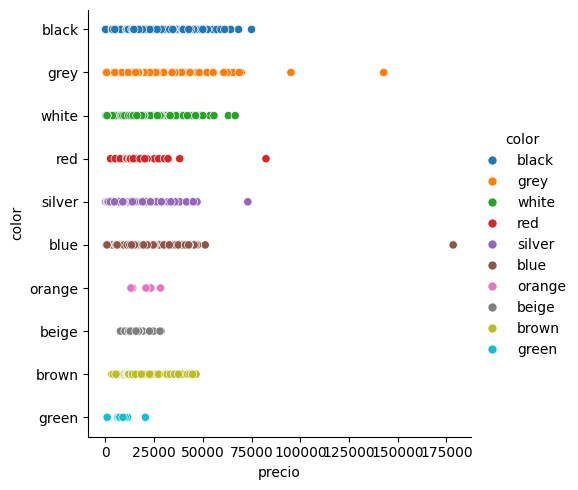

In [51]:
# Hacemos un scatter plot para anaalizar la relación entre el precio y el color del coche
sns.relplot(x="precio", y="color", hue="color", data=bmw)

In [52]:
def obtener_color_binario(x):
  if str(x) == 'nan':
    return np.nan
  elif x in ['black','grey','blue','white']:
    return 1
  else:
    return 0

In [53]:
df_bmw['color_estandar'] = df_bmw['color'].map(obtener_color_binario)
df_antes['color_estandar'] = df_antes['color'].map(obtener_color_binario)

In [54]:
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['color_estandar'])
df_nulls_1.rename(columns={"color_estandar":"color_estandar_1"},inplace=True)

COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['color_estandar'])
df_nulls_2.rename(columns={"color_estandar":"color_estandar_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['color_estandar'])
df_nulls_3.rename(columns={"color_estandar":"color_estandar_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['color_estandar'])
df_nulls_4.rename(columns={"color_estandar":"color_estandar_4"},inplace=True)


In [55]:
# Nulos iniciales en 'color_estandar'
nulos_iniciales = df_bmw['color_estandar'].isna().sum()
print(f"Nulos iniciales en 'color_estandar': {nulos_iniciales}")

# MERGE 1
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_4']].bfill(axis=1).iloc[:, 0]
nulos_post_4 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen color_estandar nulo
df_bmw = df_bmw[df_bmw['color_estandar'].notna()]

# Contamos los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_4}")

# Eliminamos columnas auxiliares
df_bmw.drop(columns=['color_estandar_1', 'color_estandar_2', 'color_estandar_3', 'color_estandar_4'], inplace=True)

Nulos iniciales en 'color_estandar': 424
Nulos restantes tras merge 1: 11 (0.23%)
Nulos restantes tras merge 2: 5 (0.10%)
Nulos restantes tras merge 3: 1 (0.02%)
Nulos restantes tras merge 4: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


In [56]:
tabla_nulos(df_bmw).loc[['color_estandar']]

,NULOS,% NULOS,VALORES UNICOS
color_estandar,0,0.0,2


In [57]:
# Una vez imputados los nulos en la nueva variable, borramos la columna color
df_bmw.drop(columns='color', inplace=True)

# Comprobamos que la hemos eliminado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4781 non-null   object 
 1   km                           4781 non-null   float64
 2   potencia                     4781 non-null   float64
 3   tipo_coche                   4781 non-null   object 
 4   volante_regulable            4781 non-null   bool   
 5   aire_acondicionado           4308 non-null   object 
 6   camara_trasera               4781 non-null   bool   
 7   asientos_traseros_plegables  1439 non-null   object 
 8   elevalunas_electrico         4781 non-null   bool   
 9   bluetooth                    4077 non-null   object 
 10  alerta_lim_velocidad         4073 non-null   object 
 11  precio                       4781 non-null   float64
 12  años_coche                   2406 non-null   float64
 13  cantidad_extras   

In [58]:
# Conteos por color (ordenados)
antes_color = df_antes['color_estandar'].value_counts().sort_index()
despues_color = df_bmw['color_estandar'].value_counts().sort_index()

# Etiquetas personalizadas para el eje X
etiquetas = {0: '0: Otros', 1: '1: Black / Grey / Blue / White'}
x_labels = [etiquetas.get(i, str(i)) for i in antes_color.index]

fig = go.Figure()

# Añadimos barras para antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_color.values,
    marker_color='#373485',
    name='Antes',
    text=antes_color.values,
    textposition='outside',
    opacity=1,
))

# Añadimos barras para después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_color.reindex(antes_color.index, fill_value=0).values,
    marker_color='#c52b30',
    name='Después',
    text=despues_color.reindex(antes_color.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Configuramos el layout
fig.update_layout(
    title="Distribución de COLOR antes y después de la imputación",
    xaxis_title="Tipo de color",
    barmode='group',  # Barras en paralelo
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA AÑOS COCHE**

En esta columna observamos que representa la antigüedad del vehículo, una variable que sí puede aportar valor en la predicción del precio. Sin embargo, presenta valores continuos y algunos nulos, por lo que se decide agrupar en rangos categóricos y realizar una imputación estructurada.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `años_coche` y analizamos su distribución, agrupándola visualmente para entender mejor los intervalos más frecuentes.

2. Transformamos la variable continua en una variable categórica utilizando `pd.cut`, dividiendo en los siguientes rangos:
   - `1-3`: vehículos muy nuevos  
   - `4-6`: seminuevos  
   - `7-10`: usados en buen estado  
   - `11-15`: usados con más desgaste  
   - `16-20`: antiguos  
   - `21-25`: muy antiguos  
   - `>25`: clásicos o muy antiguos  

3. Para imputar los valores nulos en `años_coche`, generamos tres tablas auxiliares agrupadas por diferentes combinaciones de variables (`modelo`, `tipo_coche`, `potencia`), obteniendo el valor más frecuente (moda) dentro de cada grupo.

4. Realizamos varios merges para añadir estas imputaciones al dataframe original y, mediante `bfill(axis=1)`, rellenamos los valores nulos desde la imputación más específica a la más general.

5. Tras completar la imputación, eliminamos las columnas auxiliares utilizadas durante el proceso.

6. Comprobamos la cantidad de valores nulos tras la imputación y validamos el resultado con un gráfico de barras comparativo que muestra la distribución de `años_coche` antes y después del tratamiento. Observamos que el rango `4-6` ha aumentado más que las demás ya que este agrupaba más del **50 %** de los registros totales sin nulos.

In [59]:
tabla_nulos(df_bmw).loc[['años_coche']]

,NULOS,% NULOS,VALORES UNICOS
años_coche,2375,49.6758,23


In [60]:
distribuciones['años_coche'].sort_index()

años_coche
1.0     0.001035
2.0     0.009526
3.0     0.033547
4.0     0.131083
5.0     0.156554
6.0     0.089874
7.0     0.024022
8.0     0.010561
9.0     0.008076
10.0    0.008905
11.0    0.006005
12.0    0.006005
13.0    0.005798
14.0    0.002071
15.0    0.001657
16.0    0.000828
17.0    0.001657
18.0    0.000621
19.0    0.000621
21.0    0.000828
23.0    0.000207
24.0    0.000207
28.0    0.000207
NaN     0.500104
Name: proportion, dtype: float64

In [61]:
# Definir los rangos de edad y los nuevos valores
rangos = [0, 3, 6, 10, 15, 20, 25, 30]
nuevos_valores = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']

# Aplicar la transformación con pd.cut
df_bmw['años_coche'] = pd.cut(df_bmw['años_coche'], bins=rangos, labels=nuevos_valores, right=True)
df_antes['edad_coche'] = pd.cut(df_antes['años_coche'], bins=rangos, labels=nuevos_valores, right=True)

In [62]:
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['años_coche'])
df_nulls_1.rename(columns={"años_coche":"años_coche_1"},inplace=True)

COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['años_coche'])
df_nulls_2.rename(columns={"años_coche":"años_coche_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['años_coche'])
df_nulls_3.rename(columns={"años_coche":"años_coche_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['años_coche'])
df_nulls_4.rename(columns={"años_coche":"años_coche_4"},inplace=True)

In [63]:
# Nulos iniciales en 'años_coche'
nulos_iniciales = df_bmw['años_coche'].isna().sum()
print(f"Nulos iniciales en 'años_coche': {nulos_iniciales}")

# MERGE 1
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)

# Imputación tras merge 1
df_bmw['años_coche'] = df_bmw[['años_coche', 'años_coche_1']].bfill(axis=1).iloc[:, 0]

nulos_post_1 = df_bmw['años_coche'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)

# Imputación tras merge 2
df_bmw['años_coche'] = df_bmw[['años_coche', 'años_coche_2']].bfill(axis=1).iloc[:, 0]

nulos_post_2 = df_bmw['años_coche'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)

# Imputación tras merge 3
df_bmw['años_coche'] = df_bmw[['años_coche', 'años_coche_3']].bfill(axis=1).iloc[:, 0]

nulos_post_3 = df_bmw['años_coche'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)

# Imputación tras merge 4
df_bmw['años_coche'] = df_bmw[['años_coche', 'años_coche_4']].bfill(axis=1).iloc[:, 0]

nulos_post_4 = df_bmw['años_coche'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen 'años_coche' nulo
df_bmw = df_bmw[df_bmw['años_coche'].notna()]

# Contamos los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_4}")

# Eliminamos columnas auxiliares
df_bmw.drop(columns=['años_coche_1', 'años_coche_2', 'años_coche_3', 'años_coche_4'], inplace=True)

Nulos iniciales en 'años_coche': 2375
Nulos restantes tras merge 1: 112 (2.34%)
Nulos restantes tras merge 2: 38 (0.79%)
Nulos restantes tras merge 3: 17 (0.36%)
Nulos restantes tras merge 4: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


In [64]:
tabla_nulos(df_bmw).loc[['años_coche']]

,NULOS,% NULOS,VALORES UNICOS
años_coche,0,0.0,7


In [65]:
# Valores agrupados por edad/años de coche (ordenados)
antes_vals = df_antes['edad_coche'].value_counts().sort_index()
despues_vals = df_bmw['años_coche'].value_counts().sort_index()

# Convertir índices en cadenas si es necesario (para evitar problemas en el eje X)
x_labels = [str(i) for i in antes_vals.index]

fig = go.Figure()

# Añadir barras para Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_vals.values,
    name='Antes',
    marker_color='#373485',
    text=antes_vals.values,
    textposition='outside',
    opacity=1,
))

# Añadir barras para Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Layout
fig.update_layout(
    title="Distribución de AÑOS DE COCHE antes y después de la imputación",
    xaxis_title="Categorías de edad del coche",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1000,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA AIRE ACONDICIONADO**

La presencia de aire acondicionado en un vehículo puede tener un impacto directo en su valoración económica, por lo que resulta relevante conservar esta variable. Sin embargo, la columna presenta algunos valores nulos que deben ser tratados para no afectar al modelo predictivo.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `aire_acondicionado` y analizamos su distribución para determinar la proporción de datos ausentes y valorar la necesidad de imputación.

2. Para completar los valores nulos, creamos varias tablas auxiliares agrupadas por diferentes combinaciones de variables (`modelo`, `años_coche`, `potencia`, `tipo_coche`), con el objetivo de obtener el valor más frecuente (moda) en cada grupo.

3. En los casos en los que no se pudo obtener un valor representativo a partir del agrupamiento, utilizamos la moda global de la columna como último recurso.

4. Realizamos varios merges para añadir estas imputaciones al dataframe original y aplicamos `bfill(axis=1)` para rellenar los valores nulos con la imputación más específica disponible en cada fila.

5. Una vez finalizada la imputación, eliminamos las columnas auxiliares utilizadas durante el proceso.

6. Finalmente, validamos el tratamiento comprobando los valores nulos restantes y generamos un gráfico comparativo de barras que muestra la distribución de `aire_acondicionado` antes y después de la imputación.

In [66]:
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,473,9.893328,2


In [67]:
distribuciones['aire_acondicionado']

aire_acondicionado
True     0.715469
False    0.184303
NaN      0.100228
Name: proportion, dtype: float64

In [68]:
COLUMNS_1 = ['modelo','años_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['aire_acondicionado'])
df_nulls_1.rename(columns={"aire_acondicionado":"aire_acondicionado_1"},inplace=True)

COLUMNS_2 = ['modelo','potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['aire_acondicionado'])
df_nulls_2.rename(columns={"aire_acondicionado":"aire_acondicionado_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['aire_acondicionado'])
df_nulls_3.rename(columns={"aire_acondicionado":"aire_acondicionado_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
moda_global = df_bmw['aire_acondicionado'].mode().iloc[0]
df_nulls_4 = df_bmw[df_bmw['aire_acondicionado'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_4['aire_acondicionado_4'] = moda_global

In [69]:
# Nulos iniciales en 'aire_acondicionado'
nulos_iniciales = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos iniciales en 'aire_acondicionado': {nulos_iniciales}")

# MERGE 1
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)

# Imputación tras merge 1
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_1']].bfill(axis=1).iloc[:, 0]

nulos_post_1 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)

# Imputación tras merge 2
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_2']].bfill(axis=1).iloc[:, 0]

nulos_post_2 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)

# Imputación tras merge 3
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_3']].bfill(axis=1).iloc[:, 0]

nulos_post_3 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)

# Imputación tras merge 4
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_4']].bfill(axis=1).iloc[:, 0]

nulos_post_4 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen 'aire_acondicionado' nulo
df_bmw = df_bmw[df_bmw['aire_acondicionado'].notna()]

# # Contamos los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_4}")

# Eliminamos columnas auxiliares
df_bmw.drop(columns=[
    'aire_acondicionado_1','aire_acondicionado_2','aire_acondicionado_3','aire_acondicionado_4'], inplace=True)

Nulos iniciales en 'aire_acondicionado': 473
Nulos restantes tras merge 1: 3 (0.06%)
Nulos restantes tras merge 2: 3 (0.06%)
Nulos restantes tras merge 3: 2 (0.04%)
Nulos restantes tras merge 4: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


In [70]:
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,0,0.0,2


In [71]:
# Conteo antes y después
antes_ac = df_antes['aire_acondicionado'].value_counts().sort_index()
despues_ac = df_bmw['aire_acondicionado'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas como en 'antes_ac'
x_labels = [etiquetas.get(i, str(i)) for i in antes_ac.index]

# Asegurar que los valores de después están en el mismo orden
despues_vals = despues_ac.reindex(antes_ac.index, fill_value=0).values

fig = go.Figure()

# Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_ac.values,
    name='Antes',
    marker_color='#373485',
    text=antes_ac.values,
    textposition='outside',
    opacity=1
))

# Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

fig.update_layout(
    title="Distribución de AIRE ACONDICIONADO antes y después de la imputación",
    xaxis_title="Aire acondicionado",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA BLUETOOTH**

La disponibilidad de conexión Bluetooth en un vehículo representa una funcionalidad tecnológica valorada por los usuarios y, por tanto, puede influir en el precio final. Sin embargo, esta variable contiene valores nulos que es necesario imputar para no comprometer la calidad del modelo.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `bluetooth` y visualizamos su distribución para comprender la magnitud del problema y determinar si el patrón de ausencia tenía alguna relación con otras variables.

2. Creamos cinco tablas auxiliares agrupadas por diferentes combinaciones de variables que podían estar asociadas a la presencia de Bluetooth (`modelo`, `potencia`, `tipo_coche`, `aire_acondicionado`, `asientos_traseros_plegables`, `elevalunas_electrico`, `años_coche`), extrayendo en cada caso la moda como valor representativo.

3. Para los registros en los que no se pudo imputar el valor con ninguna de las combinaciones anteriores, asignamos la moda global de la columna como imputación final.

4. Unimos progresivamente las tablas auxiliares al dataset original mediante `merge`, y utilizamos la función `bfill(axis=1)` para completar los valores nulos en la columna `bluetooth`, comenzando por la imputación más específica y terminando con la más general.

5. Eliminamos las columnas auxiliares generadas para dejar únicamente la variable `bluetooth` ya imputada en el dataframe final.

6. Finalmente, validamos el proceso comprobando que no quedaban valores nulos y generamos un gráfico de barras comparativo que muestra la distribución de `bluetooth` antes y después de la imputación, permitiendo verificar visualmente la coherencia del tratamiento realizado.

In [72]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,704,14.724953,2


In [73]:
distribuciones['bluetooth']

bluetooth
False    0.643819
True     0.205633
NaN      0.150549
Name: proportion, dtype: float64

In [74]:
COLUMNS_1 = ['años_coche','tipo_coche','modelo','potencia', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['bluetooth'])
df_nulls_1.rename(columns={"bluetooth":"bluetooth_1"},inplace=True)

COLUMNS_2 = ['modelo', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['bluetooth'])
df_nulls_2.rename(columns={"bluetooth":"bluetooth_2"},inplace=True)

COLUMNS_3 = ['modelo','elevalunas_electrico']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['bluetooth'])
df_nulls_3.rename(columns={"bluetooth":"bluetooth_3"},inplace=True)

COLUMNS_4 = ['modelo']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['bluetooth'])
df_nulls_4.rename(columns={"bluetooth":"bluetooth_4"},inplace=True)

COLUMNS_5 = ['tipo_coche']
moda_global = df_bmw['bluetooth'].mode().iloc[0]
df_nulls_5 = df_bmw[df_bmw['bluetooth'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_5['bluetooth_5'] = moda_global

In [75]:
# Nulos iniciales en 'bluetooth'
nulos_iniciales = df_bmw['bluetooth'].isna().sum()
print(f"Nulos iniciales en 'bluetooth': {nulos_iniciales}")

# MERGE 1
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_4']].bfill(axis=1).iloc[:, 0]
nulos_post_4 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# MERGE 5
df_bmw = df_bmw.merge(df_nulls_5, how='left', left_on=COLUMNS_5, right_on=COLUMNS_5)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_5']].bfill(axis=1).iloc[:, 0]
nulos_post_5 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 5: {nulos_post_5} ({nulos_post_5 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen bluetooth nulo
df_bmw = df_bmw[df_bmw['bluetooth'].notna()]

# Contamos los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_5}")

# Eliminamos columnas auxiliares
df_bmw.drop(columns=[
    'bluetooth_1','bluetooth_2', 'bluetooth_3', 'bluetooth_4', 'bluetooth_5'], inplace=True)

Nulos iniciales en 'bluetooth': 704
Nulos restantes tras merge 1: 506 (10.58%)
Nulos restantes tras merge 2: 480 (10.04%)
Nulos restantes tras merge 3: 4 (0.08%)
Nulos restantes tras merge 4: 1 (0.02%)
Nulos restantes tras merge 5: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


In [76]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,0,0.0,2


In [77]:
import plotly.graph_objects as go

# Conteo antes y después
antes_bt = df_antes['bluetooth'].value_counts().sort_index()
despues_bt = df_bmw['bluetooth'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas igual que en antes_bt
x_labels = [etiquetas.get(i, str(i)) for i in antes_bt.index]

# Valores de después en el mismo orden que antes
despues_vals = despues_bt.reindex(antes_bt.index, fill_value=0).values

fig = go.Figure()

# Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_bt.values,
    name='Antes',
    marker_color='#373485',
    text=antes_bt.values,
    textposition='outside',
    opacity=1
))

# Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

fig.update_layout(
    title="Distribución de BLUETOOTH antes y después de la imputación",
    xaxis_title="Bluetooth",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA ALERTA LIMITE VELOCIDAD**

La presencia del sistema de alerta de límite de velocidad es una característica de asistencia a la conducción que puede incidir en el precio del coche. Dado que esta variable contiene valores nulos, hemos decidido imputarlos de forma coherente con el comportamiento del resto del dataset.

El proceso que hemos llevado a cabo es el siguiente:

1. Revisamos el porcentaje de valores ausentes en la columna y consultamos su distribución para entender el contexto.

2. Creamos tres tablas auxiliares con imputaciones por moda según distintos niveles de agrupación:
   - La primera agrupa por `potencia` y `km`, para captar similitudes mecánicas y de uso.
   - La segunda agrupa por `modelo` y `potencia`, teniendo en cuenta la gama del vehículo.
   - La tercera agrupa por `tipo_coche` y asigna la moda global como último recurso.

3. Unimos estas imputaciones al dataframe original utilizando la función `bfill(axis=1)`, asignamos a cada fila con valor nulo el primer valor disponible.

4. Eliminamos las columnas auxiliares que hemos creado para dejar limpia la estructura final del dataframe.

5. Comprobamos que ya no quedan valores nulos y generamos una visualización que compara la distribución de la variable antes y después de la imputación, asegurándonos de que el reparto original se mantiene sin grandes alteraciones.

In [78]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,708,14.808617,2


In [79]:
distribuciones['alerta_lim_velocidad']

alerta_lim_velocidad
True     0.462622
False    0.387037
NaN      0.150342
Name: proportion, dtype: float64

In [80]:
COLUMNS_1 = ['potencia', 'km']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['alerta_lim_velocidad'])
df_nulls_1.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_1"},inplace=True)

COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['alerta_lim_velocidad'])
df_nulls_2.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_2"},inplace=True)

COLUMNS_3 = ['tipo_coche']
moda_global = df_bmw['alerta_lim_velocidad'].mode().iloc[0]
df_nulls_3 = df_bmw[df_bmw['alerta_lim_velocidad'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_3['alerta_lim_velocidad_3'] = moda_global

In [81]:
# Nulos iniciales en 'alerta_lim_velocidad'
nulos_iniciales = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos iniciales en 'alerta_lim_velocidad': {nulos_iniciales}")

# MERGE 1
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad', 'alerta_lim_velocidad_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad', 'alerta_lim_velocidad_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad', 'alerta_lim_velocidad_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# Eliminamos registros que aún tienen alerta_lim_velocidad nulo
df_bmw = df_bmw[df_bmw['alerta_lim_velocidad'].notna()]

# Contamos los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_3}")

# Eliminamos columnas auxiliares
df_bmw.drop(columns=[ 'alerta_lim_velocidad_1','alerta_lim_velocidad_2', 'alerta_lim_velocidad_3'], inplace=True)

Nulos iniciales en 'alerta_lim_velocidad': 708
Nulos restantes tras merge 1: 704 (14.72%)
Nulos restantes tras merge 2: 10 (0.21%)
Nulos restantes tras merge 3: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


In [82]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,0,0.0,2


In [83]:
# Conteo antes y después
antes_alerta = df_antes['alerta_lim_velocidad'].value_counts().sort_index()
despues_alerta = df_bmw['alerta_lim_velocidad'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Convertir índices a etiquetas personalizadas
x_labels_antes = [etiquetas.get(i, str(i)) for i in antes_alerta.index]
x_labels_despues = [etiquetas.get(i, str(i)) for i in despues_alerta.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_labels_antes,
    y=antes_alerta.values,
    name='Antes',
    marker_color='#373485',
    opacity=1,
    text=antes_alerta.values,
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=x_labels_despues,
    y=despues_alerta.values,
    name='Después',
    marker_color='#c52b30',
    opacity=1,
    text=despues_alerta.values,
    textposition='outside'
))

fig.update_layout(
    title="Distribución de ALERTA LÍMITE DE VELOCIDAD antes y después de la imputación",
    xaxis_title="Alerta límite velocidad",
    barmode='group',
    template='plotly_white',
    width=800,
    height=470,
    plot_bgcolor='#e6e6e7', 
    paper_bgcolor='#e6e6e7'
)

fig.show()

### **COLUMNA ASIENTOS TRASEROS PLEGABLES**

La columna **asientos traseros plegables** presenta un alto porcentaje de valores nulos, aproximadamente un **70 %**, lo que disminuye la fiabilidad de esta variable. Además, si imputásemos los valores ausentes utilizando la moda (teniendo en cuenta que el **80 %** de los valores no nulos son `False`), la distribución resultante quedaría muy desbalanceada, con más del **90 %** de un único valor. Esto haría que la variable aportase poca o ninguna información relevante para el modelo.

Por este motivo, decidimos eliminar la columna para evitar introducir ruido o sesgos en el análisis.

El proceso que hemos seguido es el siguiente:

1. Revisamos el porcentaje de valores ausentes en la columna y su distribución para evaluar su calidad.

2. Analizamos la distribución tras una posible imputación con la moda y observamos que la variable perdería su capacidad informativa.

3. Decidimos eliminar la columna para mantener la calidad del dataset.

4. Verificamos que la columna se haya eliminado correctamente del dataframe.

In [84]:
tabla_nulos(df_bmw).loc[['asientos_traseros_plegables']]

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3342,69.901694,2


In [85]:
distribuciones['asientos_traseros_plegables']

asientos_traseros_plegables
NaN      0.700352
False    0.237316
True     0.062332
Name: proportion, dtype: float64

In [86]:
# Borramos la columna 'asientos_traseros_plegables'
df_bmw.drop(columns='asientos_traseros_plegables', inplace=True)

# Comprobamos que se han eliminado correctamente
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4781 non-null   object  
 1   km                    4781 non-null   float64 
 2   potencia              4781 non-null   float64 
 3   tipo_coche            4781 non-null   object  
 4   volante_regulable     4781 non-null   bool    
 5   aire_acondicionado    4781 non-null   bool    
 6   camara_trasera        4781 non-null   bool    
 7   elevalunas_electrico  4781 non-null   bool    
 8   bluetooth             4781 non-null   bool    
 9   alerta_lim_velocidad  4781 non-null   bool    
 10  precio                4781 non-null   float64 
 11  años_coche            4781 non-null   category
 12  cantidad_extras       4781 non-null   int64   
 13  km_por_año            2406 non-null   float64 
 14  color_estandar        4781 non-null   float64 
dtypes: b

In [87]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
km_por_año,2375,49.6758,2401
modelo,0,0.0000,76
km,0,0.0000,4725
potencia,0,0.0000,59
tipo_coche,0,0.0000,8
volante_regulable,0,0.0000,2
aire_acondicionado,0,0.0000,2
camara_trasera,0,0.0000,2
elevalunas_electrico,0,0.0000,2
bluetooth,0,0.0000,2


## **05 - ANÁLISIS UNIVARIABLE**

In [88]:
df_bmw.dtypes

modelo                    object
km                       float64
potencia                 float64
tipo_coche                object
volante_regulable           bool
aire_acondicionado          bool
camara_trasera              bool
elevalunas_electrico        bool
bluetooth                   bool
alerta_lim_velocidad        bool
precio                   float64
años_coche              category
cantidad_extras            int64
km_por_año               float64
color_estandar           float64
dtype: object

In [89]:
# Volvemos a ejecutar la función diccionario_distribuciones para obtener las nuevas distribuciones
distribuciones = diccionario_distribuciones(df_bmw)

#### **VARIABLES NÚMERICAS**


##### **KM**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">140,973 km</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">141,084 km</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">476 km – 1,000,376 km</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable kilometraje (km) representa la distancia total recorrida por cada vehículo registrado. En nuestro análisis, el kilometraje tiene una media de aproximadamente 140,973 km y una mediana muy cercana, 141,084 km, La distribución del kilometraje en el conjunto de datos es asimétrica con sesgo positivo (sesgo a la derecha). Esto significa que la mayoría de los vehículos tienen un kilometraje moderado o bajo, concentrado alrededor de la media y la mediana (~140,000 km), pero existen algunos vehículos con valores mucho más altos que alargan la cola derecha de la distribución.<br><br>
El rango de valores va desde un mínimo negativo que hemos eliminado y el siguiente es de 476 km hasta un máximo excepcional de más de 1,000,000 km, aunque este último se consideró un valor atípico extremo y se eliminó para preservar la calidad del análisis. La mayoría de los vehículos (75%) tienen menos de 175,239 km, lo que sugiere que el dataset contiene principalmente coches con un kilometraje moderado.<br><br>
Los valores altos (superiores a 400,000 km) son poco frecuentes y hemos considerado no borrarlos porque nos parecen valores razonables.<br><br>
Observamos que los coches deportivos (+250 CV) tienen la media de km (108924 km) inferior a los coches no deportivos (141032 km), así es como confirmamos nuestra hipotesis de que los coches deportivos se usan menos que los no deportivos.
</p>

In [90]:
df_bmw['km'].describe().round()

count       4781.0
mean      140907.0
std        59933.0
min          -64.0
25%       102943.0
50%       141080.0
75%       175263.0
max      1000376.0
Name: km, dtype: float64

In [91]:
# Media y mediana de la columna 'km'
media_km = df_bmw['km'].mean()
mediana_km = df_bmw['km'].median()

print(f"Media de km: {media_km}")
print(f"Mediana de km: {mediana_km}")

Media de km: 140906.82555950637
Mediana de km: 141080.0


In [92]:
# Hemos visto con .describe valores negativos en la columna 'km'
df_bmw[df_bmw['km'] < 0]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
2901,640 Gran Coupé,-64.0,230.0,sedan,True,True,False,False,False,True,75000.0,1-3,4,NaN,1.0


In [93]:
# Hay un registro con km negativos, lo cual no es posible. Guardamos su índice y eliminamos la fila del dataset.
indice_negativos = df_bmw[df_bmw['km'] < 0].index
df_bmw = df_bmw.drop(index=indice_negativos)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['km'] < 0]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar


In [94]:
# Comprobamos cuantos coches tienen más de 400.000 km
df_bmw[df_bmw['km'] > 400000]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
542,520,484615.0,120.0,estate,True,True,False,False,False,False,8300.0,7-10,3,69230.714286,1.0
1549,320,400654.0,110.0,estate,False,False,True,False,False,False,1800.0,11-15,2,33387.833333,1.0
2322,318,477571.0,85.0,sedan,False,True,False,False,True,False,1200.0,16-20,2,NaN,1.0
3156,320,405816.0,100.0,sedan,False,False,False,False,False,False,500.0,16-20,1,22545.333333,1.0
3687,118,1000376.0,90.0,hatchback,True,False,False,False,False,False,1400.0,11-15,2,76952.000000,1.0


In [95]:
# Calculamos los límites para detectar outliers en la columna 'km' utilizando el método del rango intercuartílico (IQR)
Q1 = df_bmw['km'].quantile(0.25)
Q3 = df_bmw['km'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_km = df_bmw[(df_bmw['km'] < limite_inferior) | (df_bmw['km'] > limite_superior)]

print(f"El limite inferior es {limite_inferior} y el limite superior es {limite_superior}")
print(f"Número de outliers en km: {len(outliers_km)}")

El limite inferior es -5367.5 y el limite superior es 283642.5
Número de outliers en km: 93


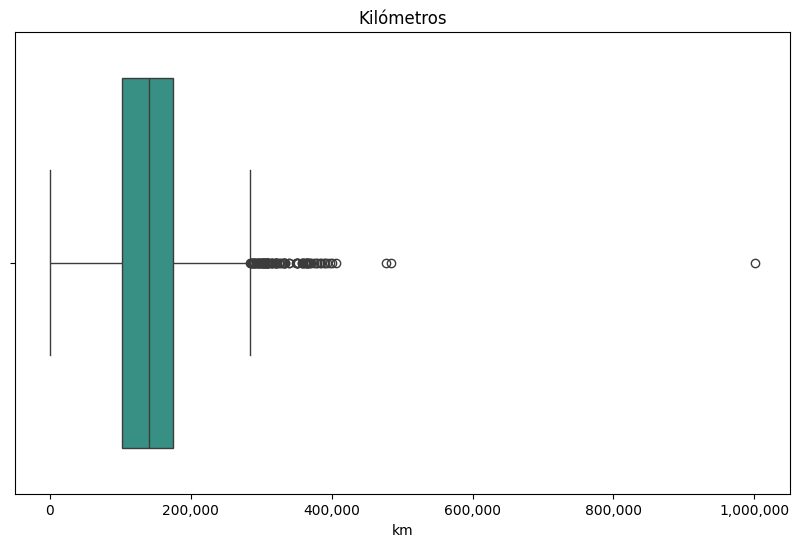

In [96]:
# Visualización de boxplot para visualizar los outliers en la columna 'km'
plt.figure(figsize=(10,6))

sns.boxplot(x=df_bmw['km'], color='#2A9D8F')
plt.title('Kilómetros')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

In [97]:
# Comprobamos el número de registros de BMW que tienen el modelo '118', para deidir si borrar el outlier
len(df_bmw[df_bmw["modelo"]=="118"])

143

In [98]:
# Buscamos el indice del registro con más de 1.000.000 km
indice_outlier_km = df_bmw[df_bmw['km'] > 1000000].index

# Eliminamos el registro con más de 1.000.000 km
df_bmw = df_bmw.drop(index=indice_outlier_km)

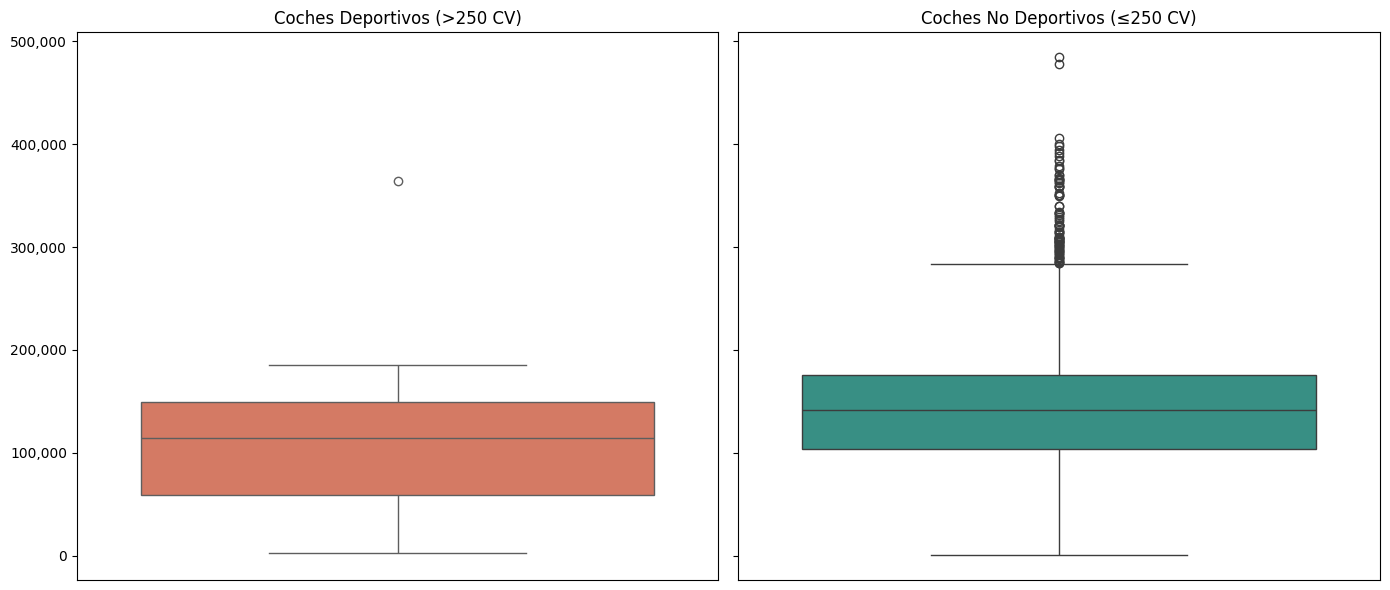

In [99]:
# Filtrar los datos
deportivos = df_bmw[(df_bmw['potencia'] > 250) & (df_bmw['km'].notnull())]
no_deportivos = df_bmw[(df_bmw['potencia'] <= 250) & (df_bmw['km'].notnull())]

# Crear figura con 2 subgráficos horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot para deportivos
sns.boxplot(y=deportivos['km'], ax=axes[0], color='#E76F51')
axes[0].set_title('Coches Deportivos (>250 CV)')
axes[0].set_ylabel('')
axes[0].xaxis.set_visible(False)
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Boxplot para no deportivos
sns.boxplot(y=no_deportivos['km'], ax=axes[1], color='#2A9D8F')
axes[1].set_title('Coches No Deportivos (≤250 CV)')
axes[1].set_ylabel('')
axes[1].xaxis.set_visible(False)
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

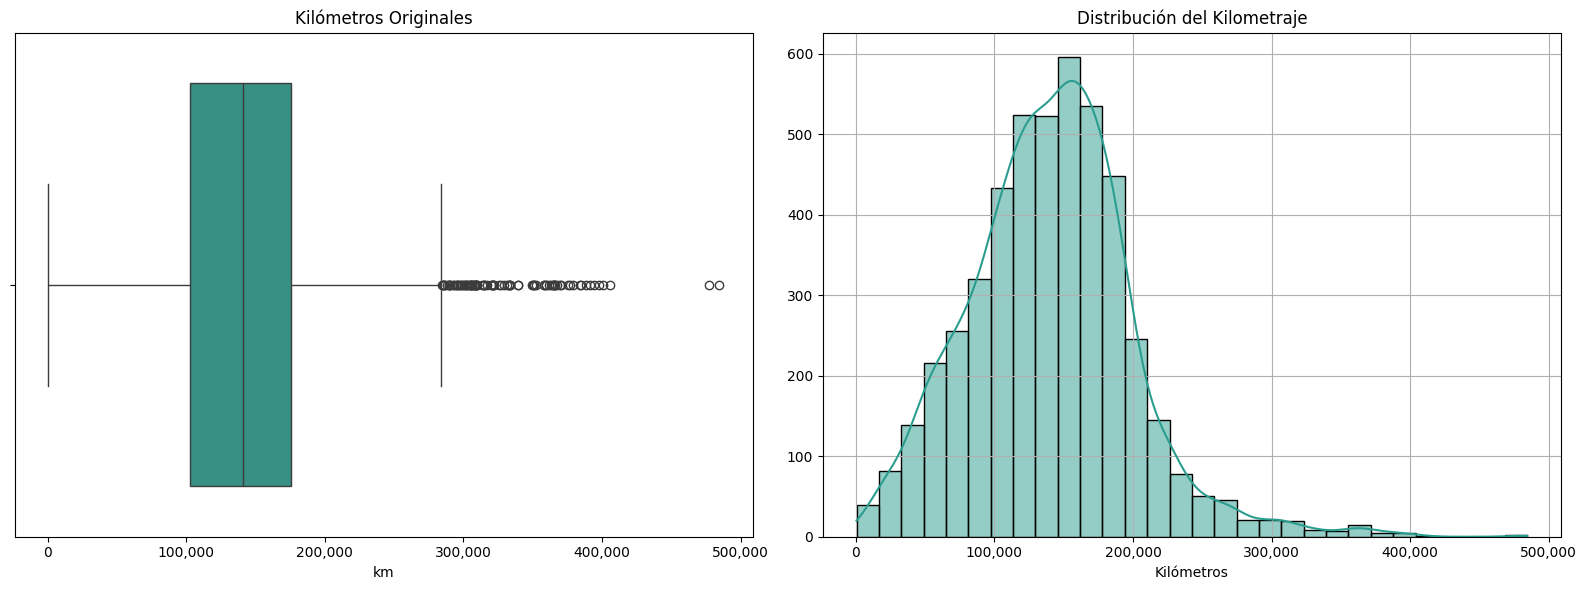

In [100]:
plt.figure(figsize=(16,6))

# Gráfico 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['km'], color='#2A9D8F')
plt.title('Kilómetros Originales')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Gráfico 2: Histograma
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['km'], bins=30, kde=True, color='#2A9D8F')
plt.title('Distribución del Kilometraje')
plt.xlabel('Kilómetros')
plt.ylabel('')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

##### **POTENCIA**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">129 CV</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">120 CV</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">66 CV – 423 CV</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable potencia refleja la fuerza del motor de cada vehículo. Presenta una media de 129 CV y una mediana de 120 CV, indicando que la distribución es ligeramente asimétrica, hacia valores más altos. El rango es amplio, desde un mínimo de 66 CV hasta un máximo de 423 CV, que podría considerarse un outlier pero hemos decidido no eliminarlo porque creemos que no es un valor de potencia que pudiera ser muy poco común.<br><br>
El 75% de los vehículos tienen una potencia inferior a 135 CV, lo que sugiere que la mayoría se sitúa en un rango de potencia moderado. Los valores muy altos, como aquellos por encima de 200 CV, son relativamente pocos.<br><br>
Hemos eliminado valores que se encontraban por debajo del rango intercuartílico (Q3), consideramos que esos 3 registros no contienen valores correctos.<br><br>
Hemos estudiado si se cumple que cuanto mayor es la potencia, mayor es la proporcion de equipamiento que tienen. Así es, tal y como vemos en el gráfico la proporción es más alta cuanto mayor potencia tiene el coche.
</p>


In [101]:
# Estadísticas descriptivas para potencia
df_bmw['potencia'].describe()

count    4779.000000
mean      128.846621
std        38.841012
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [102]:
# Media y mediana de la columna 'potencia'
media_potencia = df_bmw['potencia'].mean()
mediana_potencia = df_bmw['potencia'].median()

print(f"Media de potencia: {media_potencia}")
print(f"Mediana de potencia: {mediana_potencia}")

Media de potencia: 128.84662063193136
Mediana de potencia: 120.0


In [103]:
# Detectamos posibles outliers usando el método IQR
Q1_pot = df_bmw['potencia'].quantile(0.25)
Q3_pot = df_bmw['potencia'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot

limite_inferior_pot = Q1_pot - 1.5 * IQR_pot
limite_superior_pot = Q3_pot + 1.5 * IQR_pot

outliers_potencia = df_bmw[(df_bmw['potencia'] < limite_inferior_pot) | (df_bmw['potencia'] > limite_superior_pot)]

print(f"Límite inferior potencia: {limite_inferior_pot}")
print(f"Límite superior potencia: {limite_superior_pot}")
print(f"Número de outliers en Potencia: {len(outliers_potencia)}")

Límite inferior potencia: 47.5
Límite superior potencia: 187.5
Número de outliers en Potencia: 577


In [104]:
# Hemos visto con .describe valores a 0, también buscamos potencias inferiores a 47.5 cv en la columna 'potencia
df_bmw[df_bmw['potencia'] < 45.5]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
1771,i3,152328.0,25.0,hatchback,False,True,False,False,False,True,20300.0,4-6,2,NaN,1.0
1899,i3,152470.0,25.0,hatchback,False,True,False,False,False,True,15500.0,4-6,3,NaN,1.0
3720,X1,81770.0,0.0,suv,False,False,False,False,False,True,11700.0,4-6,0,20442.5,1.0


In [105]:
# Hay tres registros con potencia 0 o con valores inferiores a 45.5 (comprobado a nivel negocio que no existe el modelo i3 con 25 de potencia, el mínimo son 35 cv de potencia de gasolina). 
# Guardamos sus índices y eliminamos las filas del dataset.
indice_potencia = df_bmw[df_bmw['potencia'] < 50].index
df_bmw = df_bmw.drop(index=indice_potencia)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['potencia'] < 50]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar


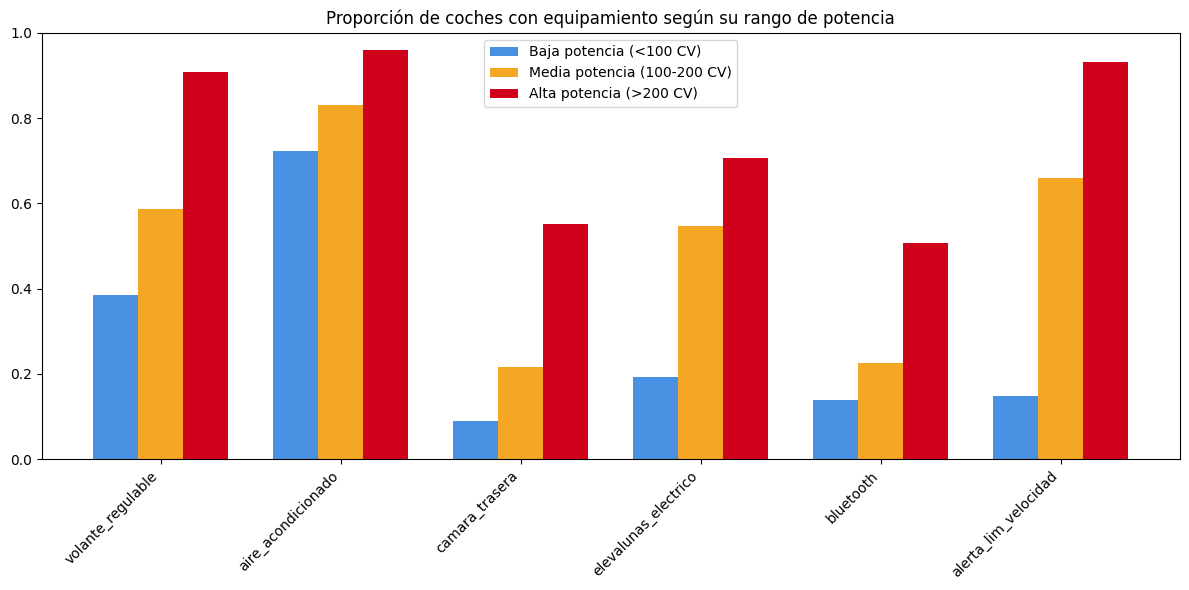

In [106]:
# Definir rangos de potencia
bins = [0, 100, 200, np.inf]
labels = ['Baja potencia (<100 CV)', 'Media potencia (100-200 CV)', 'Alta potencia (>200 CV)']
df_bmw['rango_potencia'] = pd.cut(df_bmw['potencia'], bins=bins, labels=labels)

# Lista de variables booleanas de equipamiento
equipamiento_variables = [
    'volante_regulable',
    'aire_acondicionado',
    'camara_trasera',
    'elevalunas_electrico',
    'bluetooth',
    'alerta_lim_velocidad'
]

# Agrupar por rango de potencia y calcular la media (proporción) de cada equipamiento
equipamiento_por_potencia = df_bmw.groupby('rango_potencia')[equipamiento_variables].mean().T

# Paleta personalizada según rango de potencia
paleta_personalizada = {
    'Baja potencia (<100 CV)': '#4A90E2',
    'Media potencia (100-200 CV)': '#F5A623',
    'Alta potencia (>200 CV)': '#D0021B'  
}

# Graficar usando matplotlib para aplicar colores personalizados a cada barra
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
indices = np.arange(len(equipamiento_variables))

for i, rango in enumerate(labels):
    valores = equipamiento_por_potencia[rango].values
    ax.bar(indices + i*bar_width, valores, bar_width, label=rango, color=paleta_personalizada[rango])

ax.set_xticks(indices + bar_width)
ax.set_xticklabels(equipamiento_variables, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.set_ylabel('')
ax.set_title('Proporción de coches con equipamiento según su rango de potencia')
ax.legend(title='')
plt.tight_layout()
plt.show()

# Eliminamos la columna 'rango_potencia' ya que no la vamos a utilizar más
df_bmw.drop(columns='rango_potencia', inplace=True)

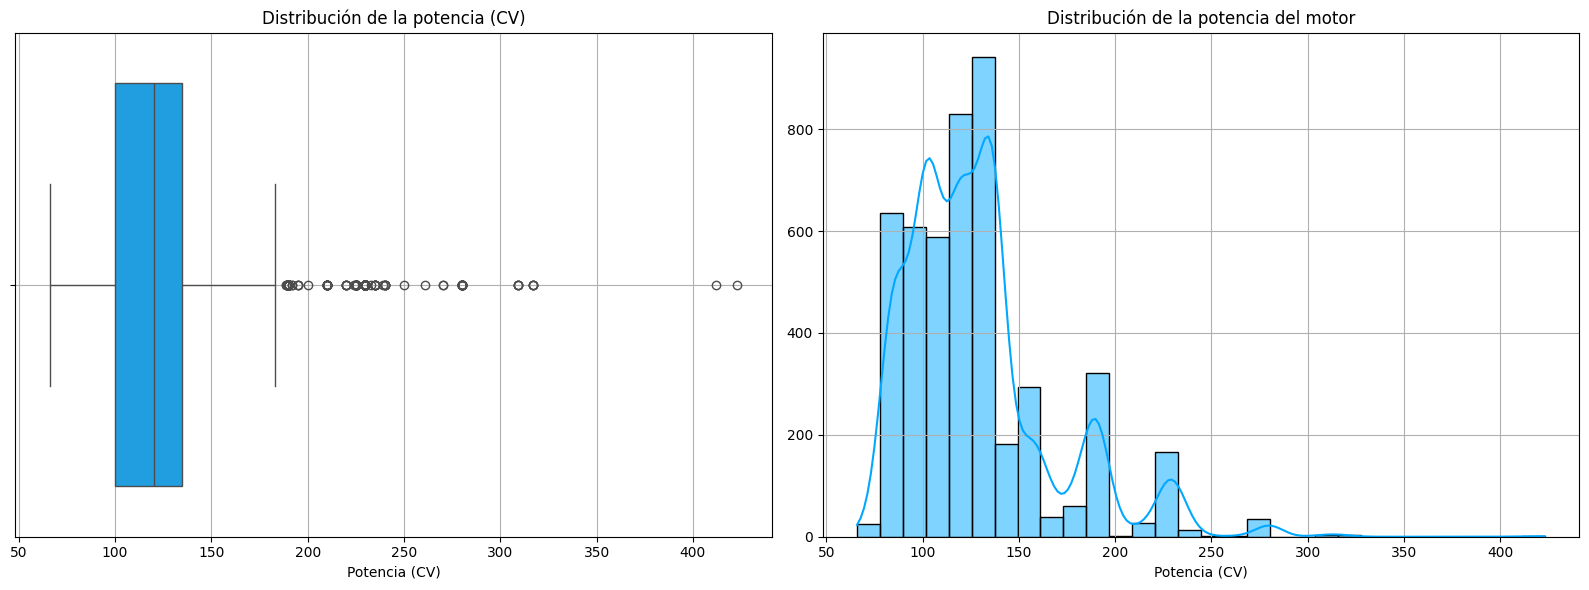

In [107]:
plt.figure(figsize=(16,6))

# Gráfico 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['potencia'], color='#00A8FF')
plt.title('Distribución de la potencia (CV)')
plt.xlabel('Potencia (CV)')
plt.grid(True)

# Gráfico 2: Histograma con KDE
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['potencia'], bins=30, kde=True, color='#00A8FF')
plt.title('Distribución de la potencia del motor')
plt.xlabel('Potencia (CV)')
plt.ylabel('')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout()
plt.show()

##### **PRECIO**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">15,832 €</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">14,200 €</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">100 € – 178,500 €</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable precio representa el valor de venta de cada vehículo en euros. La media del precio es de aproximadamente 15,832 €, mientras que la mediana es un poco menor, 14,200 €. Esta diferencia entre media y mediana indica que la distribución de los precios no es completamente simétrica, sino que está influenciada por algunos vehículos con precios muy elevados. La distribución presenta una asimetría hacia la derecha (sesgo positivo), es decir, hay más vehículos con precios bajos o medios y una cola larga hacia precios altos. 
<br><br>
El rango de precios es amplio, desde un mínimo de 100 € hasta un máximo cercano a los 178,500 €. Aunque existen precios muy altos, especialmente en modelos de alta gama como los BMW X3 y X4, que son SUV de lujo y por tanto justifican estos valores elevados, no se consideran como outliers superiores en este análisis.<br><br>
El 75% de los vehículos tienen un precio inferior a 18,600 €, lo que sugiere que la mayoría se sitúa en un rango de precio moderado y accesible.<br><br>
Por otro lado, se detectaron 7 registros con precios anormalmente bajos (100 €) que corresponden a vehículos relativamente nuevos, con menos de 6 años de antigüedad. Estos valores bajos no son coherentes con el mercado y se clasifican como outliers inferiores incorrectos.<br><br>

</p>


In [108]:
# Estadísticas descriptivas para precio
df_bmw['precio'].describe()

count      4776.000000
mean      15817.169179
std        9167.037834
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [109]:
# Media y mediana de la columna 'precio'
media_precio = df_bmw['precio'].mean()
mediana_precio = df_bmw['precio'].median()

print(f"Media de precio: {media_precio}")
print(f"Mediana de precio: {mediana_precio}")

Media de precio: 15817.16917922948
Mediana de precio: 14200.0


In [110]:
# Cálculo del rango intercuartílico (IQR)
Q1_precio = df_bmw['precio'].quantile(0.25)
Q3_precio = df_bmw['precio'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

limite_inferior_precio = Q1_precio - 1.5 * IQR_precio
limite_superior_precio = Q3_precio + 1.5 * IQR_precio

outliers_precio = df_bmw[(df_bmw['precio'] < limite_inferior_precio) | (df_bmw['precio'] > limite_superior_precio)]

print(f"Límite inferior precio: {limite_inferior_precio}")
print(f"Límite superior precio: {limite_superior_precio}")
print(f"Número de outliers en Precio: {len(outliers_precio)}")


Límite inferior precio: -900.0
Límite superior precio: 30300.0
Número de outliers en Precio: 307


In [111]:
df_bmw[df_bmw["precio"]>limite_superior_precio].sort_values(by="precio")

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
4094,X4,103064.0,140.0,suv,True,True,False,False,False,True,30500.0,1-3,4,34354.666667,1.0
3873,X5,76677.0,190.0,suv,True,True,False,True,False,True,30500.0,4-6,5,NaN,1.0
4218,X5,100943.0,190.0,suv,False,True,True,False,False,True,30500.0,4-6,3,25235.750000,1.0
59,435,26062.0,225.0,coupe,True,True,False,True,True,True,30500.0,4-6,7,NaN,1.0
2654,535,108675.0,230.0,estate,False,True,False,False,True,True,30600.0,4-6,4,27168.750000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,X5 M,4530.0,230.0,suv,True,True,False,False,False,True,73100.0,1-3,2,2265.000000,0.0
4098,X6 M,2970.0,423.0,suv,True,True,True,False,False,True,82400.0,1-3,4,1485.000000,0.0
89,i8,12402.0,170.0,coupe,True,True,False,False,False,True,95200.0,4-6,3,NaN,1.0
4628,X4,103222.0,140.0,suv,True,True,False,True,False,True,142800.0,4-6,5,25805.500000,1.0


In [112]:
# Observamos los registros con precio superior a 100.000 euros
df_bmw[df_bmw["precio"]>100000].sort_values(by="precio")

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
4628,X4,103222.0,140.0,suv,True,True,False,True,False,True,142800.0,4-6,5,25805.5,1.0
4696,X3,72515.0,135.0,suv,False,False,True,False,False,True,178500.0,4-6,2,14503.0,1.0


In [113]:
# Listamos los registros con precio inferior a 500 euros
df_bmw[df_bmw["precio"]<500]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
550,320,179358.0,120.0,estate,False,True,False,False,False,True,100.0,4-6,3,35871.600000,1.0
613,318,147558.0,105.0,estate,False,True,False,False,False,True,100.0,4-6,1,36889.500000,1.0
861,318,134156.0,105.0,estate,False,True,False,False,False,True,100.0,4-6,2,33539.000000,1.0
1233,320,170381.0,135.0,estate,True,True,False,False,False,False,100.0,4-6,3,NaN,0.0
1490,520,358332.0,100.0,estate,False,False,False,True,False,False,400.0,16-20,2,NaN,1.0
1534,520,358333.0,100.0,estate,False,False,False,True,False,False,400.0,16-20,2,NaN,1.0
1807,116,174524.0,85.0,hatchback,False,True,False,False,False,False,100.0,4-6,2,43631.000000,1.0
2444,525,230578.0,85.0,sedan,False,False,False,False,False,False,200.0,21-25,1,10979.904762,1.0
2543,525,229880.0,85.0,sedan,False,False,False,False,False,False,200.0,21-25,1,10946.666667,1.0
2580,525,230264.0,85.0,sedan,False,False,False,False,False,False,200.0,21-25,1,10964.952381,1.0


In [114]:
# Consideramos que los registros con precio inferior a 500 euros y menos de '4-6' años de coche son incorrectos y no serían representativos para predecir
# Guardamos sus índices y eliminamos las filas del dataset.
indice_precio = df_bmw[(df_bmw['precio'] < 500) & (df_bmw['años_coche'] == '4-6')].index
df_bmw = df_bmw.drop(index=indice_precio)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['precio'] < 500]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,cantidad_extras,km_por_año,color_estandar
1490,520,358332.0,100.0,estate,False,False,False,True,False,False,400.0,16-20,2,NaN,1.0
1534,520,358333.0,100.0,estate,False,False,False,True,False,False,400.0,16-20,2,NaN,1.0
2444,525,230578.0,85.0,sedan,False,False,False,False,False,False,200.0,21-25,1,10979.904762,1.0
2543,525,229880.0,85.0,sedan,False,False,False,False,False,False,200.0,21-25,1,10946.666667,1.0
2580,525,230264.0,85.0,sedan,False,False,False,False,False,False,200.0,21-25,1,10964.952381,1.0
3023,318,98097.0,85.0,sedan,True,False,False,False,False,True,400.0,21-25,3,4087.375000,1.0
3405,316,184233.0,77.0,sedan,False,False,False,False,False,False,400.0,16-20,1,9696.473684,0.0


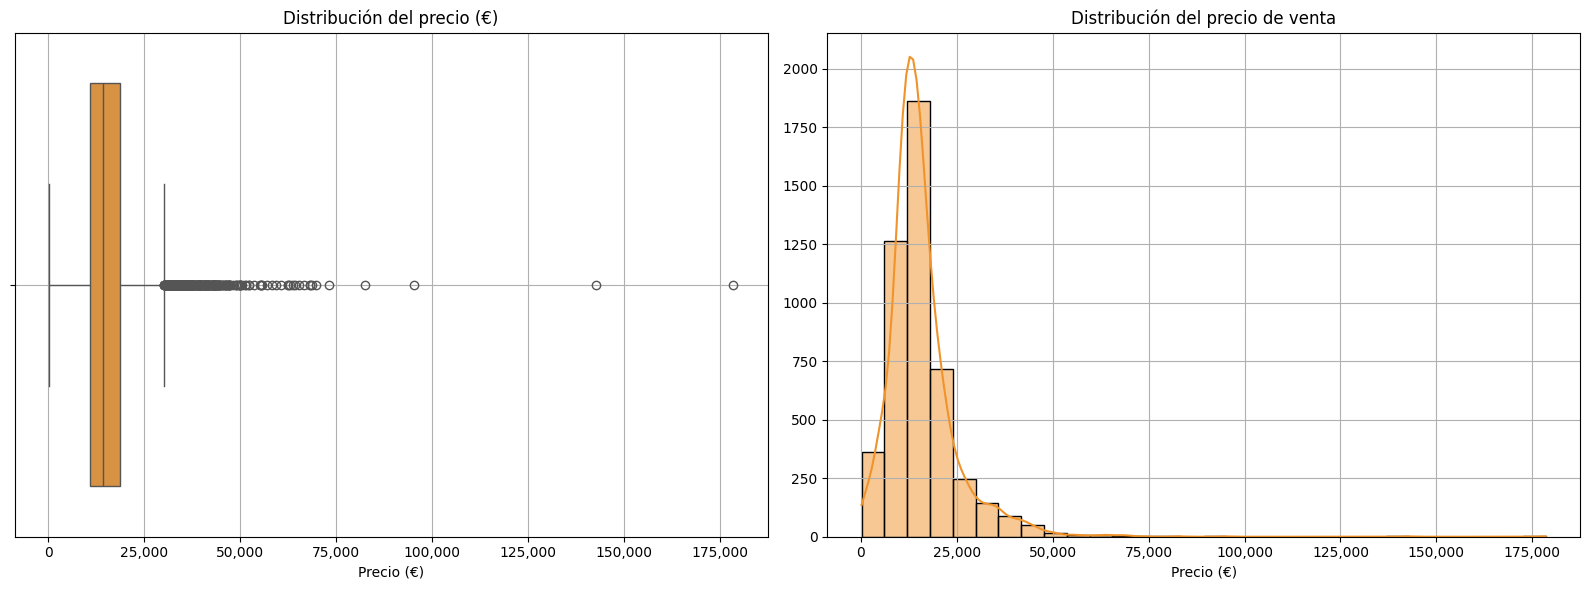

In [115]:
plt.figure(figsize=(16,6))

# Gráfico 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['precio'], color='#F0932B')
plt.title('Distribución del precio (€)')
plt.xlabel('Precio (€)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Gráfico 2: Histograma con KDE
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['precio'], bins=30, kde=True, color='#F0932B')
plt.title('Distribución del precio de venta')
plt.xlabel('Precio (€)')
plt.ylabel('')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

#### **VARIABLES BOOLEANAS**

##### **VOLANTE REGULABLE**

<p align="center" style="font-size:16px;">
  <b>Presente:</b> <span style="color:#7FB765;">2.639 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>No presente:</b> <span style="color:#CD4343;">2.149 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">55% con volante regulable</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>volante_regulable</b> indica si el vehículo dispone de volante ajustable, una característica de confort cada vez más habitual. De los 4.788 registros disponibles, un total de <b>2.639 vehículos (55%)</b> cuentan con esta funcionalidad, mientras que el <b>44.9%</b> restante no la incluye. <br><br>
Esto sugiere que más de la mitad del conjunto de vehículos ofertados incluye esta mejora ergonómica, aunque aún hay una proporción significativa que no la incorpora, como se observa en el gráfico, la proporción de coches que cuentan con volante regulable disminuye de forma notable en vehículos con más de 20 años. <br><br>
</p>


In [116]:
# Comprobamos el tipo de dato
print(df_bmw['volante_regulable'].dtype)

bool


In [117]:
# Estadísticas descriptivas para volante_regulable
df_bmw['volante_regulable'].describe()

count     4769
unique       2
top       True
freq      2629
Name: volante_regulable, dtype: object

In [118]:
distribuciones['volante_regulable']

volante_regulable
True     0.550512
False    0.449488
Name: proportion, dtype: float64

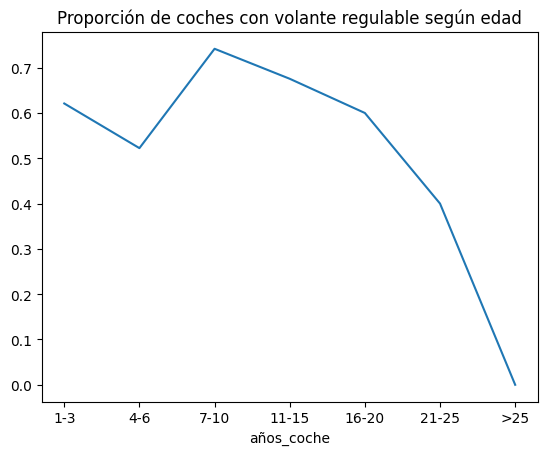

In [119]:
proporcion_por_edad = df_bmw.groupby('años_coche')['volante_regulable'].mean()
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con volante regulable según edad')
plt.ylabel('')
plt.show()

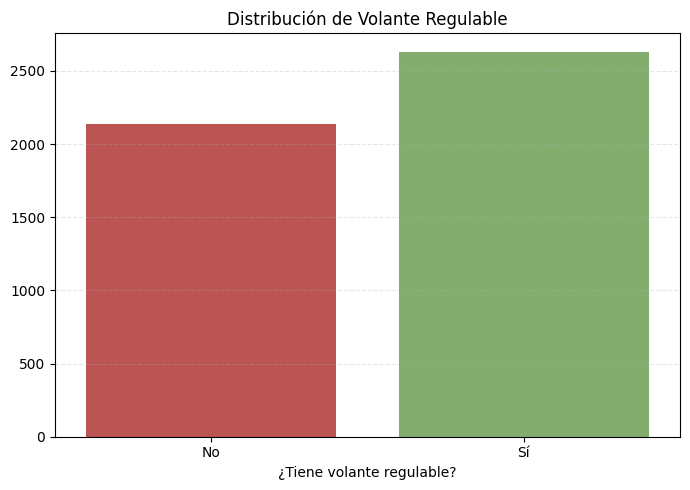

In [120]:
# Crear figura
plt.figure(figsize=(7, 5))

# Gráfico de barras
ax = sns.countplot(x='volante_regulable', data=df_bmw, palette=["#CD4343", "#7FB765"])

# Títulos y etiquetas
plt.title('Distribución de Volante Regulable')
plt.xlabel('¿Tiene volante regulable?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### **AIRE ACONDICIONADO**

<p align="center" style="font-size:16px;">
  <b>Presente:</b> <span style="color:#7FB765;">3.875 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>No presente:</b> <span style="color:#CD4343;">913 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">80.9% con aire acondicionado</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>aire_acondicionado</b> indica si el vehículo está equipado con sistema de climatización. Según los datos disponibles, el <b>80.9%</b> de los vehículos (3.875 de 4.788) disponen de aire acondicionado, mientras que el <b>19.1%</b> no lo incorporan.<br><br>
Esto refleja que se trata de una característica ampliamente extendida en el parque de vehículos analizado, especialmente en modelos recientes o de gama media-alta. La presencia de este equipamiento como vemos en el gráfico disminuye notablemente en coches de más de 10 años..<br><br>
</p>


In [121]:
# Comprobamos el tipo de dato
print(df_bmw['aire_acondicionado'].dtype)

bool


In [122]:
# Estadísticas descriptivas para aire_acondicionado
df_bmw['aire_acondicionado'].describe()

count     4769
unique       2
top       True
freq      3861
Name: aire_acondicionado, dtype: object

In [123]:
distribuciones['aire_acondicionado']

aire_acondicionado
True     0.809245
False    0.190755
Name: proportion, dtype: float64

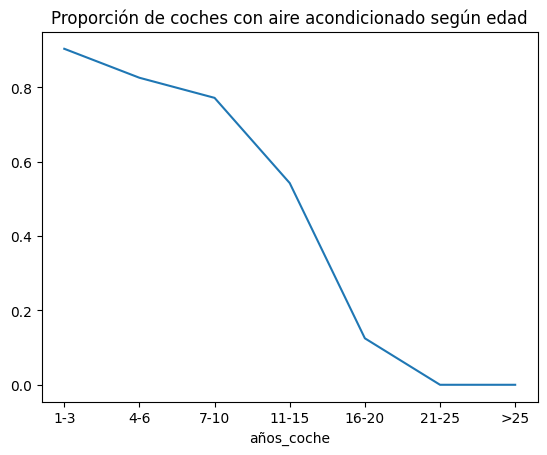

In [124]:
proporcion_por_edad = df_bmw.groupby('años_coche')['aire_acondicionado'].mean()
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con aire acondicionado según edad')
plt.ylabel('')
plt.show()

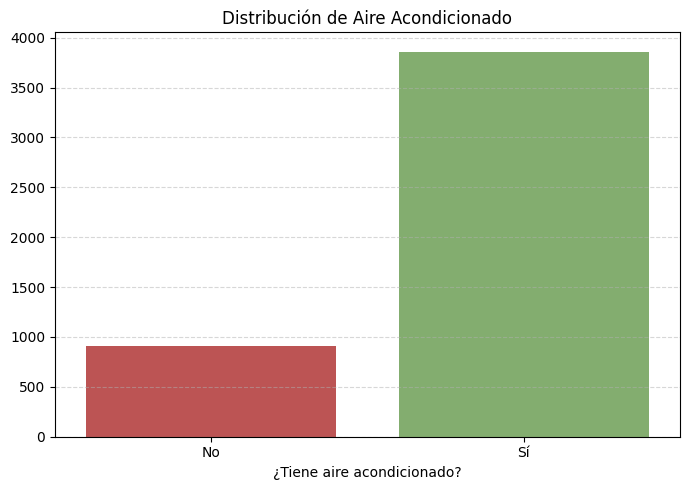

In [125]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='aire_acondicionado', data=df_bmw, palette=['#CD4343', '#7FB765'])
plt.title('Distribución de Aire Acondicionado')

# Títulos y etiquetas
plt.xlabel('¿Tiene aire acondicionado?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### **CAMARA TRASERA**

<p align="center" style="font-size:16px;">
  <b>Presente:</b> <span style="color:#7FB765;">965 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>No presente:</b> <span style="color:#CD4343;">3.823 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">20.1% con cámara trasera</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>camara_trasera</b> indica si el vehículo está equipado con cámara trasera para facilitar el estacionamiento y mejorar la seguridad.<br><br>
En el conjunto de datos, solo un <b>20.1%</b> de los vehículos (965 de 4.788) disponen de esta tecnología, mientras que la mayoría, un <b>79.8%</b>, no la tienen.<br><br>
Esto puede estar relacionado con el rango de antigüedad y gama de los coches, ya que la cámara trasera es una característica que se ha ido popularizando en los últimos años y suele encontrarse en modelos más modernos o de gama más alta, es por eso que en el gráico vemos cómo ha ido creciendo la proporción de coches con camara trasera durante los años.<br><br>
</p>


In [126]:
# Comprobamos el tipo de dato
print(df_bmw['camara_trasera'].dtype)

bool


In [127]:
# Estadísticas descriptivas para camara_trasera
df_bmw['camara_trasera'].describe()

count      4769
unique        2
top       False
freq       3814
Name: camara_trasera, dtype: object

In [128]:
distribuciones['camara_trasera']

camara_trasera
False    0.800251
True     0.199749
Name: proportion, dtype: float64

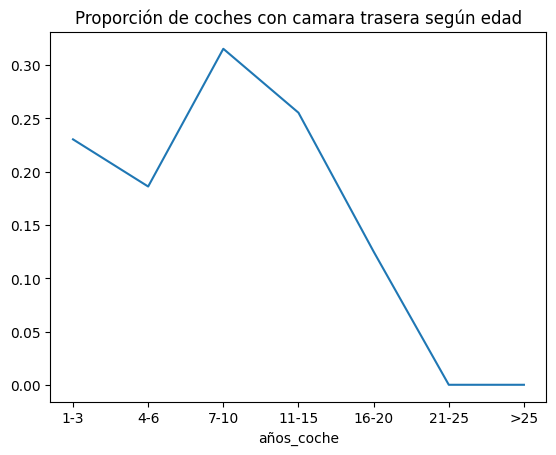

In [129]:
proporcion_por_edad = df_bmw.groupby('años_coche')['camara_trasera'].mean()
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con camara trasera según edad')
plt.ylabel('')
plt.show()

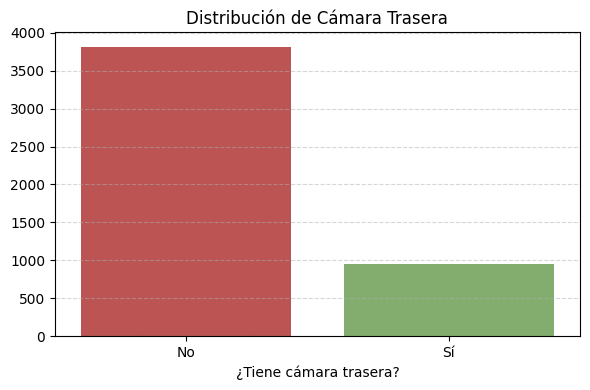

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(x='camara_trasera', data=df_bmw, palette=['#CD4343', '#7FB765'])
plt.title('Distribución de Cámara Trasera')
plt.xlabel('¿Tiene cámara trasera?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### **ELEVALUNAS ELECTRICO**

<p align="center" style="font-size:16px;">
  <b>Con elevalunas eléctrico:</b> <span style="color:#7FB765;">2.213 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Sin elevalunas eléctrico:</b> <span style="color:#CD4343;">2.575 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">46.2% con elevalunas eléctrico</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>elevalunas_electrico</b> indica si el vehículo cuenta con elevalunas eléctricos, una característica común en vehículos modernos que aporta comodidad y funcionalidad.<br><br>
En la muestra de datos, aproximadamente el <b>46.1%</b> de los vehículos disponen de esta característica, mientras que un 53.8% no la tienen.<br><br>
Este equilibrio puede reflejar la diversidad del parque de vehículos en cuanto a antigüedad y equipamiento, desde modelos más básicos hasta otros más completos, es por eso cómo vemos que los coches de más de 10 años se reduce notablemente la proporción de coches con elevalunas electrico hasta llegar a los coches de hace más de 20 años que no disponen de este equipamiento. <br><br>
</p>

In [131]:
# Comprobamos el tipo de dato
print(df_bmw['elevalunas_electrico'].dtype)

bool


In [132]:
# Estadísticas descriptivas para elevalunas_electrico
df_bmw['elevalunas_electrico'].describe()

count      4769
unique        2
top       False
freq       2566
Name: elevalunas_electrico, dtype: object

In [133]:
distribuciones['elevalunas_electrico']

elevalunas_electrico
False    0.539218
True     0.460782
Name: proportion, dtype: float64

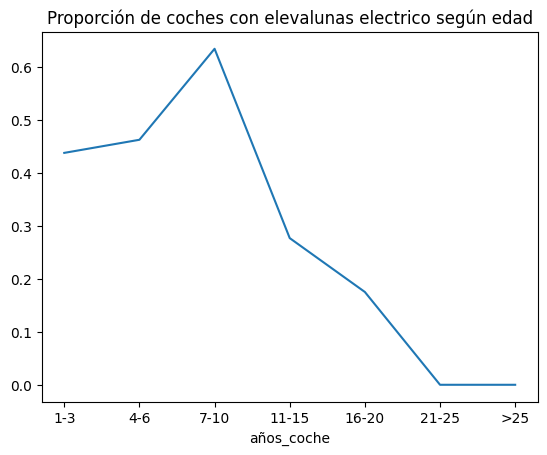

In [134]:
proporcion_por_edad = df_bmw.groupby('años_coche')['elevalunas_electrico'].mean()
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con elevalunas electrico según edad')
plt.ylabel('')
plt.show()

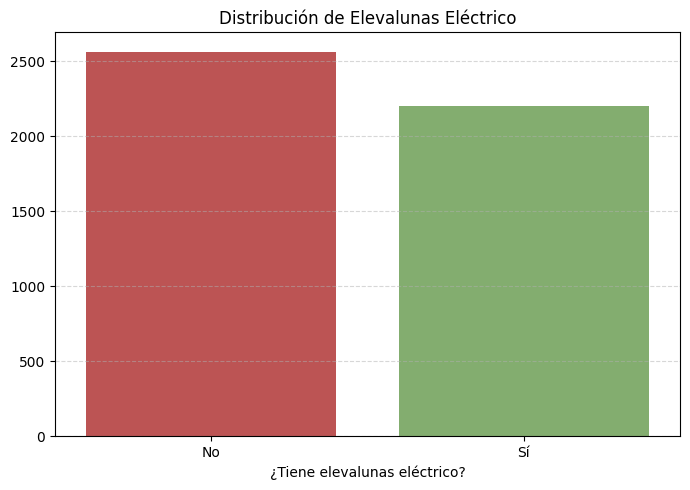

In [135]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='elevalunas_electrico', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Elevalunas Eléctrico')
plt.xlabel('¿Tiene elevalunas eléctrico?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### **BLUETOOTH**

<p align="center" style="font-size:16px;">
  <b>Con Bluetooth:</b> <span style="color:#7FB765;">1,040 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Sin Bluetooth:</b> <span style="color:#CD4343;">3,748 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">21.6% con Bluetooth</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>bluetooth</b> indica si el vehículo está equipado con conectividad Bluetooth, una característica cada vez más habitual para facilitar la conexión inalámbrica con dispositivos móviles.<br><br>
En el conjunto de datos, aproximadamente un 21.6% de los vehículos disponen de Bluetooth, mientras que la mayoría, un 78.3%, no cuentan con esta funcionalidad.<br><br>
Este porcentaje relfeja la baja proporción de coches con bluetooth en las ventas registradas, como vemos en el gráfico ha ido aumentando con los coches más modernos, y los coches de más de 20 años vemos cómo este equipamiento no estaba disponible.<br><br>
</p>


In [136]:
# Comprobamos el tipo de dato
print(df_bmw['bluetooth'].dtype)

bool


In [137]:
# Estadísticas descriptivas para bluetooth
df_bmw['bluetooth'].describe()

count      4769
unique        2
top       False
freq       3735
Name: bluetooth, dtype: object

In [138]:
distribuciones['bluetooth']

bluetooth
False    0.783727
True     0.216273
Name: proportion, dtype: float64

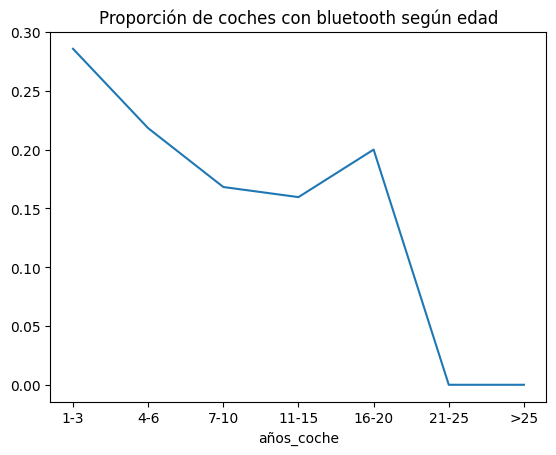

In [139]:
proporcion_por_edad = df_bmw.groupby('años_coche')['bluetooth'].mean()
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con bluetooth según edad')
plt.ylabel('')
plt.show()

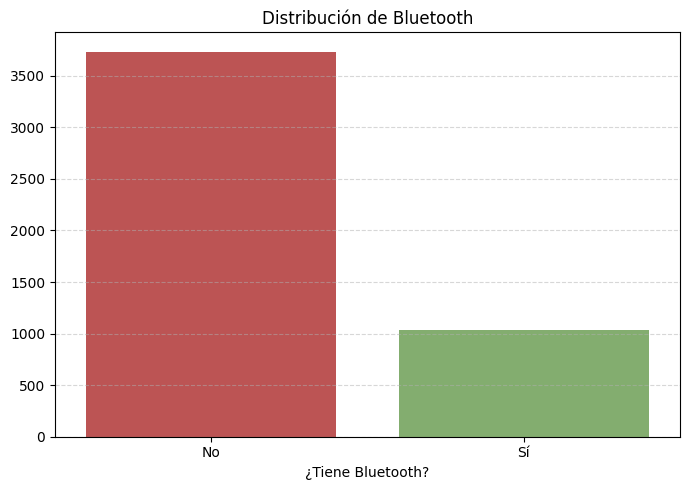

In [140]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='bluetooth', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Bluetooth')
plt.xlabel('¿Tiene Bluetooth?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### **ALERTA LIMITE DE VELOCIDAD**

<p align="center" style="font-size:16px;">
  <b>Con alerta activada:</b> <span style="color:#7FB765;">2,578 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Sin alerta:</b> <span style="color:#CD4343;">2,210 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">53.8% con alerta</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>alerta_lim_velocidad</b> indica si el vehículo cuenta con un sistema que avisa al conductor cuando se supera el límite de velocidad.<br><br>
En el dataset, un 53.8% de los vehículos están equipados con esta función, lo que refleja la creciente importancia de la seguridad vial y las tecnologías asistidas en los coches modernos.<br><br>
El 46.1% restante no dispone de esta alerta, lo que puede corresponder a vehículos más antiguos o modelos con menos equipamiento tecnológico, vemos como la proporcion de coches con este equipamiento ha ido aumentando en los coches más modernos..<br><br>
</p>


In [141]:
# Comprobamos el tipo de dato
print(df_bmw['alerta_lim_velocidad'].dtype)

bool


In [142]:
# Estadísticas descriptivas para alerta_lim_velocidad
df_bmw['alerta_lim_velocidad'].describe()

count     4769
unique       2
top       True
freq      2564
Name: alerta_lim_velocidad, dtype: object

In [143]:
distribuciones['alerta_lim_velocidad']

alerta_lim_velocidad
True     0.537963
False    0.462037
Name: proportion, dtype: float64

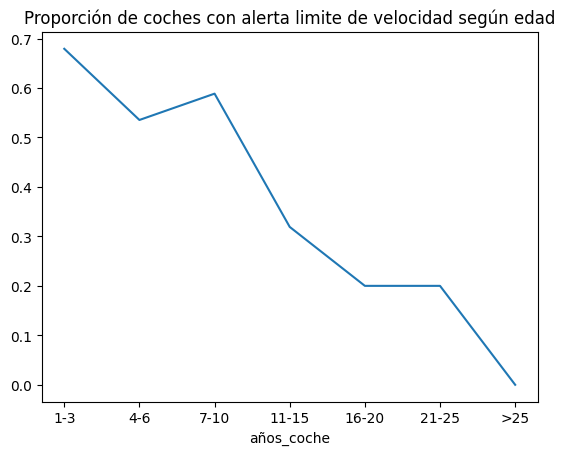

In [144]:
proporcion_por_edad = df_bmw.groupby('años_coche')['alerta_lim_velocidad'].mean()
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con alerta limite de velocidad según edad')
plt.ylabel('')
plt.show()

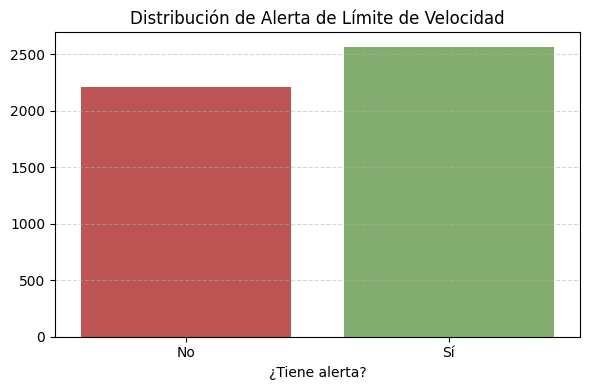

In [145]:
# Crear figura
plt.figure(figsize=(6,4))

# Gráfico de barras
sns.countplot(x='alerta_lim_velocidad', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Alerta de Límite de Velocidad')
plt.xlabel('¿Tiene alerta?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### **COLOR ESTANDAR**

<p align="center" style="font-size:16px;">
  <b>Color estándar:</b> <span style="color:#7FB765;">4,087 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Color no estándar:</b> <span style="color:#CD4343;">701 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">85.3% con colores comunes</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>color_estandar</b> clasifica los vehículos según si su color pertenece a una gama de colores comunes: <b>negro, gris, azul o blanco</b></span>.<br><br>
En este conjunto de datos, el 85.3% de los coches presentan uno de estos colores estándar, lo que sugiere una clara preferencia de los compradores por tonalidades neutras y tradicionales. El 14.6% restante utiliza colores menos frecuentes (como rojo, marrón, plateado, naranja, etc.), lo que puede indicar modelos más personalizados. <br><br>
Observamos que el color más usado es el color negro, tanto en los coches deportivos (+250 CV), como en el total de coches.
</p>


In [146]:
# Comprobamos el tipo de dato
print(df_bmw['color_estandar'].dtype)

float64


In [147]:
# Vemos la distribución original de la columna 'color'
bmw['color'].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [148]:
# Vemos la cantidad de valores en la columna 'color_estandar'
df_bmw['color_estandar'].value_counts()

color_estandar
1.0    4071
0.0     698
Name: count, dtype: int64

In [149]:
# Transformamos la columna 'color_estandar' a tipo boolean
df_bmw['color_estandar'] = df_bmw['color_estandar'].astype(bool)

# Comprobamos el tipo de dato
print(df_bmw['color_estandar'].dtype)

bool


In [150]:
# Estadísticas descriptivas para color_estandar
df_bmw['color_estandar'].describe()

count     4769
unique       2
top       True
freq      4071
Name: color_estandar, dtype: object

In [151]:
distribuciones['color_estandar']

color_estandar
1.0    0.853796
0.0    0.146204
Name: proportion, dtype: float64

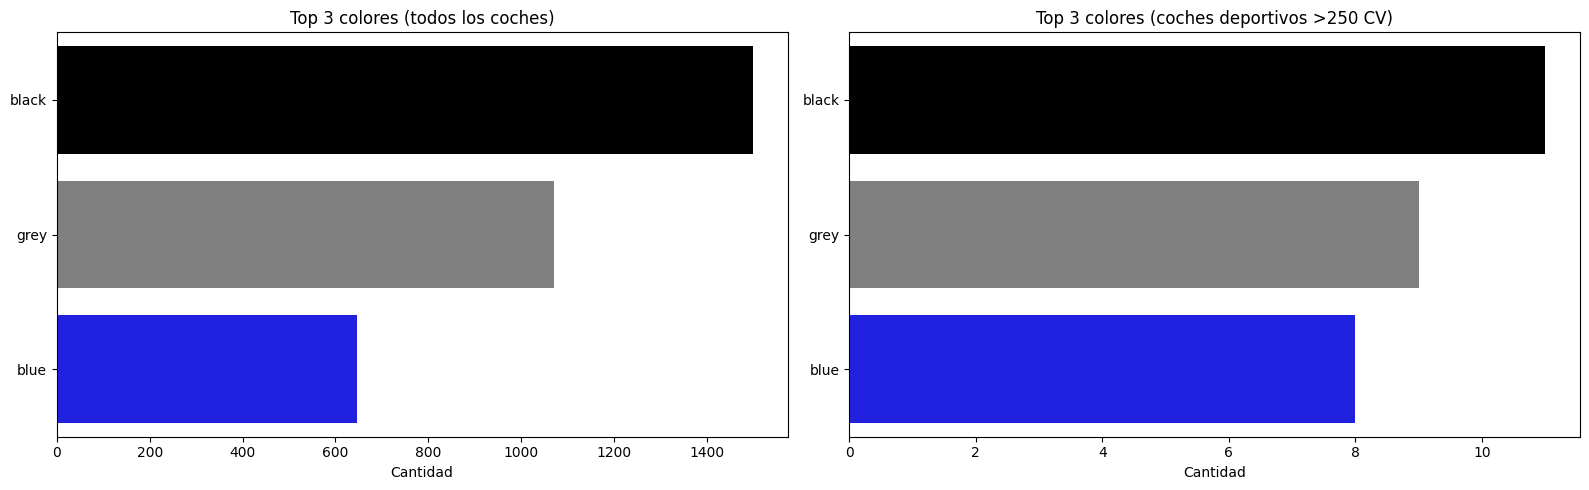

In [152]:
# Seleccionamos los 3 colores más comunes en cada grupo
colores_totales = bmw['color'].value_counts(ascending=False).head(3)
colores_deportivos = bmw[bmw['potencia'] > 250]['color'].value_counts(ascending=False).head(3)

# Creamos las paletas personalizadas a partir de los nombres de color
paleta_totales = colores_totales.index.tolist()
paleta_deportivos = colores_deportivos.index.tolist()

# --- Gráficos lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Todos los coches
sns.barplot(
    x=colores_totales.values,
    y=colores_totales.index,
    ax=axes[0],
    palette=paleta_totales 
)
axes[0].set_title('Top 3 colores (todos los coches)')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('')

# Gráfico 2: Coches deportivos
sns.barplot(
    x=colores_deportivos.values,
    y=colores_deportivos.index,
    ax=axes[1],
    palette=paleta_deportivos
)
axes[1].set_title('Top 3 colores (coches deportivos >250 CV)')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

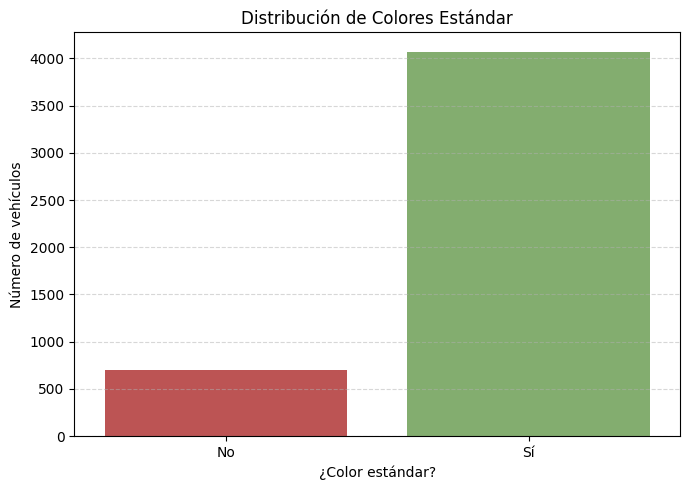

In [153]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='color_estandar', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Colores Estándar')
plt.xlabel('¿Color estándar?')
plt.ylabel('Número de vehículos')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **VARIABLES CATEGORICAS**

##### **MODELO**

<p align="center" style="font-size:16px;">
  <b>Total de modelos:</b> <span style="color:#7FB765;">76 únicos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Modelo más frecuente:</b> <span style="color:#3A86FF;">320</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Frecuencia:</b> <span style="color:#f4a261;">739 vehículos</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>modelo</b> es de tipo categórico y representa la versión específica de cada vehículo (por ejemplo, <i>320d, X5 xDrive30d, M3 Competition</i>). El dataset contiene <b>76 modelos distintos</b>, siendo el más habitual el <b>320</b> con un total de <b>739 unidades</b>.<br><br>
Este dato refleja la popularidad del modelo <b>BMW Serie 3 (320)</b>, seguido por otros modelos de gama media como los <i>118, X1</i> o <i>520</i>.<br><br>
La variedad de modelos permite analizar diferencias de precio, como vemos en el gráfico vemos que los modelos más caros son <i>i8</i>, <i>M4</i> y <i>X6 M</i>.
</p>


In [154]:
df_bmw['modelo'].describe()

count     4769
unique      76
top        320
freq       739
Name: modelo, dtype: object

In [155]:
# Vemos la distribución de la columna 'modelo'
df_bmw['modelo'].value_counts()

modelo
320                739
520                627
318                558
X3                 433
116                354
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [156]:
distribuciones['modelo']

modelo
320                0.154988
520                0.131144
318                0.117130
X3                 0.090776
116                0.074252
                     ...   
M135               0.000209
225                0.000209
i8                 0.000209
630                0.000209
214 Gran Tourer    0.000209
Name: proportion, Length: 76, dtype: float64

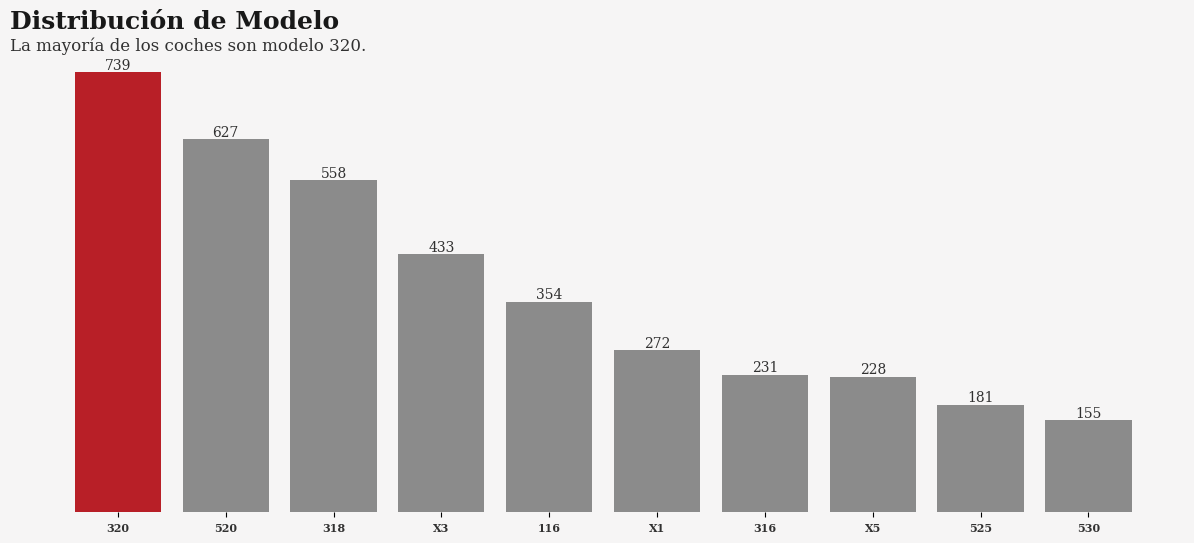

In [157]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Seleccionar los 10 modelos más comunes
a = df_bmw['modelo'].value_counts().head(10)

colors = ['#b20710'] + ['grey']*(len(a)-1)
ax.bar(x=a.index, height=a.values, color=colors, alpha=0.9)

# Añadir texto con el valor encima de cada barra
for i, v in enumerate(a.values):
    ax.text(i, v + 5, str(v), ha='center', fontdict={'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha=0.8)

ax.text(-1, max(a.values) + max(a.values)*0.1, 'Distribución de Modelo', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 18, 'weight':'bold'}, alpha=0.9)
ax.text(-1, max(a.values) + max(a.values)*0.05, 'La mayoría de los coches son modelo 320.', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 12}, alpha=0.8)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

ax.set_xticklabels(a.index, fontdict={'font': 'serif', 'color': 'black', 'fontsize': 8, 'weight':'bold'}, alpha=0.8)
ax.axes.get_yaxis().set_visible(False)

plt.show()

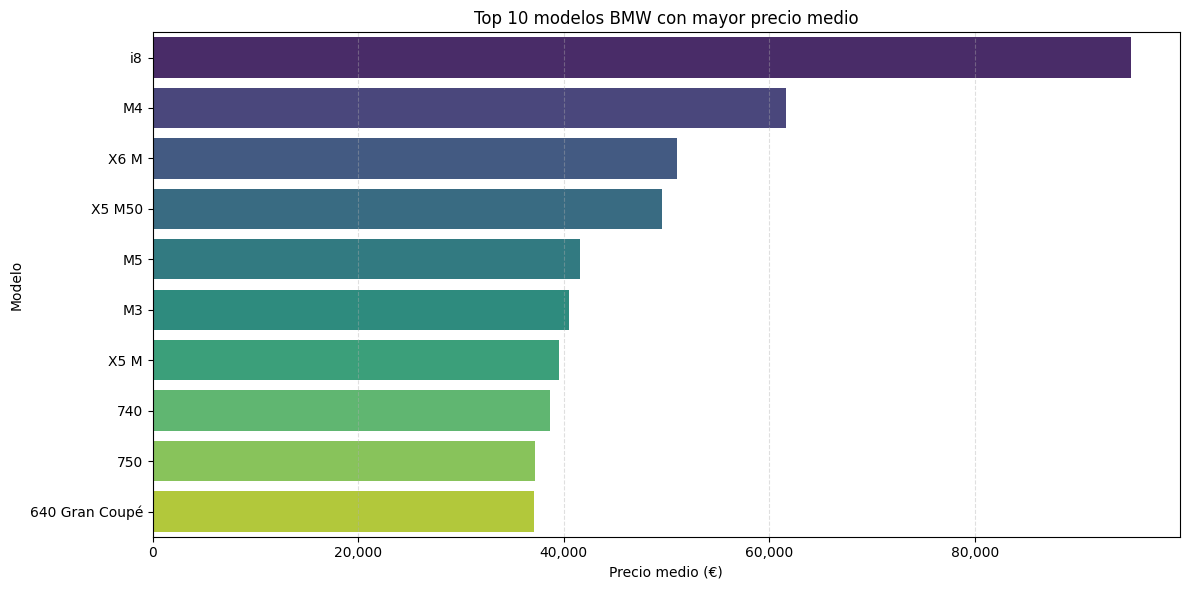

In [158]:
# Agrupar por modelo y calcular el precio medio
top_modelos = df_bmw.groupby('modelo')['precio'].mean().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_modelos.values, y=top_modelos.index, palette='viridis')
plt.xlabel('Precio medio (€)')
plt.ylabel('Modelo')
plt.title('Top 10 modelos BMW con mayor precio medio')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Formatear eje X con separadores de miles
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

##### **TIPO COCHE**

<p align="center" style="font-size:16px;">
  <b>Total de categorías:</b> <span style="color:#7FB765;">8 tipos</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Más frecuente:</b> <span style="color:#3A86FF;">Estate</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Frecuencia:</b> <span style="color:#f4a261;">1720 vehículos</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>tipo_coche</b> clasifica los vehículos según su carrocería. Se identifican <b>8 categorías</b> diferentes, siendo la más común el formato <b>Estate (tipo familiar)</b> con <b>1.732 vehículos</b>, es decir, aproximadamente un <b>36%</b> del total.<br><br>

</p> 

In [159]:
df_bmw['tipo_coche'].describe()

count       4769
unique         8
top       estate
freq        1714
Name: tipo_coche, dtype: object

In [160]:
# Vemos la distribución de la columna 'tipo_coche'
df_bmw['tipo_coche'].value_counts()

tipo_coche
estate         1714
suv            1045
sedan          1022
hatchback       727
coupe           102
subcompact       80
convertible      40
van              39
Name: count, dtype: int64

In [161]:
distribuciones['tipo_coche']

tipo_coche
estate         0.359339
suv            0.218992
sedan          0.214181
hatchback      0.152897
coupe          0.021334
subcompact     0.016733
convertible    0.008366
van            0.008157
Name: proportion, dtype: float64

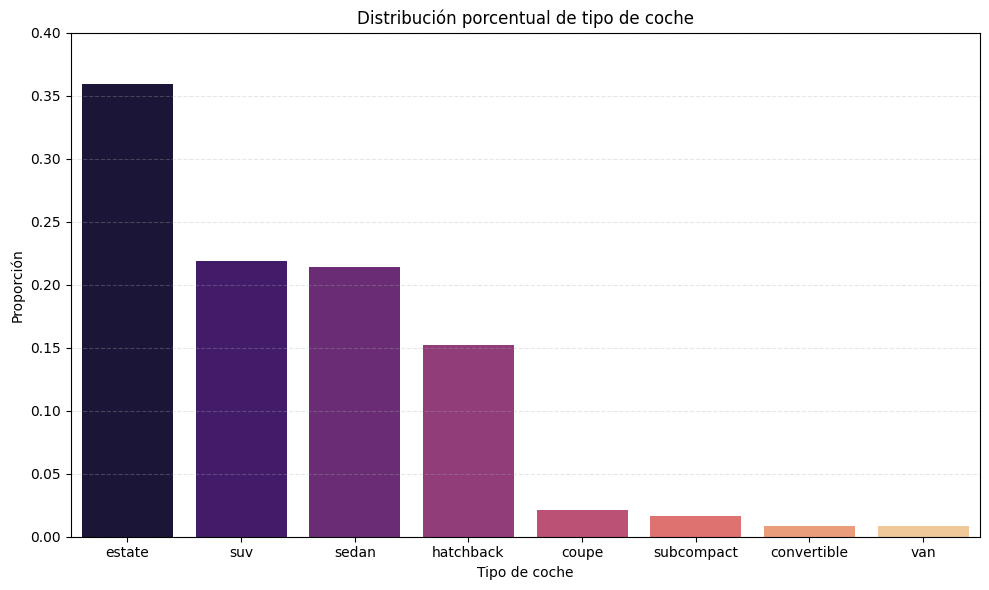

In [162]:
# Visualización
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_bmw['tipo_coche'].value_counts(normalize=True).index,
    y=df_bmw['tipo_coche'].value_counts(normalize=True).values,
    palette='magma'
)
plt.title('Distribución porcentual de tipo de coche')
plt.ylabel('Proporción')
plt.xlabel('Tipo de coche')
plt.ylim(0, 0.4)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

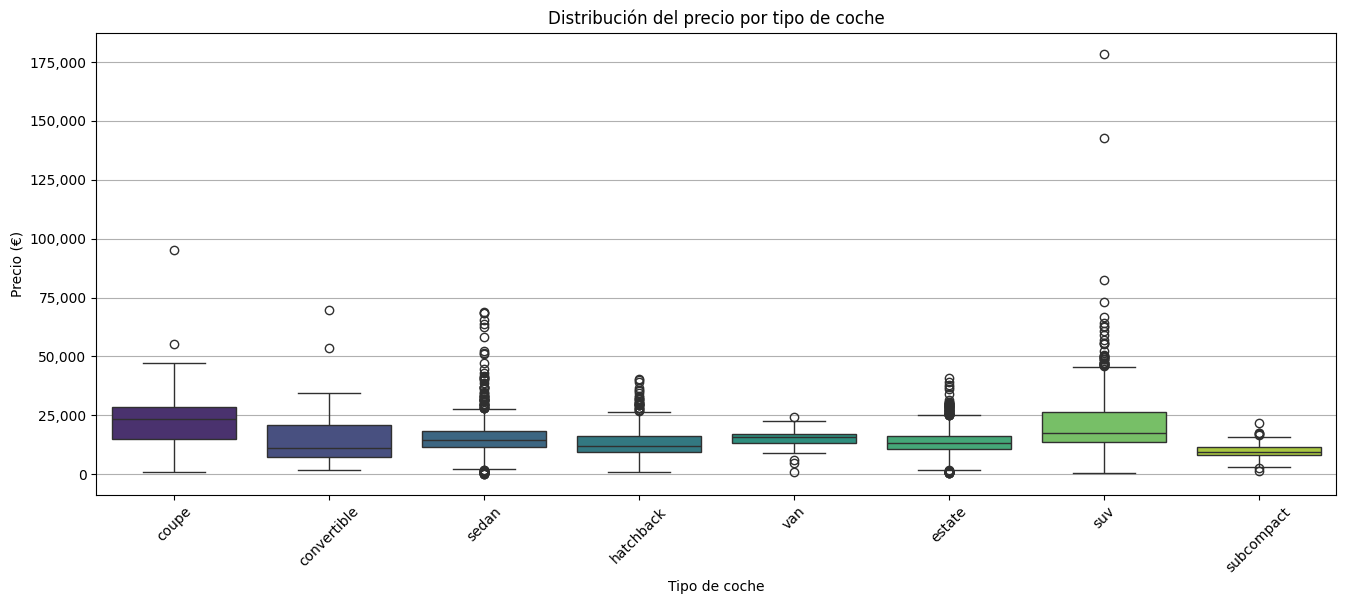

In [163]:
plt.figure(figsize=(16,6))

# Boxplot por tipo de coche
sns.boxplot(data=df_bmw, x='tipo_coche', y='precio', palette='viridis')
plt.title('Distribución del precio por tipo de coche')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()

##### **AÑOS DEL COCHE**

<p align="center" style="font-size:16px;">
  <b>Total de categorías:</b> <span style="color:#7FB765;">7 rangos</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Más frecuente:</b> <span style="color:#3A86FF;">4-6 años</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Frecuencia:</b> <span style="color:#f4a261;">3868 vehículos</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>años_coche</b> agrupa los vehículos según su antigüedad, permitiendo analizar patrones de uso y desgaste. El rango más común es <b>de 4 a 6 años</b>, que concentra la mayoría de los vehículos del conjunto de datos, con un total de <b>3.868 coches</b>, lo que representa aproximadamente un <b>80.8%</b> del total. <br><br>
Los vehículos más nuevos (1-3 años) representan un <b>7.25%</b>, mientras que los más antiguos (mayores de 10 años) son casos mucho más escasos, destacando la categoría <b>>25 años</b> con tan solo <b>1 unidad</b> registrada.
</p>

In [164]:
df_bmw['años_coche'].describe()

count     4769
unique       7
top        4-6
freq      3859
Name: años_coche, dtype: object

In [165]:
# Vemos la distribución de la columna 'tipo_coche'
df_bmw['años_coche'].value_counts()

años_coche
4-6      3859
1-3       343
7-10      333
11-15     188
16-20      40
21-25       5
>25         1
Name: count, dtype: int64

In [166]:

distribuciones['años_coche']

años_coche
4-6      0.809245
1-3      0.071951
7-10     0.069651
11-15    0.039531
16-20    0.008366
21-25    0.001046
>25      0.000209
Name: proportion, dtype: float64

In [167]:
import plotly.graph_objects as go

# Datos de distribución
labels = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']
valores = [347, 3868, 336, 189, 40, 7, 1]

# Asegurar orden correcto
x_labels = labels
y_vals = valores

# Crear figura
fig = go.Figure()

# Línea de tendencia con marcadores
fig.add_trace(go.Scatter(
    x=x_labels,
    y=y_vals,
    mode='lines+markers',
    name='Distribución',
    line=dict(color='#3A86FF', width=3),
    marker=dict(symbol='circle', size=10, color='#3A86FF'),
    text=[f'{v:,}' for v in y_vals],
    textposition='top center'
))

# Layout
fig.update_layout(
    title="Distribución de la variable AÑOS_COCHE",
    xaxis_title="Rango de años del coche",
    yaxis_title="",
    template='plotly_white',
    width=1000,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

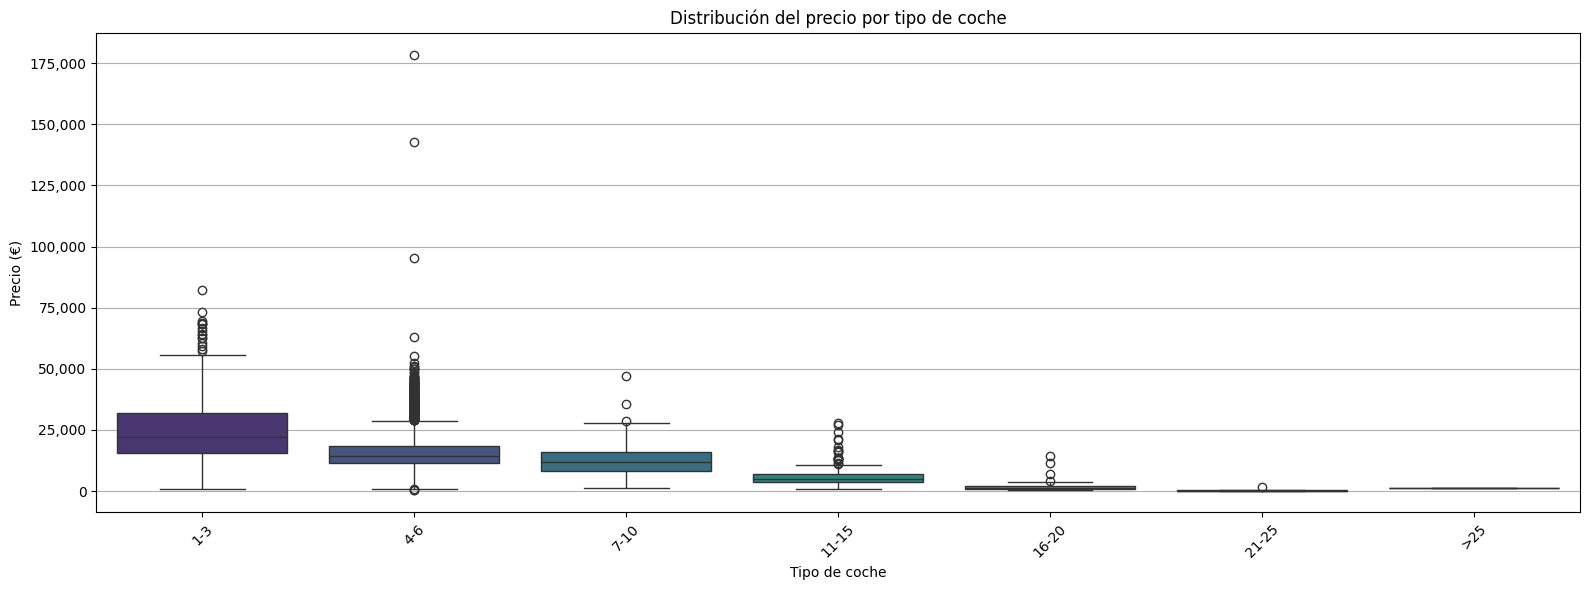

In [168]:
plt.figure(figsize=(16,6))

sns.boxplot(data=df_bmw, x='años_coche', y='precio', palette='viridis')
plt.title('Distribución del precio por tipo de coche')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### **5.2 - CORRELACIÓN INCIAL**

In [169]:
corr = df_bmw.corr(numeric_only=True)  
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,km_por_año,color_estandar
km,1.000000,-0.048182,0.066460,0.009296,0.006946,0.050050,-0.037702,-0.037212,-0.413049,0.042442,0.600110,0.002954
potencia,-0.048182,1.000000,0.326304,0.187198,0.311962,0.340969,0.224037,0.510772,0.643261,0.514594,0.027619,0.037125
volante_regulable,0.066460,0.326304,1.000000,0.284082,0.253406,0.279533,0.126853,0.239766,0.266473,0.633796,0.004010,-0.003834
aire_acondicionado,0.009296,0.187198,0.284082,1.000000,0.138567,0.261865,0.107405,0.216571,0.238369,0.531841,0.202020,0.004689
camara_trasera,0.006946,0.311962,0.253406,0.138567,1.000000,0.199526,0.133435,0.205514,0.250181,0.495291,-0.010055,0.021903
elevalunas_electrico,0.050050,0.340969,0.279533,0.261865,0.199526,1.000000,0.240217,0.340455,0.263424,0.665532,0.141624,0.054064
bluetooth,-0.037702,0.224037,0.126853,0.107405,0.133435,0.240217,1.000000,0.094999,0.195844,0.451022,0.008102,0.040796
alerta_lim_velocidad,-0.037212,0.510772,0.239766,0.216571,0.205514,0.340455,0.094999,1.000000,0.449557,0.547054,0.122385,0.025310
precio,-0.413049,0.643261,0.266473,0.238369,0.250181,0.263424,0.195844,0.449557,1.000000,0.449379,-0.081223,0.031087
cantidad_extras,0.042442,0.514594,0.633796,0.531841,0.495291,0.665532,0.451022,0.547054,0.449379,1.000000,0.131398,0.033346


#### Análisis de la matriz de correlación

- `Potencia` tiene correlación positiva con el precio (**0.64**). Esto nos indica que, los vehículos con mayor potencia tienden a tener precios más altos.
- `Cantidad_extras` también está correlacionada positivamente con el precio (**0.45**), lo que sugiere que los coches con más equipamiento suelen ser más caros.
- Otras variables como `alerta_lim_velocidad` (**0.45**), `elevalunas_electrico` (**0.26**), `volante_regulable` (**0.27**), `camara_trasera` (**0.25**) y `aire_acondicionado` (**0.24**) también tienen correlaciones moderadas con el precio, lo que refuerza la relación entre el equipamiento y el precio del vehículo.
- Por el contrario, los **kilómetros** (`km`) presentan una correlación negativa significativa con el precio (**-0.41**), lo que implica que los vehículos más usados tienden a ser más baratos.


#### Otras observaciones

- `Potencia` se relaciona de forma positiva con `cantidad_extras` (**0.51**), esto nos sugiere que los vehículos más potentes suelen estar mejor equipados.
- Existe una correlación significativa entre `km` y `km_por_año` (**0.60**), lo cual es evidente al estar una calculada con la otra.
- La variable `color_estandar` no presenta correlaciones destacables con ninguna otra variable, por lo que según lo que sospechabamos podría aportar muy baja utilidad al modelo.
- La variable `cantidad_extras` tiene alta correlación con las variables de equipamiento, lo cual es lógico al haber sido calculada con estas.

En una casuistica real, eliminariamos las columnas de `cantidad_extras`, `km_por_año` y estudiariamos si eliminar `color_estandar` realizando comprobaciones con el resultado del modelo. En este caso de ejercicio, dejaremos esta variables ya que nos parecen representativas.


### **5.3 VARIABLES VS TARGET (`PRECIO`)** 

In [170]:
def analizar_variable_vs_target(df):
    target = 'precio'
    plt.rcParams['figure.figsize'] = (10, 6)
    
    # Detectar variables numéricas (int y float) excluyendo el target
    variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if target in variables_numericas:
        variables_numericas.remove(target)
    
    # Detectar variables categóricas (objetos o categorías)
    variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Detectar variables booleanas
    variables_booleans = df.select_dtypes(include=['bool']).columns.tolist()
    
    print(f"Variables numéricas: {variables_numericas}")
    print(f"Variables categóricas: {variables_categoricas}")
    print(f"Variables booleanas: {variables_booleans}")
    
    # 1. Análisis Numérico vs Target
    for var in variables_numericas:
        plt.figure()
        sns.scatterplot(data=df, x=var, y=target, alpha=0.5)
        sns.regplot(data=df, x=var, y=target, scatter=False, color='red')
        plt.title(f'Relación entre {var} y {target}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.show()
    
    # 2. Análisis Categórico vs Target
    for var in variables_categoricas:
        plt.figure()
        sns.boxplot(data=df, x=var, y=target)
        plt.title(f'Precio según la categoría de {var}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.show()
        
    
    # 3. Análisis Boolean vs Target
    for var in variables_booleans:
        plt.figure()
        sns.boxplot(data=df, x=var, y=target)
        plt.title(f'Precio según presencia de {var}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.xticks([0,1], ['No', 'Sí'])
        plt.show()

Variables numéricas: ['km', 'potencia', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'cantidad_extras', 'km_por_año', 'color_estandar', 'modelo_serie_1', 'modelo_serie_2', 'modelo_serie_3', 'modelo_serie_5', 'modelo_serie_6', 'modelo_serie_7', 'modelo_X', 'modelo_M', 'modelo_Z', 'modelo_i', 'modelo_Gran_Coupe', 'modelo_Coupe', 'modelo_Active_Tourer', 'modelo_Gran_Tourer', 'modelo_Gran_Turismo', 'modelo_ActiveHybrid', 'años_coche_ordinal', 'tipo_coche_convertible', 'tipo_coche_coupe', 'tipo_coche_estate', 'tipo_coche_hatchback', 'tipo_coche_sedan', 'tipo_coche_subcompact', 'tipo_coche_suv', 'tipo_coche_van']
Variables categóricas: []
Variables booleanas: ['modelo_serie_4']


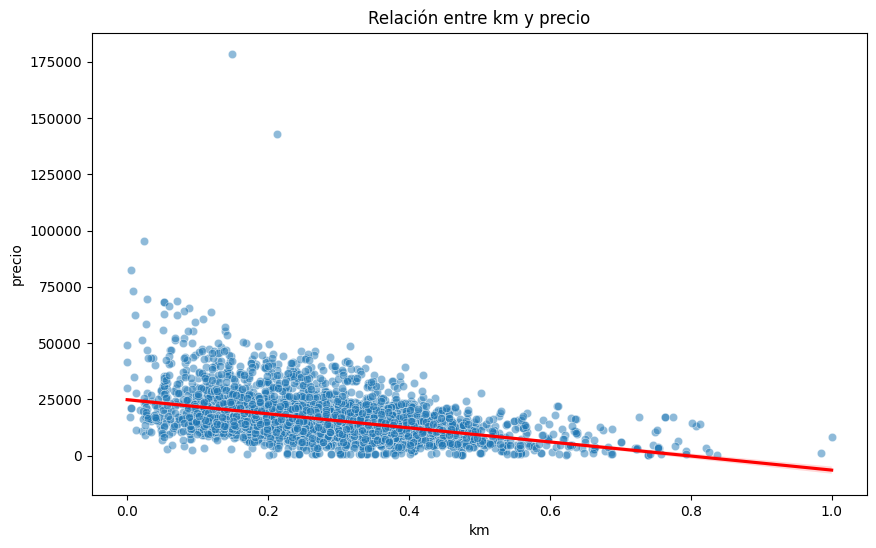

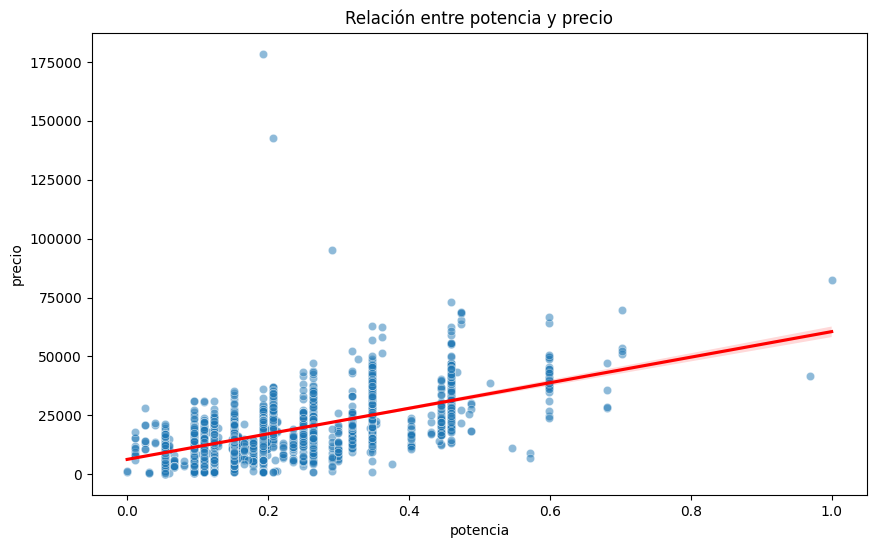

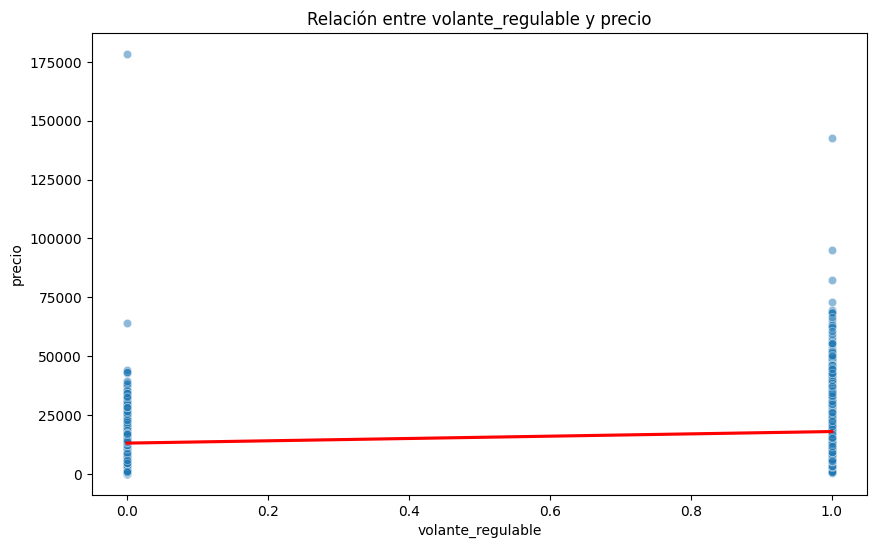

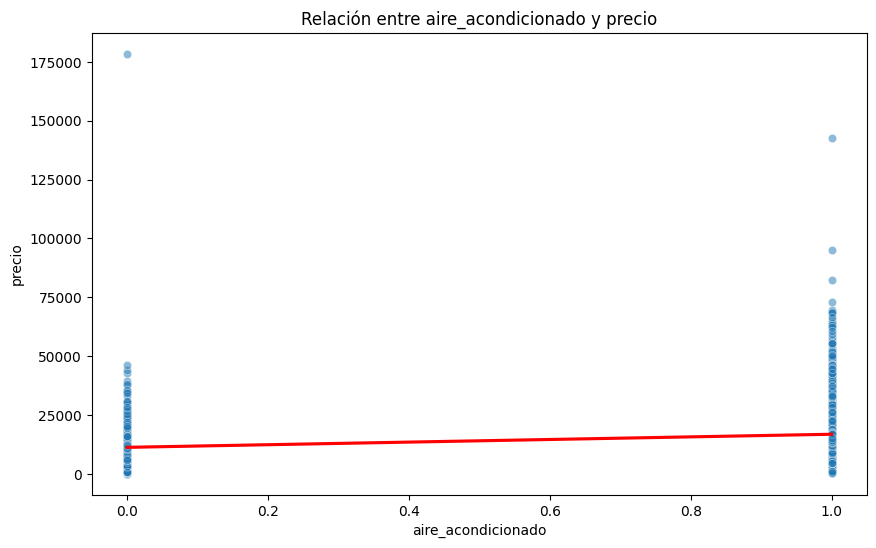

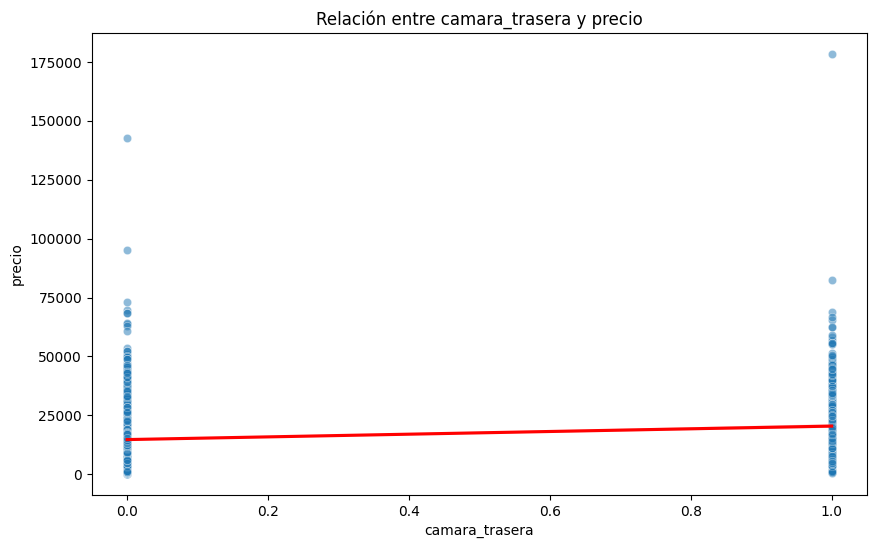

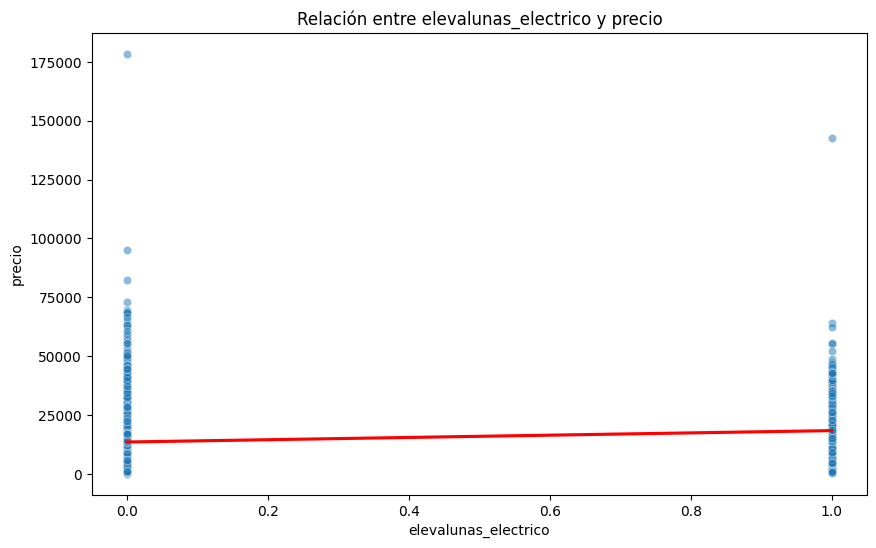

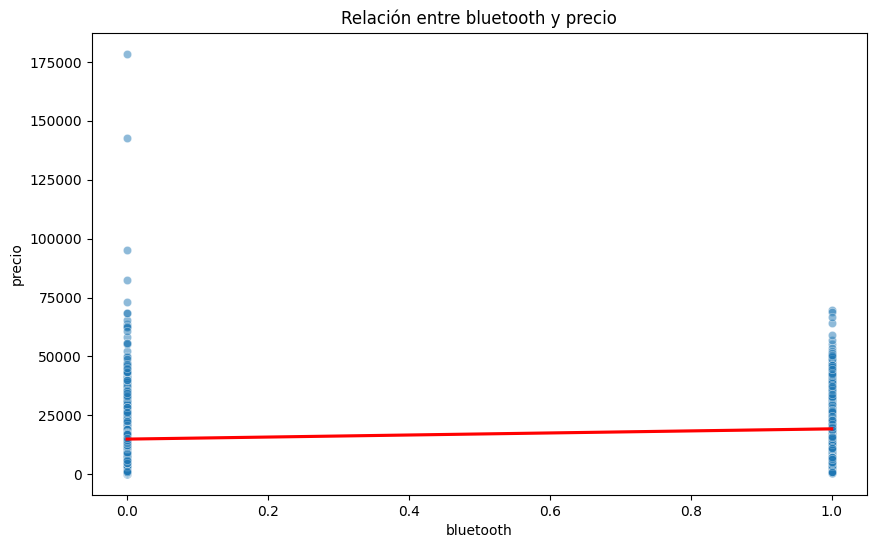

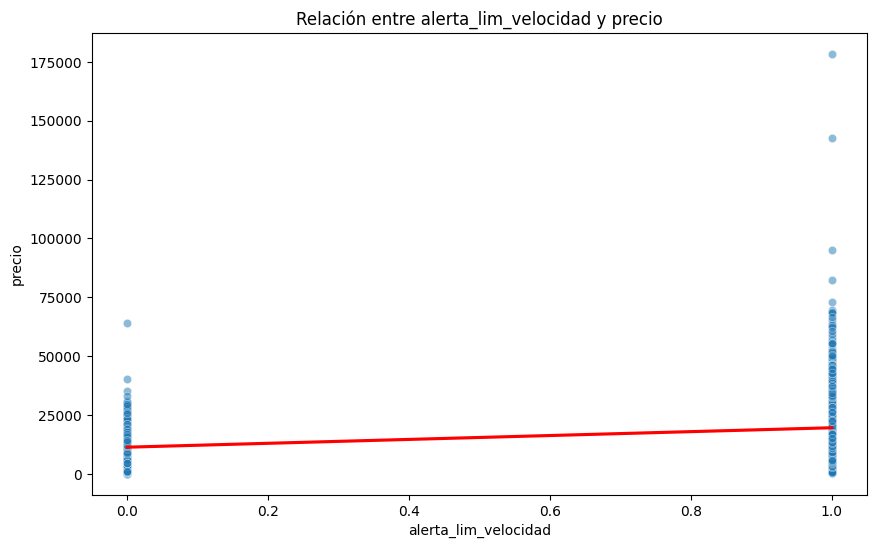

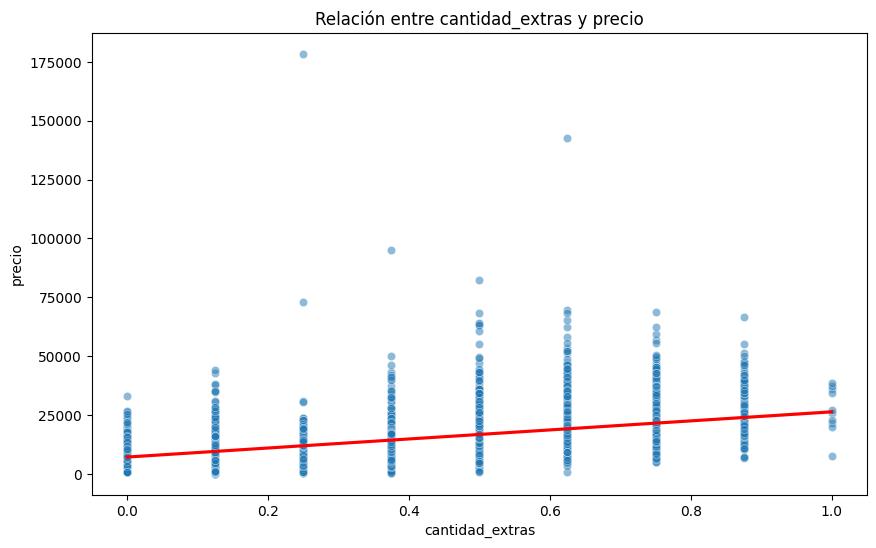

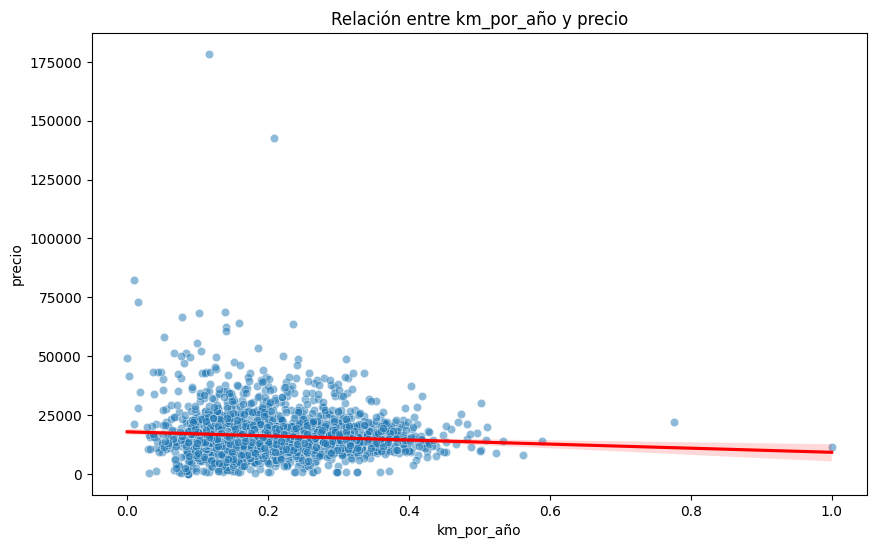

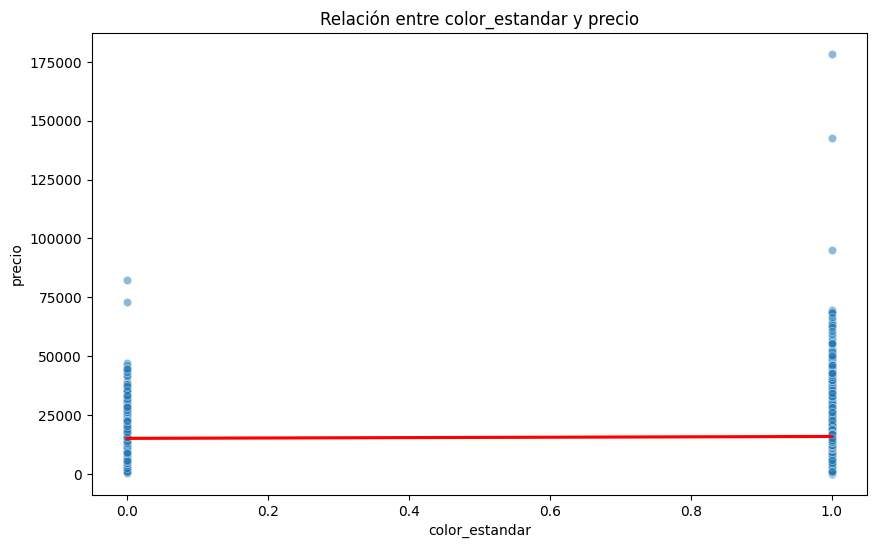

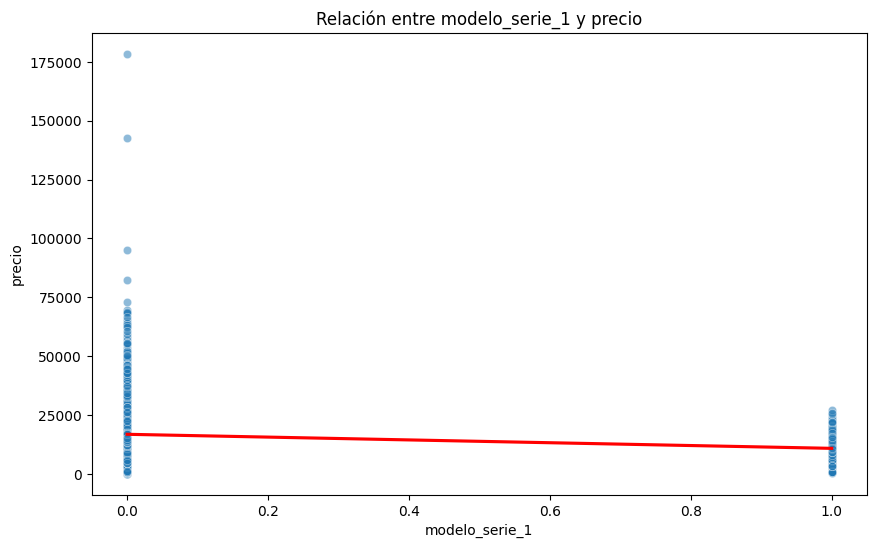

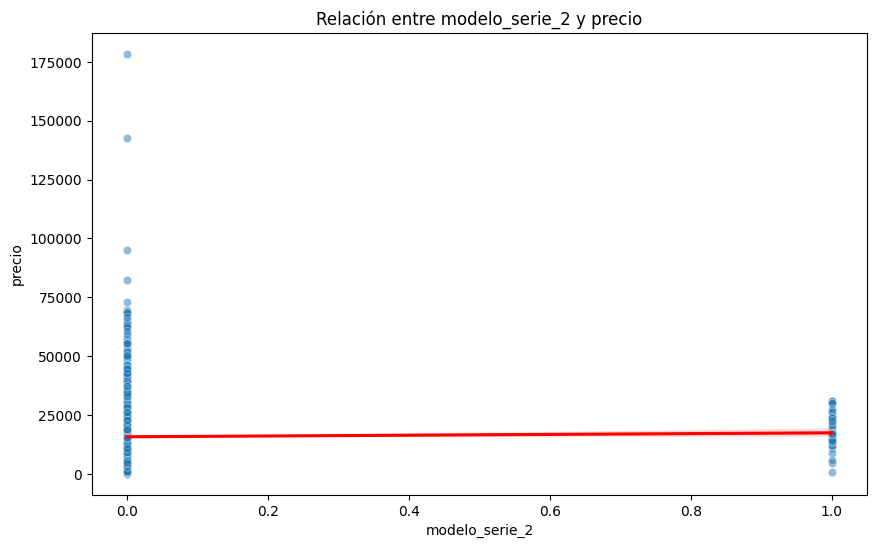

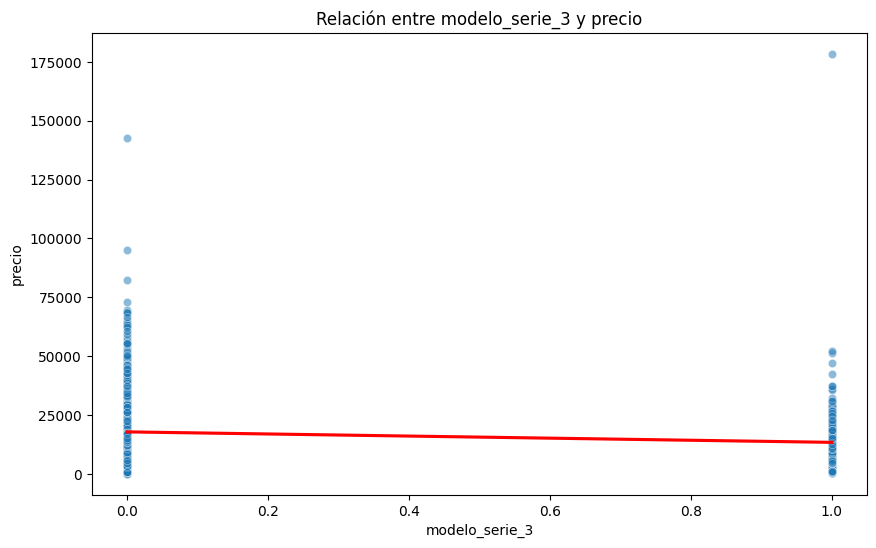

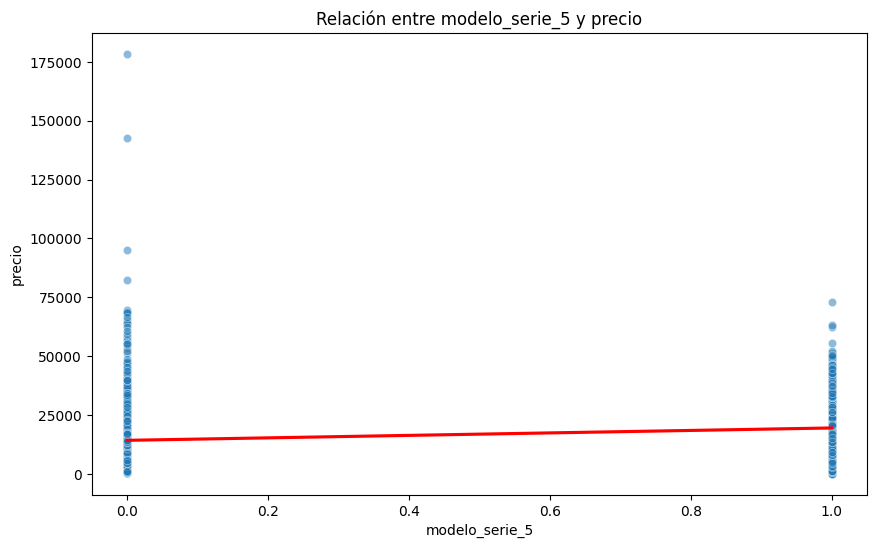

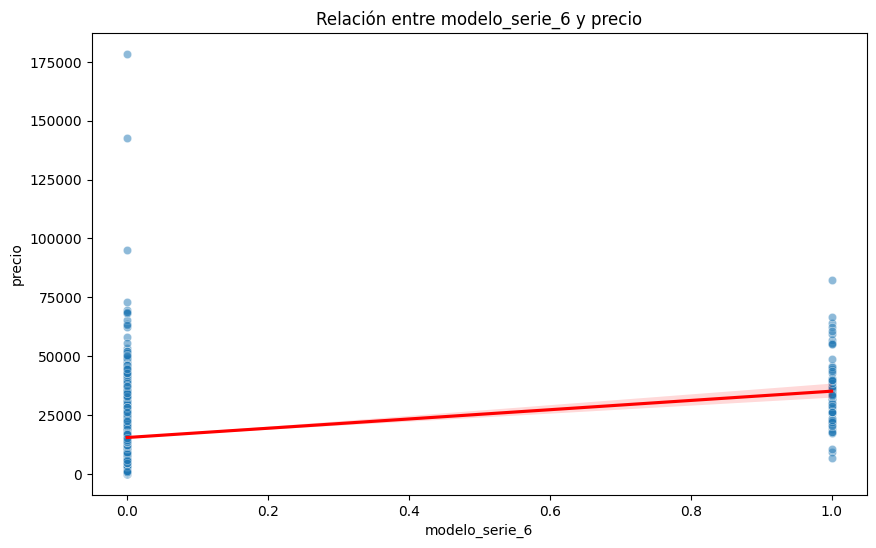

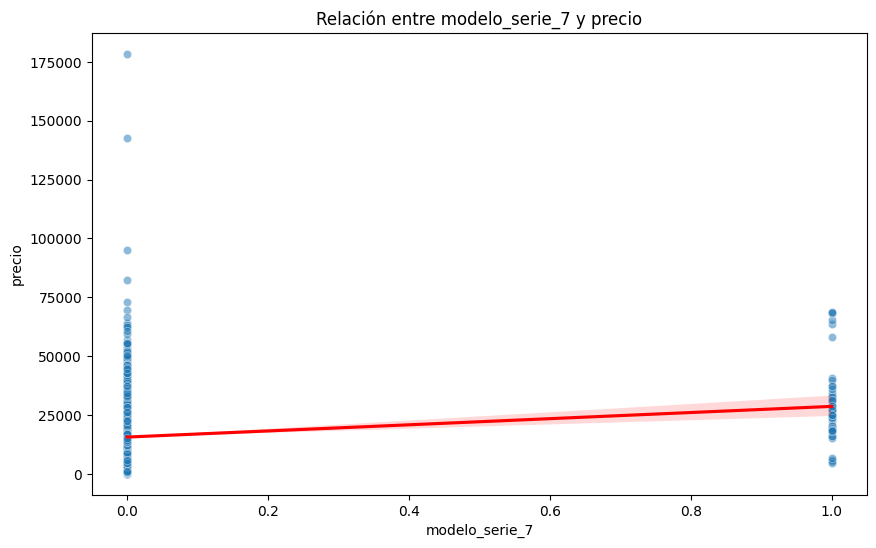

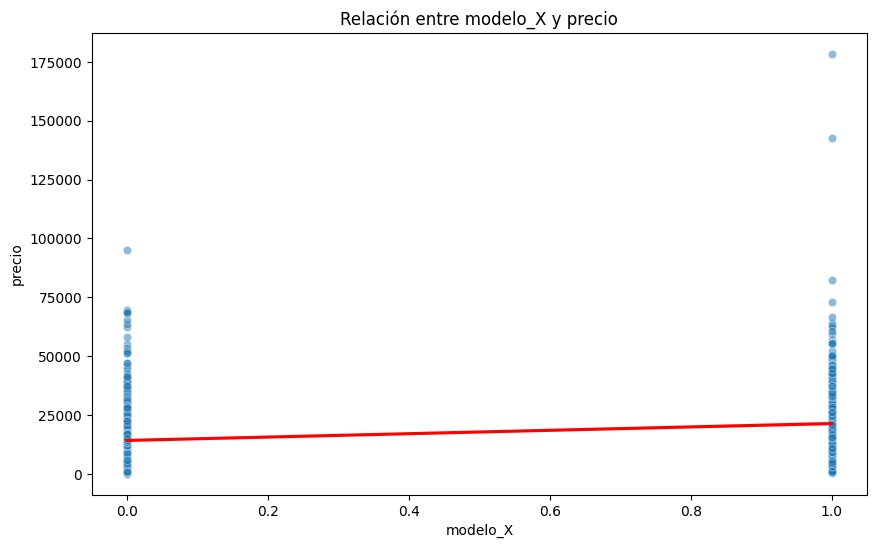

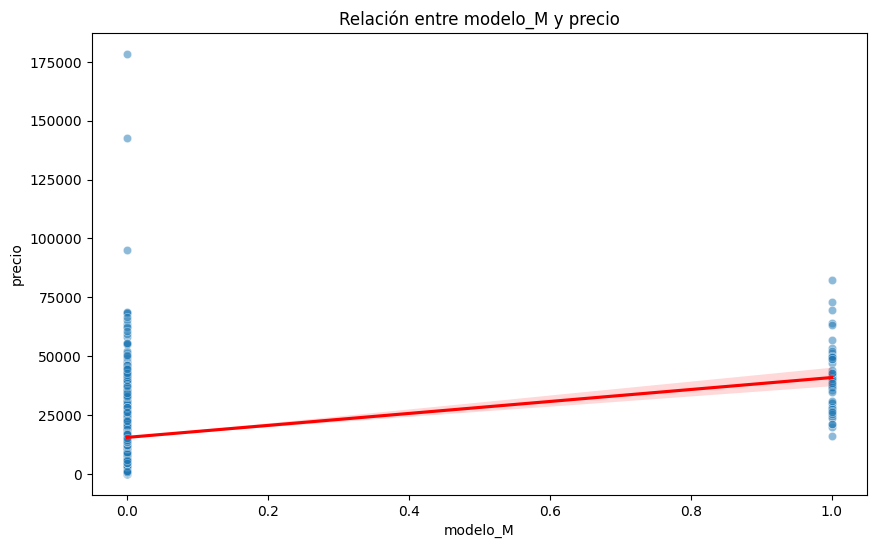

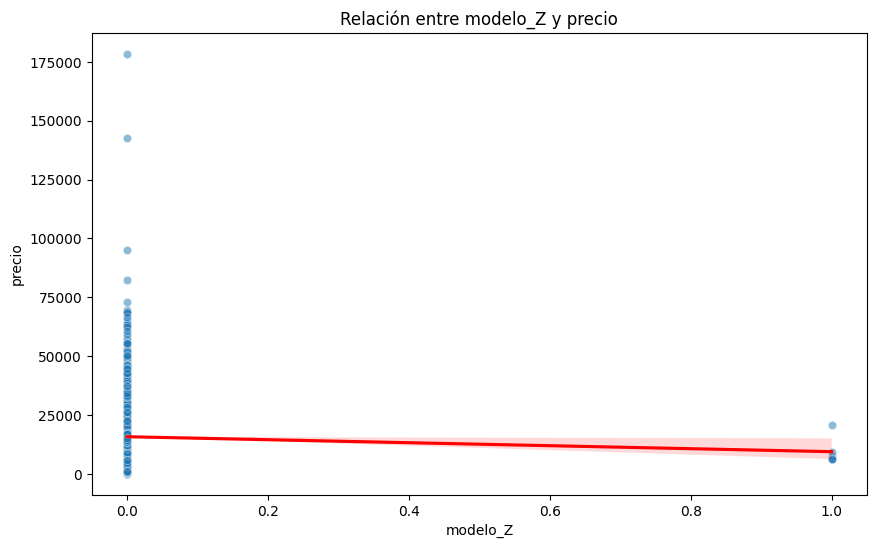

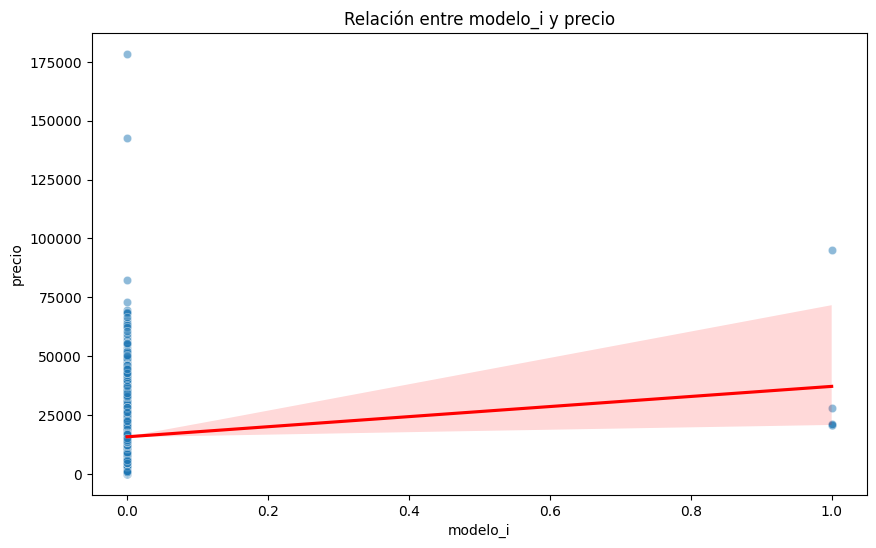

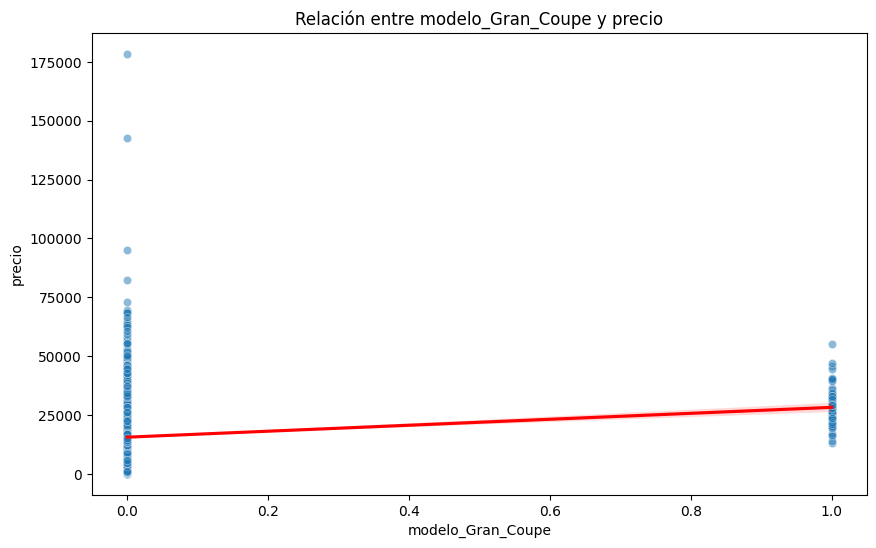

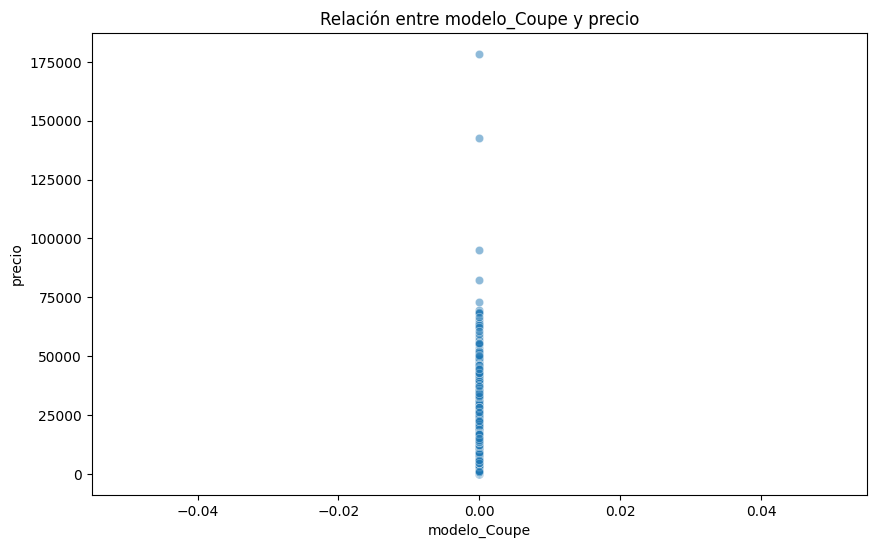

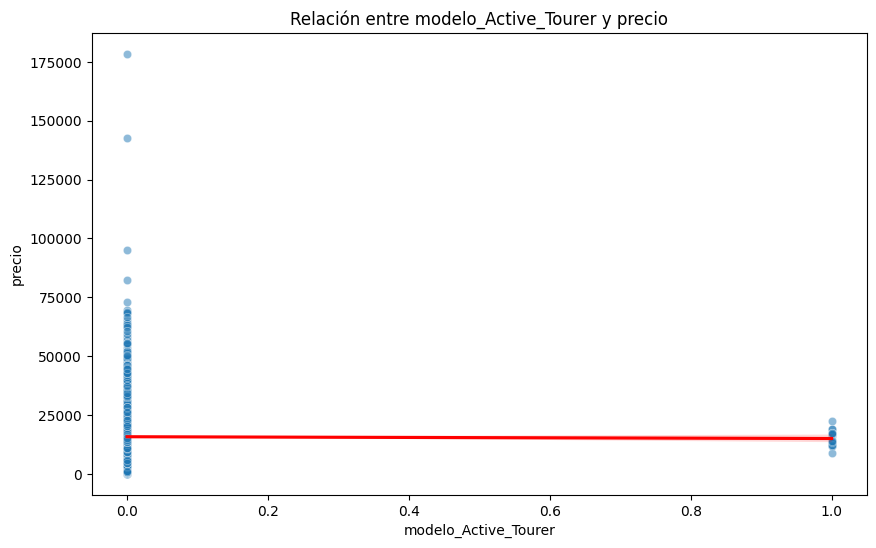

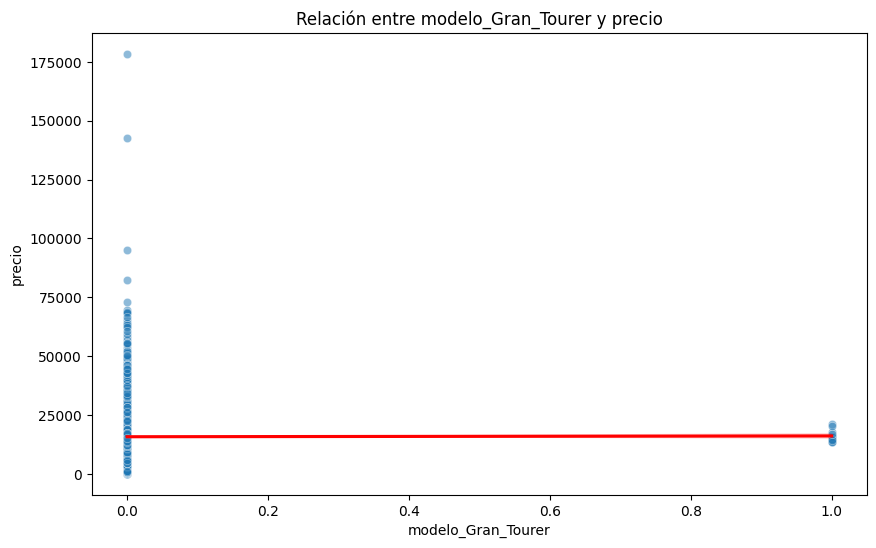

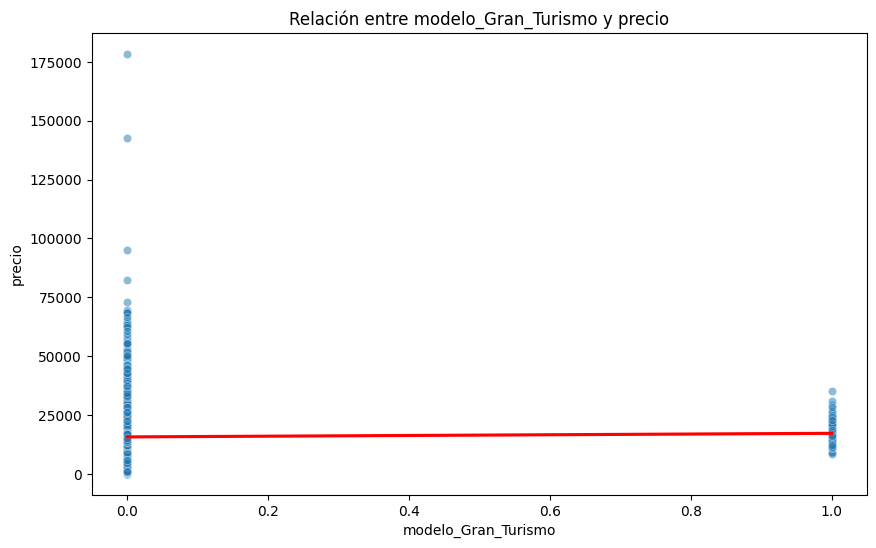

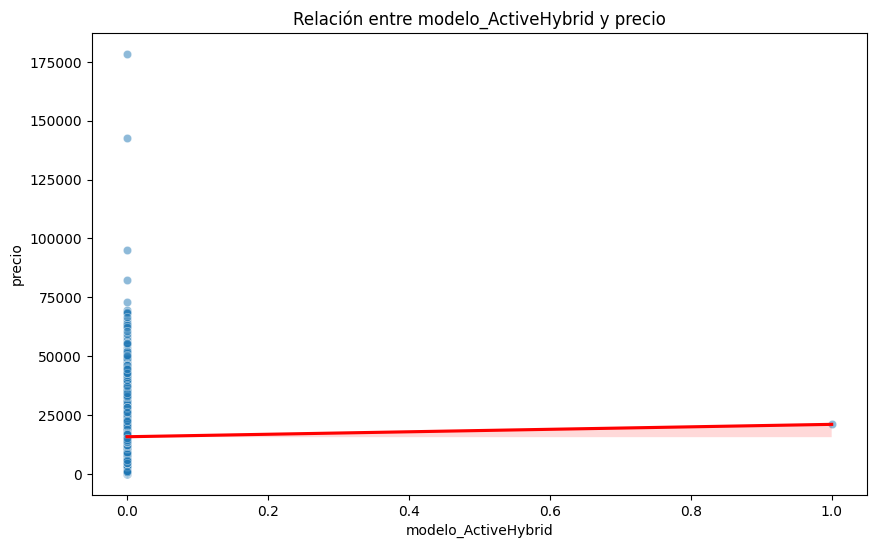

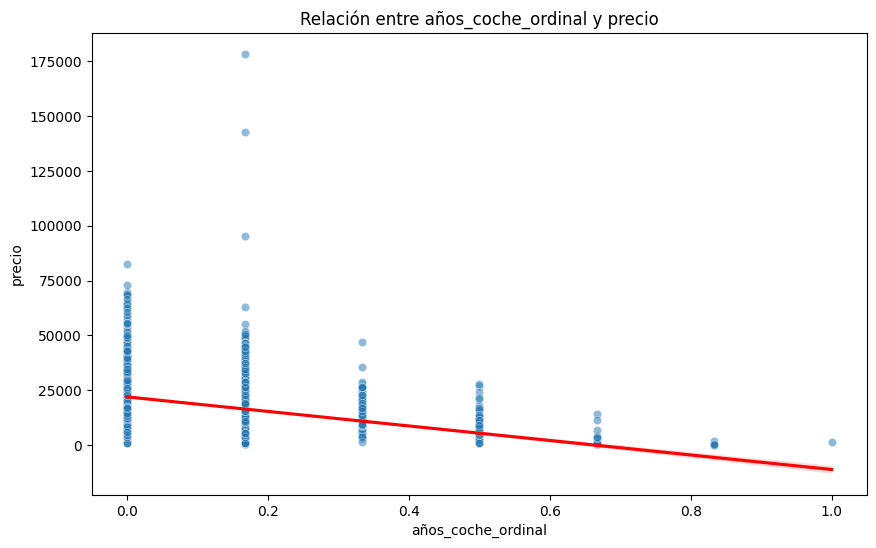

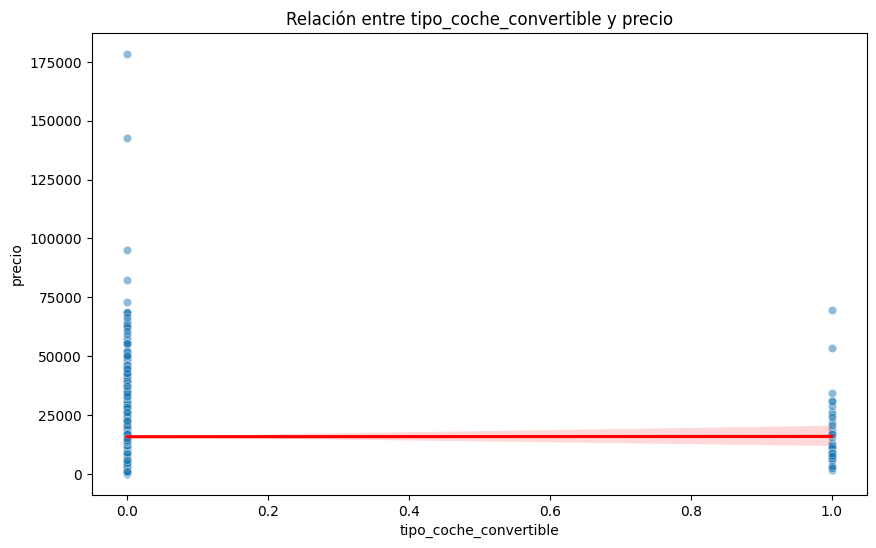

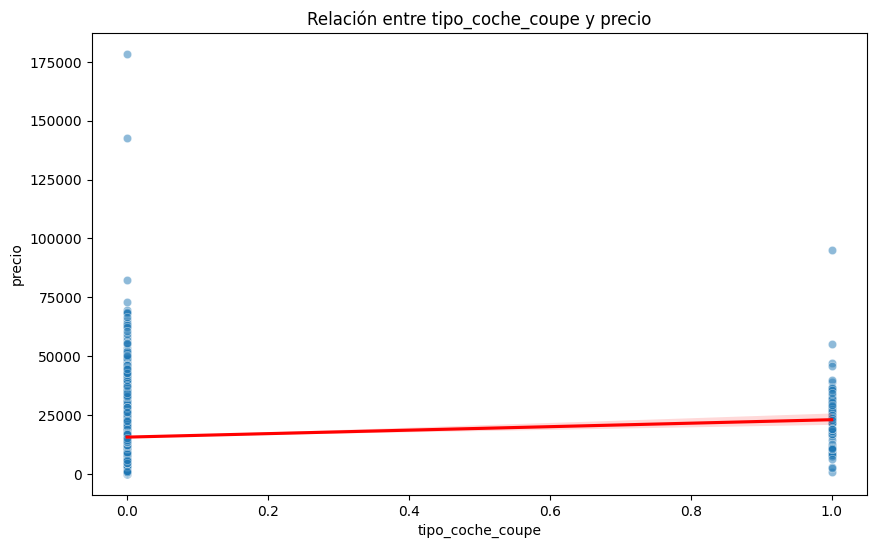

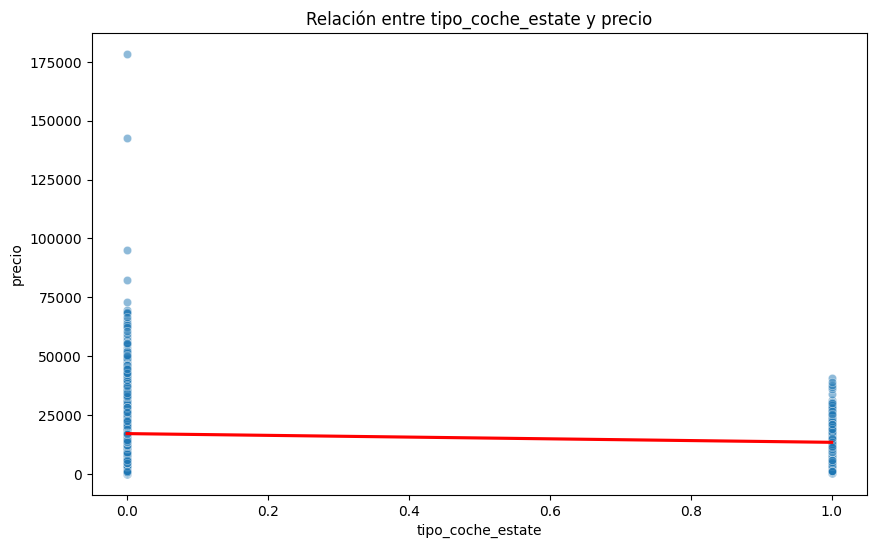

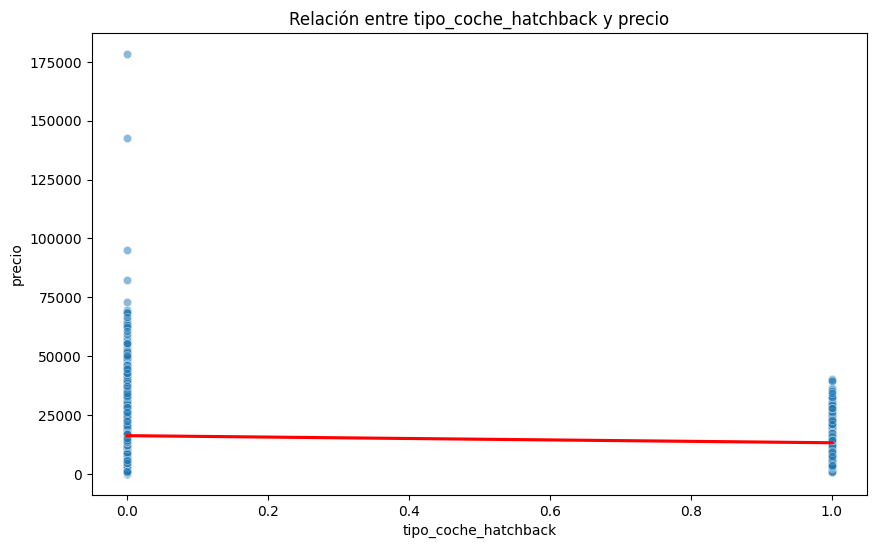

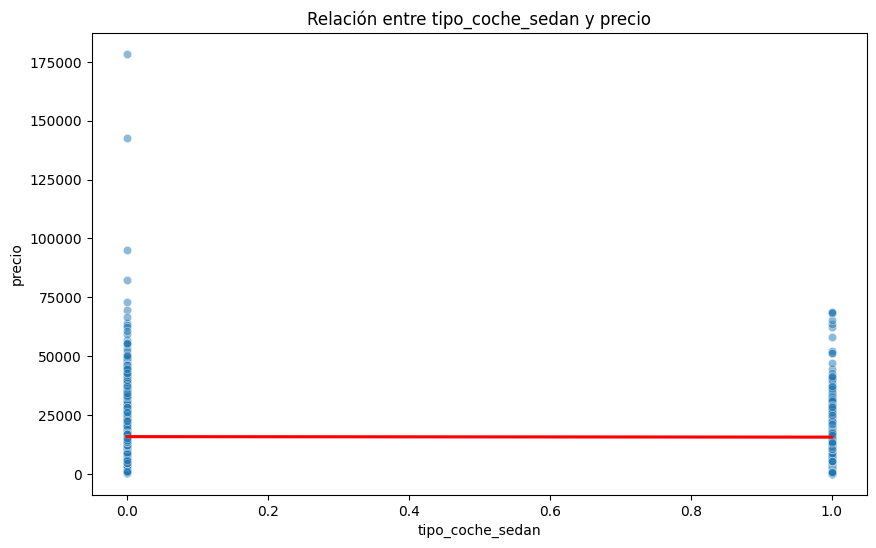

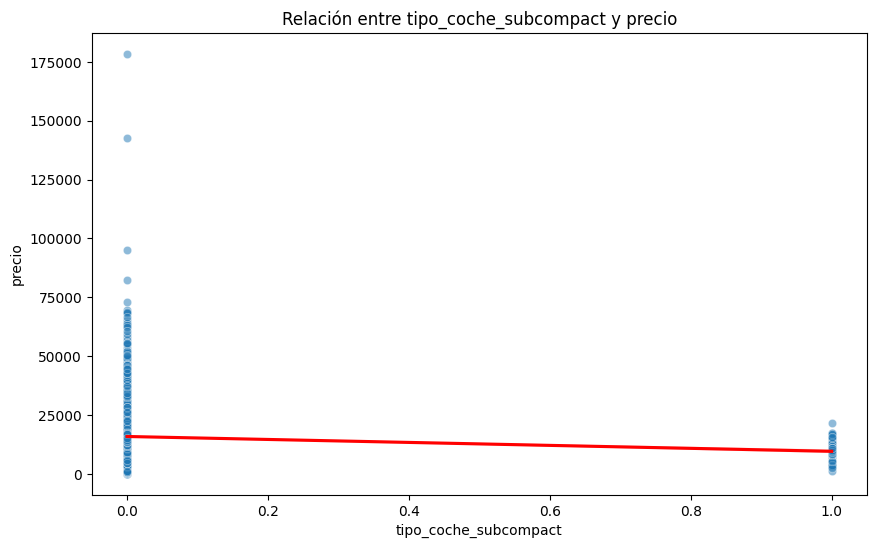

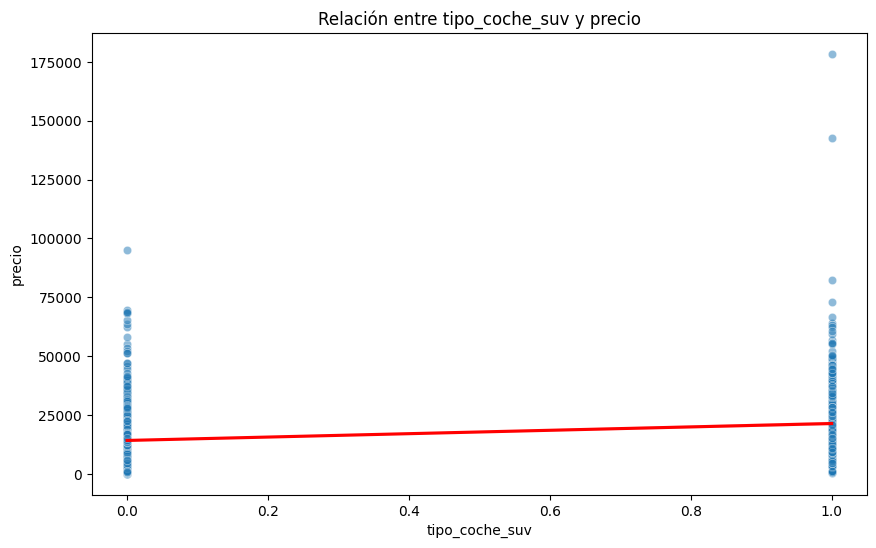

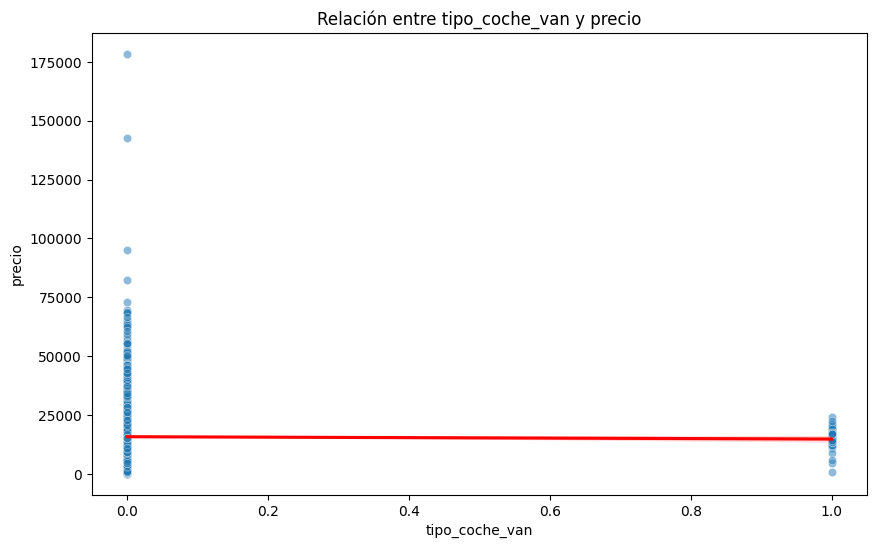

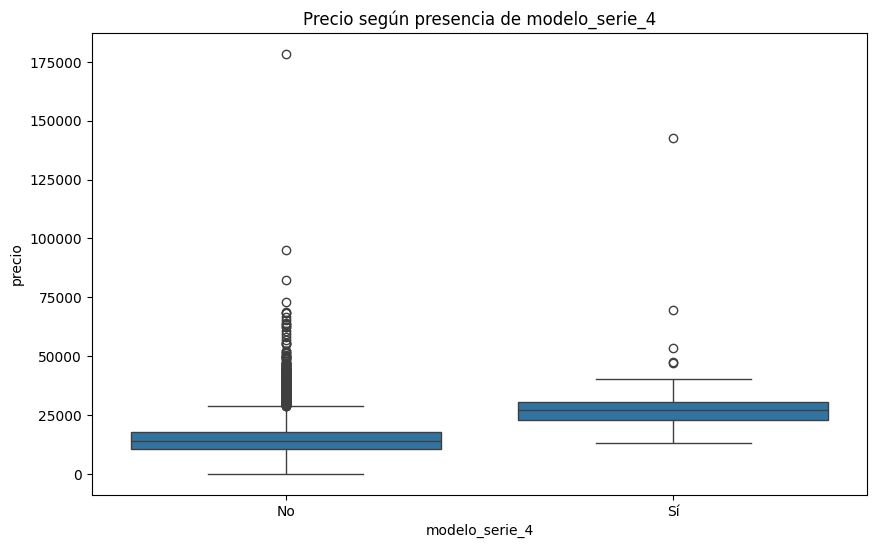

In [190]:
analizar_variable_vs_target(df_bmw)

## **06 - TRANSFORMACIÓN DE VARIABLES**

In [172]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 4780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4769 non-null   object  
 1   km                    4769 non-null   float64 
 2   potencia              4769 non-null   float64 
 3   tipo_coche            4769 non-null   object  
 4   volante_regulable     4769 non-null   bool    
 5   aire_acondicionado    4769 non-null   bool    
 6   camara_trasera        4769 non-null   bool    
 7   elevalunas_electrico  4769 non-null   bool    
 8   bluetooth             4769 non-null   bool    
 9   alerta_lim_velocidad  4769 non-null   bool    
 10  precio                4769 non-null   float64 
 11  años_coche            4769 non-null   category
 12  cantidad_extras       4769 non-null   int64   
 13  km_por_año            2399 non-null   float64 
 14  color_estandar        4769 non-null   bool    
dtypes: bool(7

In [173]:
target = 'precio'

In [174]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i","b")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

# Ejecutar la función para obtener las listas de variables
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw)


In [175]:
print("La variables numericas son: ", lista_numericas)
print("La variables booleanas son: ", lista_boolean)
print("La variables categoricas son: ", lista_categoricas)
print("La variable target es: ", target)

La variables numericas son:  ['km', 'potencia', 'cantidad_extras', 'km_por_año']
La variables booleanas son:  ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'color_estandar']
La variables categoricas son:  ['modelo', 'tipo_coche', 'años_coche']
La variable target es:  precio


In [176]:
# Convertimos todas las columnas de lista_boolen a tipo int
for col in lista_boolean:
    df_bmw[col] = df_bmw[col].astype(int)

# Comprobamos que se han convertido correctamente
print(df_bmw[lista_boolean].dtypes)

volante_regulable       int64
aire_acondicionado      int64
camara_trasera          int64
elevalunas_electrico    int64
bluetooth               int64
alerta_lim_velocidad    int64
color_estandar          int64
dtype: object


Vamos a dividir los modelos en serie, subseries o subcategorías, para facilitar el analisis

In [177]:
valores_unicos = sorted(df_bmw["modelo"].unique())
print(valores_unicos)

['114', '116', '118', '120', '123', '125', '135', '214 Gran Tourer', '216', '216 Active Tourer', '216 Gran Tourer', '218', '218 Active Tourer', '218 Gran Tourer', '220', '220 Active Tourer', '225', '225 Active Tourer', '316', '318', '318 Gran Turismo', '320', '320 Gran Turismo', '325', '325 Gran Turismo', '328', '330', '330 Gran Turismo', '335', '335 Gran Turismo', '418 Gran Coupé', '420', '420 Gran Coupé', '425', '430', '430 Gran Coupé', '435', '435 Gran Coupé', '518', '520', '520 Gran Turismo', '523', '525', '528', '530', '530 Gran Turismo', '535', '535 Gran Turismo', '630', '635', '640', '640 Gran Coupé', '650', '730', '735', '740', '750', 'Active Tourer', 'ActiveHybrid 5', 'M135', 'M235', 'M3', 'M4', 'M5', 'M550', 'X1', 'X3', 'X4', 'X5', 'X5 M', 'X5 M50', 'X6', 'X6 M', 'Z4', 'i3', 'i8']


In [178]:
# Patrones base por serie
df_bmw["modelo_serie_1"] = ((df_bmw["modelo"].str.contains(r'1\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]1'))).astype(int)
df_bmw["modelo_serie_2"] = ((df_bmw["modelo"].str.contains(r'2\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]2'))).astype(int)
df_bmw["modelo_serie_3"] = ((df_bmw["modelo"].str.contains(r'3\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]3'))).astype(int)
df_bmw["modelo_serie_4"] = ((df_bmw["modelo"].str.contains(r'4\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]4'))).astype(int) & ~df_bmw["modelo"].str.contains("Z")
df_bmw["modelo_serie_5"] = ((df_bmw["modelo"].str.contains(r'5\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]5'))).astype(int)
df_bmw["modelo_serie_6"] = ((df_bmw["modelo"].str.contains(r'6\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]6'))).astype(int)
df_bmw["modelo_serie_7"] = ((df_bmw["modelo"].str.contains(r'7\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]7'))).astype(int)

# Líneas especiales o subseries
df_bmw["modelo_X"] = df_bmw["modelo"].str.contains("X").astype(int)
df_bmw["modelo_M"] = df_bmw["modelo"].str.contains("M").astype(int)
df_bmw["modelo_Z"] = df_bmw["modelo"].str.contains("Z").astype(int)
df_bmw["modelo_i"] = df_bmw["modelo"].str.contains(r'^i\d\b').astype(int)

# Subcategorías por nombre
df_bmw["modelo_Gran_Coupe"] = df_bmw["modelo"].str.contains("Gran Coupé").astype(int)
df_bmw["modelo_Coupe"] = ((df_bmw["modelo"].str.contains("Coupé")) & (~df_bmw["modelo"].str.contains("Gran Coupé"))).astype(int)
df_bmw["modelo_Active_Tourer"] = df_bmw["modelo"].str.contains("Active Tourer|^Active Tourer$").astype(int)
df_bmw["modelo_Gran_Tourer"] = df_bmw["modelo"].str.contains("Gran Tourer").astype(int)
df_bmw["modelo_Gran_Turismo"] = df_bmw["modelo"].str.contains("Gran Turismo").astype(int)
df_bmw["modelo_ActiveHybrid"] = df_bmw["modelo"].str.contains("ActiveHybrid").astype(int)

In [179]:
# Eliminamos la columna 'modelo' original
df_bmw.drop(columns='modelo', inplace=True)

# Comprobamos que se han creado las nuevas columnas correctamente
print(df_bmw.columns)

Index(['km', 'potencia', 'tipo_coche', 'volante_regulable',
       'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico',
       'bluetooth', 'alerta_lim_velocidad', 'precio', 'años_coche',
       'cantidad_extras', 'km_por_año', 'color_estandar', 'modelo_serie_1',
       'modelo_serie_2', 'modelo_serie_3', 'modelo_serie_4', 'modelo_serie_5',
       'modelo_serie_6', 'modelo_serie_7', 'modelo_X', 'modelo_M', 'modelo_Z',
       'modelo_i', 'modelo_Gran_Coupe', 'modelo_Coupe', 'modelo_Active_Tourer',
       'modelo_Gran_Tourer', 'modelo_Gran_Turismo', 'modelo_ActiveHybrid'],
      dtype='object')


In [180]:
# Listado de columnas con sus values counts
for col in df_bmw.columns:
    if col.startswith('modelo_'):
        print(df_bmw[col].value_counts())
        print("------")

modelo_serie_1
0    3939
1     830
Name: count, dtype: int64
------
modelo_serie_2
0    4719
1      50
Name: count, dtype: int64
------
modelo_serie_3
0    2554
1    2215
Name: count, dtype: int64
------
modelo_serie_4
False    4619
True      150
Name: count, dtype: int64
------
modelo_serie_5
0    3385
1    1384
Name: count, dtype: int64
------
modelo_serie_6
0    4690
1      79
Name: count, dtype: int64
------
modelo_serie_7
0    4717
1      52
Name: count, dtype: int64
------
modelo_X
0    3723
1    1046
Name: count, dtype: int64
------
modelo_M
0    4718
1      51
Name: count, dtype: int64
------
modelo_Z
0    4763
1       6
Name: count, dtype: int64
------
modelo_i
0    4764
1       5
Name: count, dtype: int64
------
modelo_Gran_Coupe
0    4700
1      69
Name: count, dtype: int64
------
modelo_Coupe
0    4769
Name: count, dtype: int64
------
modelo_Active_Tourer
0    4751
1      18
Name: count, dtype: int64
------
modelo_Gran_Tourer
0    4756
1      13
Name: count, dtype: int64
--

### **6.1 - CODIFICACIÓN DE VARIABLES**

Para evitar utilizar OneHotEncoder en todas las variables categóricas, en el caso de la variable años_coche optamos por usar OrdinalEncoder, ya que tiene una lógica de orden natural. Cuanto menor es el número de años, más nuevo es el coche, y por tanto, mejor debería ser su estado y mayor su valor.

In [181]:
# Definimos el orden lógico de las categorías para los rangos de años del coche.
# Cuanto menor es el rango, más nuevo es el coche.
orden = [['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']] 

# Creamos el encoder.
encoder_1 = OrdinalEncoder(categories=orden)

# Aplicamos el encoder a la columna 'años_coche' y guardamos el resultado en una nueva columna.
df_bmw["años_coche_ordinal"] = encoder_1.fit_transform(df_bmw[["años_coche"]])

In [182]:
# Listamos la relación de valores entre la columna 'años_coche' y su versión ordinal.
print(df_bmw[["años_coche", "años_coche_ordinal"]].drop_duplicates().sort_values("años_coche_ordinal"))

# Eliminamos la columna original 'años_coche' ya que ahora tenemos su versión numérica.
df_bmw.drop(columns='años_coche', inplace=True)

     años_coche  años_coche_ordinal
1           1-3                 0.0
0           4-6                 1.0
5          7-10                 2.0
8         11-15                 3.0
36        16-20                 4.0
25        21-25                 5.0
2738        >25                 6.0


Para el resto de variables categoricas vamos usar OneHotEncoder:

In [183]:
# Volvemos a obtener las listas de variables
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw)

# Creamos el encoder
encoder_2 = OneHotEncoder(sparse_output=False)

# Aplicamos one-hot encoding a las columnas categóricas
data_encoded = encoder_2.fit_transform(df_bmw[lista_categoricas])

# Creamos un DataFrame con las columnas codificadas
df_encoded = pd.DataFrame(data_encoded, columns=encoder_2.get_feature_names_out(lista_categoricas), index=df_bmw.index)

# Hacemos merge con el df original
df_bmw = df_bmw.merge(df_encoded, left_index=True, right_index=True)

# Eliminamos las columnas categóricas originales
df_bmw.drop(columns=lista_categoricas, inplace=True)

df_bmw

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,...,modelo_ActiveHybrid,años_coche_ordinal,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,1,1,0,11300.0,4,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13929.0,317.0,1,1,0,0,1,1,69700.0,5,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,183297.0,120.0,0,0,0,1,0,0,10200.0,2,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,128035.0,135.0,1,1,0,1,1,0,25100.0,5,...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,97097.0,160.0,1,1,0,0,1,1,33400.0,5,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,39743.0,110.0,0,1,0,0,0,0,14600.0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4777,49832.0,100.0,0,1,0,0,0,1,17500.0,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4778,19633.0,110.0,0,1,0,0,0,1,17000.0,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4779,27920.0,110.0,1,1,0,0,0,1,22700.0,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **6.2 - ESCALADO (MINMAXSCALER)**

In [184]:
escalado = MinMaxScaler(feature_range=(0,1))

df_bmw.loc[:, lista_numericas] = escalado.fit_transform(df_bmw[lista_numericas])

In [185]:
df_bmw[lista_numericas].head()

,km,potencia,cantidad_extras,km_por_año,modelo_Coupe,años_coche_ordinal
0,0.289039,0.095238,0.500,0.188253,0,0.166667
1,0.027787,0.703081,0.625,NaN,0,0.000000
2,0.377621,0.151261,0.250,0.246513,0,0.166667
3,0.263476,0.193277,0.625,NaN,0,0.166667
4,0.199573,0.263305,0.625,NaN,0,0.166667


### **6.3 - CORRELACIÓN FINAL**

In [186]:
corr = df_bmw.corr(numeric_only=True)  
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,km_por_año,color_estandar,modelo_serie_1,modelo_serie_2,modelo_serie_3,modelo_serie_4,modelo_serie_5,modelo_serie_6,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran_Coupe,modelo_Coupe,modelo_Active_Tourer,modelo_Gran_Tourer,modelo_Gran_Turismo,modelo_ActiveHybrid,años_coche_ordinal,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.048182,0.066460,0.009296,0.006946,0.050050,-0.037702,-0.037212,-0.413049,0.042442,0.600110,0.002954,-0.140821,-0.130797,0.085893,-0.178851,0.139245,-0.052980,0.003750,-0.114692,-0.072973,-0.021890,-0.058970,-0.096291,nan,-0.042202,-0.085704,0.004620,-0.011460,0.450935,-0.019441,-0.082055,0.165698,-0.122647,0.093404,-0.033418,-0.113649,-0.097714
potencia,-0.048182,1.000000,0.326304,0.187198,0.311962,0.340969,0.224037,0.510772,0.643261,0.514594,0.027619,0.037125,-0.345059,-0.036541,-0.247806,0.093967,0.398154,0.317061,0.192303,0.235515,0.336840,0.000212,-0.020848,0.117079,nan,-0.034580,-0.041118,-0.016225,0.035904,-0.072921,0.035400,0.131726,-0.041203,-0.234440,0.016670,-0.136939,0.235582,-0.054949
volante_regulable,0.066460,0.326304,1.000000,0.284082,0.253406,0.279533,0.126853,0.239766,0.266473,0.633796,0.004010,-0.003834,-0.267488,-0.060281,-0.164891,0.073213,0.334452,0.110489,0.090669,0.099209,0.073309,0.032022,0.016201,0.074011,nan,-0.026971,-0.025604,-0.012771,0.013066,0.058604,0.045994,0.037215,-0.014827,-0.169803,0.081788,-0.092251,0.099805,-0.049151
aire_acondicionado,0.009296,0.187198,0.284082,1.000000,0.138567,0.261865,0.107405,0.216571,0.238369,0.531841,0.202020,0.004689,-0.240838,0.002726,-0.042055,0.023132,0.218299,0.046201,0.050917,0.000199,0.034842,-0.073188,0.015711,0.040868,nan,0.021140,-0.005376,0.046311,0.007023,-0.213088,-0.060812,-0.039056,0.082745,-0.112302,0.060634,-0.107161,0.001245,0.002523
camara_trasera,0.006946,0.311962,0.253406,0.138567,1.000000,0.199526,0.133435,0.205514,0.250181,0.495291,-0.010055,0.021903,-0.103937,-0.015498,-0.138214,-0.003115,0.177619,0.140317,0.124052,0.109578,0.085516,-0.017760,-0.000020,0.053457,nan,-0.013711,-0.016112,0.026225,-0.007247,0.029261,-0.040276,0.016567,-0.030829,-0.048954,-0.009778,-0.044961,0.111136,-0.027983
elevalunas_electrico,0.050050,0.340969,0.279533,0.261865,0.199526,1.000000,0.240217,0.340455,0.263424,0.665532,0.141624,0.054064,-0.222322,-0.062341,-0.143534,0.110147,0.283270,0.077461,0.052565,0.030299,0.022249,-0.021021,-0.030018,0.088500,nan,-0.057033,-0.048443,0.026850,0.015630,-0.033908,-0.002203,0.098501,0.053673,-0.098092,0.002968,-0.098103,0.031796,-0.070125
bluetooth,-0.037702,0.224037,0.126853,0.107405,0.133435,0.240217,1.000000,0.094999,0.195844,0.451022,0.008102,0.040796,-0.064365,-0.004201,0.004847,0.106347,-0.000084,0.047329,-0.030744,-0.000972,0.128341,0.024391,-0.017046,0.055567,nan,-0.032386,0.001770,0.052816,0.027524,-0.056384,0.040884,0.133250,-0.019751,0.020349,-0.030490,-0.048915,0.000524,-0.025176
alerta_lim_velocidad,-0.037212,0.510772,0.239766,0.216571,0.205514,0.340455,0.094999,1.000000,0.449557,0.547054,0.122385,0.025310,-0.315295,-0.020158,-0.157582,0.077960,0.362235,0.103882,0.097368,0.164276,0.084150,-0.038273,0.004052,0.077142,nan,-0.011505,-0.024112,0.043208,0.013430,-0.110914,-0.034612,0.012096,0.027598,-0.195236,0.022070,-0.131027,0.163862,-0.018530
precio,-0.413049,0.643261,0.266473,0.238369,0.250181,0.263424,0.195844,0.449557,1.000000,0.449379,-0.081223,0.031087,-0.247126,0.018621,-0.241998,0.245258,0.260410,0.274278,0.147802,0.324315,0.285522,-0.024585,0.075672,0.165149,nan,-0.005090,0.001967,0.035056,0.008322,-0.374303,0.001304,0.116750,-0.193572,-0.118347,-0.009198,-0.088283,0.324894,-0.009658
cantidad_extras,0.042442,0.514594,0.633796,0.531841,0.495291,0.665532,0.451022,0.547054,0.449379,1.000000,0.131398,0.033346,-0.331576,-0.05

## **07 - DATASET FINAL**

### **7.1 - INFO()**

In [187]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 4780
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   km                      4769 non-null   float64
 1   potencia                4769 non-null   float64
 2   volante_regulable       4769 non-null   int64  
 3   aire_acondicionado      4769 non-null   int64  
 4   camara_trasera          4769 non-null   int64  
 5   elevalunas_electrico    4769 non-null   int64  
 6   bluetooth               4769 non-null   int64  
 7   alerta_lim_velocidad    4769 non-null   int64  
 8   precio                  4769 non-null   float64
 9   cantidad_extras         4769 non-null   float64
 10  km_por_año              2399 non-null   float64
 11  color_estandar          4769 non-null   int64  
 12  modelo_serie_1          4769 non-null   int64  
 13  modelo_serie_2          4769 non-null   int64  
 14  modelo_serie_3          4769 non-null   int64

### **7.2 - EXPORTACIÓN DE PRIMERAS 50 FILAS A EXCEL**

In [188]:
df_bmw_50 = df_bmw.head(50)

In [189]:
df_bmw_50.to_excel('/Users/davidlarre/Desktop/PROYECTOS/M10 - ENTREGABLES/ENTREGABLE 1/data/bmw_50_filas.xlsx')